In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\LLAS\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h1>import Data</h1>

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/",one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


<h1>Set Hiper Piramiter</h1>

In [32]:
total_epoch = 200
batch_size = 100
learning_rate = 0.0001
n_hidden = 256
n_input = 28*28
n_noise = 128

<h1>Setting Input Tendor</h1>

In [33]:
#Real data
X = tf.placeholder(tf.float32,[None,n_input])
#Noise data
Z = tf.placeholder(tf.float32,[None,n_noise])
#Not used Y

<h1>Setting Tensor to Makes Hidden Layers</h1>

In [34]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden],stddev=0.1))
G_B1 = tf.Variable(tf.zeros([n_hidden]))

G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input],stddev=0.1))
G_B2 = tf.Variable(tf.zeros([n_input]))

<h1>Setting Tensor to Makes Discriminator Layers</h1>

In [35]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden],stddev=0.1))
D_B1 = tf.Variable(tf.zeros([n_hidden]))

D_W2 = tf.Variable(tf.random_normal([n_hidden, 1],stddev=0.1))
D_B2 = tf.Variable(tf.zeros([1]))

<h1>Create Generator</h1>

In [36]:
def generator(noise_z):
    hidden = tf.nn.relu( tf.matmul( noise_z, G_W1 ) + G_B1 )
    output = tf.nn.sigmoid( tf.matmul( hidden, G_W2 ) + G_B2 )
    return output

<h1>Create Discriminator</h1>

In [37]:
def discriminaster(inputs):
    hidden = tf.nn.relu( tf.matmul( inputs, D_W1 ) + D_B1 )
    output = tf.nn.sigmoid( tf.matmul( hidden, D_W2) + D_B2 )
    return output

<h1>Function to Make Noise-Data</h1>

In [38]:
def get_noise(batch_size, n_noise):
    return np.random.normal( size = ( batch_size, n_noise ) )

<h1>Maker Definition used Noise</h1>

In [39]:
G = generator(Z)
D_gene  = discriminaster(G)
D_real = discriminaster(X)

<h1>Definition to Loss functions</h1>

In [54]:
loss_D = tf.reduce_mean( tf.log( D_real ) + tf.log( 1 - D_gene ) )
loss_G = tf.reduce_mean( tf.log( D_gene ) )

<h1>Split G / D Variables</h1>

In [55]:
D_variable_list = [D_W1, D_B1, D_W2, D_B2]
G_variable_list = [G_W1, G_B1, G_W2, G_B2]

<h1>Optimizer Setting</h1>

In [56]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list = D_variable_list)

train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list = G_variable_list)

<h1>Setting etc....</h1>

In [46]:
total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D = 0
loss_val_G = 0

<h1>Make Tensor-Flow Session</h1>

In [64]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch :  0000 D loss : { -0.27887642 } G loss : { -3.5012255 }
Epoch :  0000 D loss : { -0.17161538 } G loss : { -3.7140517 }
Epoch :  0000 D loss : { -0.23058018 } G loss : { -3.7058868 }
Epoch :  0000 D loss : { -0.24120003 } G loss : { -3.8411558 }
Epoch :  0000 D loss : { -0.22997487 } G loss : { -3.5708683 }
Epoch :  0000 D loss : { -0.23048306 } G loss : { -3.523009 }
Epoch :  0000 D loss : { -0.19505991 } G loss : { -3.7276678 }
Epoch :  0000 D loss : { -0.24897513 } G loss : { -3.7289898 }
Epoch :  0000 D loss : { -0.28803423 } G loss : { -3.5790982 }
Epoch :  0000 D loss : { -0.21319342 } G loss : { -3.4385874 }
Epoch :  0000 D loss : { -0.21927756 } G loss : { -3.4110186 }
Epoch :  0000 D loss : { -0.27071756 } G loss : { -3.551108 }
Epoch :  0000 D loss : { -0.18479756 } G loss : { -3.3866796 }
Epoch :  0000 D loss : { -0.27979198 } G loss : { -3.3319232 }
Epoch :  0000 D loss : { -0.31104398 } G loss : { -2.9497852 }
Epoch :  0000 D loss : { -0.23234871 } G loss : { -3.3956

Epoch :  0000 D loss : { -0.14437737 } G loss : { -3.6642697 }
Epoch :  0000 D loss : { -0.15811124 } G loss : { -3.8832612 }
Epoch :  0000 D loss : { -0.20322065 } G loss : { -3.861461 }
Epoch :  0000 D loss : { -0.20059246 } G loss : { -3.8633368 }
Epoch :  0000 D loss : { -0.21040453 } G loss : { -3.5774353 }
Epoch :  0000 D loss : { -0.15601951 } G loss : { -3.973266 }
Epoch :  0000 D loss : { -0.18894897 } G loss : { -3.6914306 }
Epoch :  0000 D loss : { -0.20190519 } G loss : { -3.5992293 }
Epoch :  0000 D loss : { -0.18064123 } G loss : { -3.690368 }
Epoch :  0000 D loss : { -0.22451755 } G loss : { -3.6470795 }
Epoch :  0000 D loss : { -0.21842235 } G loss : { -3.758388 }
Epoch :  0000 D loss : { -0.23192379 } G loss : { -3.6513152 }
Epoch :  0000 D loss : { -0.22254112 } G loss : { -3.6616213 }
Epoch :  0000 D loss : { -0.2683937 } G loss : { -3.8416238 }
Epoch :  0000 D loss : { -0.19982345 } G loss : { -3.516667 }
Epoch :  0000 D loss : { -0.2201122 } G loss : { -3.5630438 }

Epoch :  0000 D loss : { -0.17779058 } G loss : { -4.100363 }
Epoch :  0000 D loss : { -0.17982812 } G loss : { -4.0284343 }
Epoch :  0000 D loss : { -0.12664399 } G loss : { -4.0567613 }
Epoch :  0000 D loss : { -0.15158921 } G loss : { -3.9873044 }
Epoch :  0000 D loss : { -0.13779597 } G loss : { -4.0326247 }
Epoch :  0000 D loss : { -0.10275156 } G loss : { -4.003804 }
Epoch :  0000 D loss : { -0.114766486 } G loss : { -4.1928043 }
Epoch :  0000 D loss : { -0.1738295 } G loss : { -3.9618363 }
Epoch :  0000 D loss : { -0.17912783 } G loss : { -4.021222 }
Epoch :  0000 D loss : { -0.14264567 } G loss : { -4.0097837 }
Epoch :  0000 D loss : { -0.109725095 } G loss : { -4.088911 }
Epoch :  0000 D loss : { -0.15492807 } G loss : { -4.3702583 }
Epoch :  0000 D loss : { -0.14054069 } G loss : { -4.295675 }
Epoch :  0000 D loss : { -0.14442079 } G loss : { -4.05002 }
Epoch :  0000 D loss : { -0.22540303 } G loss : { -3.9554038 }
Epoch :  0000 D loss : { -0.09853052 } G loss : { -4.260045 }

Epoch :  0000 D loss : { -0.22113985 } G loss : { -3.5118518 }
Epoch :  0000 D loss : { -0.17341939 } G loss : { -3.7166834 }
Epoch :  0000 D loss : { -0.18910818 } G loss : { -3.3684797 }
Epoch :  0000 D loss : { -0.20095275 } G loss : { -3.52573 }
Epoch :  0000 D loss : { -0.20402956 } G loss : { -3.6087387 }
Epoch :  0000 D loss : { -0.22736688 } G loss : { -3.616936 }
Epoch :  0000 D loss : { -0.18214287 } G loss : { -3.7236764 }
Epoch :  0000 D loss : { -0.14397678 } G loss : { -3.589257 }
Epoch :  0000 D loss : { -0.21462917 } G loss : { -3.6698065 }
Epoch :  0000 D loss : { -0.20918712 } G loss : { -3.7458231 }
Epoch :  0000 D loss : { -0.17796998 } G loss : { -3.6079168 }
Epoch :  0000 D loss : { -0.21122491 } G loss : { -3.9637291 }
Epoch :  0000 D loss : { -0.19953413 } G loss : { -3.70849 }
Epoch :  0000 D loss : { -0.1940155 } G loss : { -3.5616934 }
Epoch :  0000 D loss : { -0.24984474 } G loss : { -3.837979 }
Epoch :  0000 D loss : { -0.1656839 } G loss : { -3.558032 }
Ep

Epoch :  0000 D loss : { -0.19198406 } G loss : { -3.9134858 }
Epoch :  0000 D loss : { -0.19416466 } G loss : { -3.8342333 }
Epoch :  0000 D loss : { -0.17082383 } G loss : { -4.138436 }
Epoch :  0000 D loss : { -0.11326449 } G loss : { -4.024111 }
Epoch :  0000 D loss : { -0.23231113 } G loss : { -3.68943 }
Epoch :  0000 D loss : { -0.122473374 } G loss : { -3.5782306 }
Epoch :  0000 D loss : { -0.15189764 } G loss : { -3.7249818 }
Epoch :  0000 D loss : { -0.18265885 } G loss : { -3.9817286 }
Epoch :  0000 D loss : { -0.25647283 } G loss : { -3.6777756 }
Epoch :  0000 D loss : { -0.15539888 } G loss : { -3.9675574 }
Epoch :  0000 D loss : { -0.16424629 } G loss : { -3.7834342 }
Epoch :  0000 D loss : { -0.19260101 } G loss : { -3.8339624 }
Epoch :  0000 D loss : { -0.20783234 } G loss : { -3.8731794 }
Epoch :  0000 D loss : { -0.18730511 } G loss : { -3.5154848 }
Epoch :  0000 D loss : { -0.23696652 } G loss : { -3.4960177 }
Epoch :  0000 D loss : { -0.32201114 } G loss : { -3.60543

Epoch :  0001 D loss : { -0.26001954 } G loss : { -3.3348784 }
Epoch :  0001 D loss : { -0.29956025 } G loss : { -3.027629 }
Epoch :  0001 D loss : { -0.29233944 } G loss : { -3.2875848 }
Epoch :  0001 D loss : { -0.23564142 } G loss : { -2.88979 }
Epoch :  0001 D loss : { -0.20343365 } G loss : { -3.4181733 }
Epoch :  0001 D loss : { -0.3345852 } G loss : { -3.0100842 }
Epoch :  0001 D loss : { -0.2516519 } G loss : { -3.1858659 }
Epoch :  0001 D loss : { -0.34236324 } G loss : { -2.9379315 }
Epoch :  0001 D loss : { -0.29352716 } G loss : { -2.9637318 }
Epoch :  0001 D loss : { -0.27272287 } G loss : { -3.1677282 }
Epoch :  0001 D loss : { -0.30906326 } G loss : { -3.0985508 }
Epoch :  0001 D loss : { -0.29101035 } G loss : { -2.9860828 }
Epoch :  0001 D loss : { -0.2842186 } G loss : { -3.1305075 }
Epoch :  0001 D loss : { -0.33165246 } G loss : { -3.1481123 }
Epoch :  0001 D loss : { -0.29634583 } G loss : { -3.09162 }
Epoch :  0001 D loss : { -0.19848351 } G loss : { -3.6672692 }


Epoch :  0001 D loss : { -0.29552886 } G loss : { -2.570589 }
Epoch :  0001 D loss : { -0.33317643 } G loss : { -2.701897 }
Epoch :  0001 D loss : { -0.38972318 } G loss : { -2.5676317 }
Epoch :  0001 D loss : { -0.28797755 } G loss : { -2.9978662 }
Epoch :  0001 D loss : { -0.29774794 } G loss : { -3.0221612 }
Epoch :  0001 D loss : { -0.3207068 } G loss : { -2.9053407 }
Epoch :  0001 D loss : { -0.279964 } G loss : { -3.1816492 }
Epoch :  0001 D loss : { -0.25125134 } G loss : { -3.1883252 }
Epoch :  0001 D loss : { -0.3275344 } G loss : { -3.0430617 }
Epoch :  0001 D loss : { -0.30698186 } G loss : { -3.061656 }
Epoch :  0001 D loss : { -0.4324869 } G loss : { -2.931453 }
Epoch :  0001 D loss : { -0.27827787 } G loss : { -3.1239843 }
Epoch :  0001 D loss : { -0.30884972 } G loss : { -2.927771 }
Epoch :  0001 D loss : { -0.3309478 } G loss : { -2.9428027 }
Epoch :  0001 D loss : { -0.3946222 } G loss : { -2.7601638 }
Epoch :  0001 D loss : { -0.40575597 } G loss : { -3.061917 }
Epoch

Epoch :  0001 D loss : { -0.20144175 } G loss : { -3.4002228 }
Epoch :  0001 D loss : { -0.23802261 } G loss : { -3.3580627 }
Epoch :  0001 D loss : { -0.25225613 } G loss : { -3.3694167 }
Epoch :  0001 D loss : { -0.25227955 } G loss : { -3.3748994 }
Epoch :  0001 D loss : { -0.27259016 } G loss : { -3.4372852 }
Epoch :  0001 D loss : { -0.29166463 } G loss : { -3.053897 }
Epoch :  0001 D loss : { -0.26325244 } G loss : { -3.433844 }
Epoch :  0001 D loss : { -0.2727167 } G loss : { -3.2545972 }
Epoch :  0001 D loss : { -0.19022541 } G loss : { -3.4522138 }
Epoch :  0001 D loss : { -0.23637699 } G loss : { -3.5548816 }
Epoch :  0001 D loss : { -0.22131743 } G loss : { -3.3294425 }
Epoch :  0001 D loss : { -0.2985179 } G loss : { -3.1154418 }
Epoch :  0001 D loss : { -0.2847411 } G loss : { -3.1371982 }
Epoch :  0001 D loss : { -0.34369546 } G loss : { -3.2387922 }
Epoch :  0001 D loss : { -0.22517449 } G loss : { -3.216278 }
Epoch :  0001 D loss : { -0.24310254 } G loss : { -3.388149 }

Epoch :  0001 D loss : { -0.2609418 } G loss : { -3.3832073 }
Epoch :  0001 D loss : { -0.25206363 } G loss : { -3.3166468 }
Epoch :  0001 D loss : { -0.2056788 } G loss : { -3.3986323 }
Epoch :  0001 D loss : { -0.15412305 } G loss : { -3.5545108 }
Epoch :  0001 D loss : { -0.18835782 } G loss : { -3.497261 }
Epoch :  0001 D loss : { -0.20443943 } G loss : { -3.277294 }
Epoch :  0001 D loss : { -0.22451156 } G loss : { -3.1750586 }
Epoch :  0001 D loss : { -0.2106205 } G loss : { -3.29867 }
Epoch :  0001 D loss : { -0.21777391 } G loss : { -3.2520247 }
Epoch :  0002 D loss : { -0.23903751 } G loss : { -3.1411161 }
Epoch :  0002 D loss : { -0.22022001 } G loss : { -3.148069 }
Epoch :  0002 D loss : { -0.19743615 } G loss : { -3.4563982 }
Epoch :  0002 D loss : { -0.1772777 } G loss : { -3.322921 }
Epoch :  0002 D loss : { -0.20368291 } G loss : { -3.20734 }
Epoch :  0002 D loss : { -0.23172677 } G loss : { -3.1710088 }
Epoch :  0002 D loss : { -0.21949711 } G loss : { -3.3123453 }
Epoc

Epoch :  0002 D loss : { -0.22983237 } G loss : { -3.2579234 }
Epoch :  0002 D loss : { -0.21892357 } G loss : { -3.1608186 }
Epoch :  0002 D loss : { -0.29089606 } G loss : { -3.3100195 }
Epoch :  0002 D loss : { -0.22671643 } G loss : { -3.3665445 }
Epoch :  0002 D loss : { -0.22061813 } G loss : { -3.3048449 }
Epoch :  0002 D loss : { -0.2017671 } G loss : { -3.3782318 }
Epoch :  0002 D loss : { -0.18544063 } G loss : { -3.484176 }
Epoch :  0002 D loss : { -0.23095848 } G loss : { -3.2271056 }
Epoch :  0002 D loss : { -0.2582818 } G loss : { -3.2429779 }
Epoch :  0002 D loss : { -0.19268996 } G loss : { -3.4228384 }
Epoch :  0002 D loss : { -0.23380345 } G loss : { -3.379434 }
Epoch :  0002 D loss : { -0.2474976 } G loss : { -3.2938604 }
Epoch :  0002 D loss : { -0.24777134 } G loss : { -3.072802 }
Epoch :  0002 D loss : { -0.1930676 } G loss : { -3.3147984 }
Epoch :  0002 D loss : { -0.20173338 } G loss : { -2.9268808 }
Epoch :  0002 D loss : { -0.22181591 } G loss : { -3.1956472 }

Epoch :  0002 D loss : { -0.22712396 } G loss : { -3.297289 }
Epoch :  0002 D loss : { -0.20484486 } G loss : { -3.104511 }
Epoch :  0002 D loss : { -0.26893735 } G loss : { -3.1824791 }
Epoch :  0002 D loss : { -0.20262761 } G loss : { -3.3950336 }
Epoch :  0002 D loss : { -0.21152638 } G loss : { -3.4450483 }
Epoch :  0002 D loss : { -0.19912563 } G loss : { -3.5135846 }
Epoch :  0002 D loss : { -0.15824594 } G loss : { -3.5145211 }
Epoch :  0002 D loss : { -0.19863099 } G loss : { -3.6315277 }
Epoch :  0002 D loss : { -0.21014677 } G loss : { -3.73714 }
Epoch :  0002 D loss : { -0.23911661 } G loss : { -3.2574275 }
Epoch :  0002 D loss : { -0.1778437 } G loss : { -3.4258673 }
Epoch :  0002 D loss : { -0.23621294 } G loss : { -3.3955026 }
Epoch :  0002 D loss : { -0.21089329 } G loss : { -3.28046 }
Epoch :  0002 D loss : { -0.23239093 } G loss : { -3.0921736 }
Epoch :  0002 D loss : { -0.18018411 } G loss : { -3.3057904 }
Epoch :  0002 D loss : { -0.24185288 } G loss : { -3.338299 }


Epoch :  0002 D loss : { -0.20318663 } G loss : { -3.2512567 }
Epoch :  0002 D loss : { -0.2577651 } G loss : { -3.2896514 }
Epoch :  0002 D loss : { -0.16120584 } G loss : { -3.1927955 }
Epoch :  0002 D loss : { -0.20994641 } G loss : { -3.1839068 }
Epoch :  0002 D loss : { -0.20989022 } G loss : { -2.860174 }
Epoch :  0002 D loss : { -0.17037447 } G loss : { -3.0456855 }
Epoch :  0002 D loss : { -0.20868808 } G loss : { -3.1639087 }
Epoch :  0002 D loss : { -0.16360372 } G loss : { -3.1354673 }
Epoch :  0002 D loss : { -0.21731518 } G loss : { -3.0560615 }
Epoch :  0002 D loss : { -0.18666336 } G loss : { -3.3822894 }
Epoch :  0002 D loss : { -0.18060932 } G loss : { -3.229539 }
Epoch :  0002 D loss : { -0.17827046 } G loss : { -3.5880544 }
Epoch :  0002 D loss : { -0.19830102 } G loss : { -3.1458402 }
Epoch :  0002 D loss : { -0.19962063 } G loss : { -3.3095849 }
Epoch :  0002 D loss : { -0.22647992 } G loss : { -3.4317138 }
Epoch :  0002 D loss : { -0.21615602 } G loss : { -3.33308

Epoch :  0002 D loss : { -0.19474876 } G loss : { -3.2621582 }
Epoch :  0002 D loss : { -0.18253314 } G loss : { -3.364575 }
Epoch :  0003 D loss : { -0.1637142 } G loss : { -3.4126556 }
Epoch :  0003 D loss : { -0.20553124 } G loss : { -3.4924552 }
Epoch :  0003 D loss : { -0.2006236 } G loss : { -3.1453254 }
Epoch :  0003 D loss : { -0.20733492 } G loss : { -3.1342058 }
Epoch :  0003 D loss : { -0.25274485 } G loss : { -2.9375756 }
Epoch :  0003 D loss : { -0.17178306 } G loss : { -3.0356855 }
Epoch :  0003 D loss : { -0.27087384 } G loss : { -3.2019422 }
Epoch :  0003 D loss : { -0.1566634 } G loss : { -3.3782098 }
Epoch :  0003 D loss : { -0.27050227 } G loss : { -3.0041773 }
Epoch :  0003 D loss : { -0.29412434 } G loss : { -2.8673882 }
Epoch :  0003 D loss : { -0.22698398 } G loss : { -3.1882215 }
Epoch :  0003 D loss : { -0.22688614 } G loss : { -3.320282 }
Epoch :  0003 D loss : { -0.234275 } G loss : { -3.0865436 }
Epoch :  0003 D loss : { -0.17581302 } G loss : { -3.2548664 }

Epoch :  0003 D loss : { -0.27229404 } G loss : { -3.203172 }
Epoch :  0003 D loss : { -0.21759395 } G loss : { -3.2806451 }
Epoch :  0003 D loss : { -0.2544389 } G loss : { -3.1103995 }
Epoch :  0003 D loss : { -0.21721034 } G loss : { -3.0472195 }
Epoch :  0003 D loss : { -0.297032 } G loss : { -2.8501043 }
Epoch :  0003 D loss : { -0.24925861 } G loss : { -2.8985174 }
Epoch :  0003 D loss : { -0.22870675 } G loss : { -2.9867423 }
Epoch :  0003 D loss : { -0.21507919 } G loss : { -3.1434054 }
Epoch :  0003 D loss : { -0.23526998 } G loss : { -2.8797235 }
Epoch :  0003 D loss : { -0.27308986 } G loss : { -3.1034632 }
Epoch :  0003 D loss : { -0.30374184 } G loss : { -3.0010376 }
Epoch :  0003 D loss : { -0.28712788 } G loss : { -2.9213068 }
Epoch :  0003 D loss : { -0.23933841 } G loss : { -3.2911942 }
Epoch :  0003 D loss : { -0.26983693 } G loss : { -3.0057817 }
Epoch :  0003 D loss : { -0.2435945 } G loss : { -2.9929333 }
Epoch :  0003 D loss : { -0.27407512 } G loss : { -2.9400024

Epoch :  0003 D loss : { -0.21824448 } G loss : { -3.2641664 }
Epoch :  0003 D loss : { -0.25635362 } G loss : { -3.0536382 }
Epoch :  0003 D loss : { -0.29456738 } G loss : { -3.102822 }
Epoch :  0003 D loss : { -0.27184188 } G loss : { -3.2124743 }
Epoch :  0003 D loss : { -0.21157062 } G loss : { -3.2448456 }
Epoch :  0003 D loss : { -0.253339 } G loss : { -3.1421783 }
Epoch :  0003 D loss : { -0.27333528 } G loss : { -2.9564147 }
Epoch :  0003 D loss : { -0.28857106 } G loss : { -3.086751 }
Epoch :  0003 D loss : { -0.2983817 } G loss : { -2.7458444 }
Epoch :  0003 D loss : { -0.29978824 } G loss : { -2.7667944 }
Epoch :  0003 D loss : { -0.24443455 } G loss : { -2.928527 }
Epoch :  0003 D loss : { -0.30918846 } G loss : { -2.6776297 }
Epoch :  0003 D loss : { -0.25856012 } G loss : { -3.1265554 }
Epoch :  0003 D loss : { -0.2934477 } G loss : { -3.0753815 }
Epoch :  0003 D loss : { -0.2917955 } G loss : { -3.2433276 }
Epoch :  0003 D loss : { -0.28803307 } G loss : { -2.8429956 }


Epoch :  0003 D loss : { -0.21295561 } G loss : { -3.1182556 }
Epoch :  0003 D loss : { -0.27007857 } G loss : { -2.9657733 }
Epoch :  0003 D loss : { -0.19934253 } G loss : { -3.199666 }
Epoch :  0003 D loss : { -0.26486486 } G loss : { -3.0500867 }
Epoch :  0003 D loss : { -0.27372712 } G loss : { -3.1801348 }
Epoch :  0003 D loss : { -0.2589824 } G loss : { -2.9193046 }
Epoch :  0003 D loss : { -0.20461044 } G loss : { -3.0832129 }
Epoch :  0003 D loss : { -0.2605705 } G loss : { -2.9750624 }
Epoch :  0003 D loss : { -0.21189222 } G loss : { -3.153325 }
Epoch :  0003 D loss : { -0.21747543 } G loss : { -3.405272 }
Epoch :  0003 D loss : { -0.18561333 } G loss : { -3.0125642 }
Epoch :  0003 D loss : { -0.22680475 } G loss : { -3.2789135 }
Epoch :  0003 D loss : { -0.18294266 } G loss : { -3.4191163 }
Epoch :  0003 D loss : { -0.20397095 } G loss : { -3.3679512 }
Epoch :  0003 D loss : { -0.21685785 } G loss : { -3.4067144 }
Epoch :  0003 D loss : { -0.26934648 } G loss : { -3.268586 

Epoch :  0004 D loss : { -0.29056254 } G loss : { -3.0087433 }
Epoch :  0004 D loss : { -0.19410175 } G loss : { -2.9447656 }
Epoch :  0004 D loss : { -0.25383613 } G loss : { -2.979292 }
Epoch :  0004 D loss : { -0.25783166 } G loss : { -2.9652588 }
Epoch :  0004 D loss : { -0.23854883 } G loss : { -3.0624511 }
Epoch :  0004 D loss : { -0.2380923 } G loss : { -2.8003592 }
Epoch :  0004 D loss : { -0.28052902 } G loss : { -2.9105315 }
Epoch :  0004 D loss : { -0.26677647 } G loss : { -2.92558 }
Epoch :  0004 D loss : { -0.28110093 } G loss : { -3.1684406 }
Epoch :  0004 D loss : { -0.24097049 } G loss : { -2.9696746 }
Epoch :  0004 D loss : { -0.26038638 } G loss : { -2.9638727 }
Epoch :  0004 D loss : { -0.25804067 } G loss : { -3.171598 }
Epoch :  0004 D loss : { -0.22832054 } G loss : { -3.0501056 }
Epoch :  0004 D loss : { -0.21849442 } G loss : { -3.250547 }
Epoch :  0004 D loss : { -0.25084066 } G loss : { -3.0389147 }
Epoch :  0004 D loss : { -0.21109456 } G loss : { -3.1901023 

Epoch :  0004 D loss : { -0.24832126 } G loss : { -3.2349818 }
Epoch :  0004 D loss : { -0.22523288 } G loss : { -3.2661943 }
Epoch :  0004 D loss : { -0.25432652 } G loss : { -2.860211 }
Epoch :  0004 D loss : { -0.23569007 } G loss : { -3.2796228 }
Epoch :  0004 D loss : { -0.22234651 } G loss : { -3.1337903 }
Epoch :  0004 D loss : { -0.24100083 } G loss : { -3.0485086 }
Epoch :  0004 D loss : { -0.18700135 } G loss : { -3.0039365 }
Epoch :  0004 D loss : { -0.23398003 } G loss : { -2.9082792 }
Epoch :  0004 D loss : { -0.19458096 } G loss : { -2.941028 }
Epoch :  0004 D loss : { -0.22581837 } G loss : { -2.9807794 }
Epoch :  0004 D loss : { -0.2428174 } G loss : { -3.204229 }
Epoch :  0004 D loss : { -0.24127212 } G loss : { -3.1785548 }
Epoch :  0004 D loss : { -0.18658686 } G loss : { -2.9068284 }
Epoch :  0004 D loss : { -0.19691856 } G loss : { -3.001155 }
Epoch :  0004 D loss : { -0.22730263 } G loss : { -3.1139061 }
Epoch :  0004 D loss : { -0.1943923 } G loss : { -3.2128186 

Epoch :  0004 D loss : { -0.22634962 } G loss : { -3.0228858 }
Epoch :  0004 D loss : { -0.23382986 } G loss : { -3.123787 }
Epoch :  0004 D loss : { -0.20917462 } G loss : { -3.3348682 }
Epoch :  0004 D loss : { -0.27755603 } G loss : { -3.1511986 }
Epoch :  0004 D loss : { -0.18209702 } G loss : { -3.0682626 }
Epoch :  0004 D loss : { -0.25057334 } G loss : { -3.0418708 }
Epoch :  0004 D loss : { -0.28578082 } G loss : { -3.0065818 }
Epoch :  0004 D loss : { -0.2505469 } G loss : { -3.1698718 }
Epoch :  0004 D loss : { -0.2897023 } G loss : { -3.234076 }
Epoch :  0004 D loss : { -0.36414787 } G loss : { -2.6147811 }
Epoch :  0004 D loss : { -0.19475529 } G loss : { -2.961037 }
Epoch :  0004 D loss : { -0.31715 } G loss : { -2.749525 }
Epoch :  0004 D loss : { -0.24384756 } G loss : { -2.8806074 }
Epoch :  0004 D loss : { -0.28887522 } G loss : { -2.964821 }
Epoch :  0004 D loss : { -0.25467637 } G loss : { -2.8530707 }
Epoch :  0004 D loss : { -0.35362172 } G loss : { -2.8013263 }
Ep

Epoch :  0004 D loss : { -0.22354393 } G loss : { -3.0866208 }
Epoch :  0004 D loss : { -0.20233665 } G loss : { -3.2616203 }
Epoch :  0004 D loss : { -0.27052152 } G loss : { -3.0615344 }
Epoch :  0004 D loss : { -0.22666016 } G loss : { -3.0947845 }
Epoch :  0004 D loss : { -0.23114967 } G loss : { -3.0136268 }
Epoch :  0004 D loss : { -0.2059442 } G loss : { -3.1582925 }
Epoch :  0004 D loss : { -0.23532015 } G loss : { -3.1792474 }
Epoch :  0004 D loss : { -0.21941727 } G loss : { -2.9275007 }
Epoch :  0004 D loss : { -0.20375267 } G loss : { -3.1899273 }
Epoch :  0004 D loss : { -0.29145062 } G loss : { -3.0988445 }
Epoch :  0004 D loss : { -0.19847368 } G loss : { -3.052635 }
Epoch :  0004 D loss : { -0.2516435 } G loss : { -2.9784021 }
Epoch :  0004 D loss : { -0.2420022 } G loss : { -3.203777 }
Epoch :  0004 D loss : { -0.2799711 } G loss : { -3.0786347 }
Epoch :  0004 D loss : { -0.2557825 } G loss : { -3.0973463 }
Epoch :  0004 D loss : { -0.24886978 } G loss : { -3.2898169 }

Epoch :  0005 D loss : { -0.21240836 } G loss : { -3.0813105 }
Epoch :  0005 D loss : { -0.22487238 } G loss : { -3.1366947 }
Epoch :  0005 D loss : { -0.19201387 } G loss : { -3.3748953 }
Epoch :  0005 D loss : { -0.17705254 } G loss : { -3.3677301 }
Epoch :  0005 D loss : { -0.20277172 } G loss : { -3.091098 }
Epoch :  0005 D loss : { -0.25635728 } G loss : { -3.2443485 }
Epoch :  0005 D loss : { -0.18707791 } G loss : { -3.322399 }
Epoch :  0005 D loss : { -0.16286106 } G loss : { -3.3652837 }
Epoch :  0005 D loss : { -0.15439445 } G loss : { -3.406662 }
Epoch :  0005 D loss : { -0.22124079 } G loss : { -3.3092186 }
Epoch :  0005 D loss : { -0.23755594 } G loss : { -3.4391034 }
Epoch :  0005 D loss : { -0.25388318 } G loss : { -3.5664082 }
Epoch :  0005 D loss : { -0.24637939 } G loss : { -3.4141548 }
Epoch :  0005 D loss : { -0.1495934 } G loss : { -3.5716019 }
Epoch :  0005 D loss : { -0.19350359 } G loss : { -3.5372021 }
Epoch :  0005 D loss : { -0.16557334 } G loss : { -3.526726

Epoch :  0005 D loss : { -0.19032435 } G loss : { -3.3357098 }
Epoch :  0005 D loss : { -0.24082577 } G loss : { -3.3732653 }
Epoch :  0005 D loss : { -0.32939532 } G loss : { -3.1034205 }
Epoch :  0005 D loss : { -0.17939018 } G loss : { -3.3651812 }
Epoch :  0005 D loss : { -0.21111085 } G loss : { -3.029436 }
Epoch :  0005 D loss : { -0.26349476 } G loss : { -3.129961 }
Epoch :  0005 D loss : { -0.24264513 } G loss : { -3.1276238 }
Epoch :  0005 D loss : { -0.27502593 } G loss : { -3.0483673 }
Epoch :  0005 D loss : { -0.30693138 } G loss : { -3.1627274 }
Epoch :  0005 D loss : { -0.33498234 } G loss : { -3.0248694 }
Epoch :  0005 D loss : { -0.25484237 } G loss : { -2.9695594 }
Epoch :  0005 D loss : { -0.32256258 } G loss : { -3.045478 }
Epoch :  0005 D loss : { -0.26141417 } G loss : { -3.1190057 }
Epoch :  0005 D loss : { -0.23517539 } G loss : { -3.0079517 }
Epoch :  0005 D loss : { -0.24432047 } G loss : { -2.91192 }
Epoch :  0005 D loss : { -0.27395505 } G loss : { -2.7550704

Epoch :  0005 D loss : { -0.3416993 } G loss : { -2.784527 }
Epoch :  0005 D loss : { -0.2879717 } G loss : { -2.6671746 }
Epoch :  0005 D loss : { -0.30143318 } G loss : { -2.6798484 }
Epoch :  0005 D loss : { -0.25689158 } G loss : { -2.7331543 }
Epoch :  0005 D loss : { -0.3110842 } G loss : { -2.9353442 }
Epoch :  0005 D loss : { -0.26088622 } G loss : { -3.169652 }
Epoch :  0005 D loss : { -0.29507405 } G loss : { -3.0968401 }
Epoch :  0005 D loss : { -0.36103913 } G loss : { -2.911156 }
Epoch :  0005 D loss : { -0.25050682 } G loss : { -2.8560996 }
Epoch :  0005 D loss : { -0.32449085 } G loss : { -3.139405 }
Epoch :  0005 D loss : { -0.31941044 } G loss : { -2.965985 }
Epoch :  0005 D loss : { -0.33384347 } G loss : { -3.0383606 }
Epoch :  0005 D loss : { -0.3263523 } G loss : { -3.0876586 }
Epoch :  0005 D loss : { -0.26814526 } G loss : { -3.0425959 }
Epoch :  0005 D loss : { -0.30977735 } G loss : { -2.8975406 }
Epoch :  0005 D loss : { -0.25387874 } G loss : { -2.976971 }
Ep

Epoch :  0005 D loss : { -0.33757848 } G loss : { -2.711696 }
Epoch :  0005 D loss : { -0.3227824 } G loss : { -2.7796278 }
Epoch :  0005 D loss : { -0.32902217 } G loss : { -2.9180593 }
Epoch :  0005 D loss : { -0.24524015 } G loss : { -2.9868314 }
Epoch :  0005 D loss : { -0.31860256 } G loss : { -3.0428805 }
Epoch :  0005 D loss : { -0.2616242 } G loss : { -3.1667688 }
Epoch :  0005 D loss : { -0.22028324 } G loss : { -3.2422602 }
Epoch :  0005 D loss : { -0.3109177 } G loss : { -3.321436 }
Epoch :  0005 D loss : { -0.27402586 } G loss : { -3.1443665 }
Epoch :  0005 D loss : { -0.26623112 } G loss : { -3.1343136 }
Epoch :  0005 D loss : { -0.30598214 } G loss : { -3.1235583 }
Epoch :  0005 D loss : { -0.28053087 } G loss : { -3.2000365 }
Epoch :  0005 D loss : { -0.34391844 } G loss : { -3.1816633 }
Epoch :  0005 D loss : { -0.2244851 } G loss : { -3.0979526 }
Epoch :  0005 D loss : { -0.22493282 } G loss : { -2.9641354 }
Epoch :  0005 D loss : { -0.28372946 } G loss : { -3.06112 }


Epoch :  0006 D loss : { -0.23699054 } G loss : { -3.345396 }
Epoch :  0006 D loss : { -0.33349028 } G loss : { -3.097955 }
Epoch :  0006 D loss : { -0.26188076 } G loss : { -3.0878556 }
Epoch :  0006 D loss : { -0.24241658 } G loss : { -3.2328131 }
Epoch :  0006 D loss : { -0.28516167 } G loss : { -2.9763858 }
Epoch :  0006 D loss : { -0.26830593 } G loss : { -2.9040961 }
Epoch :  0006 D loss : { -0.25789556 } G loss : { -2.9236457 }
Epoch :  0006 D loss : { -0.31642562 } G loss : { -3.0609949 }
Epoch :  0006 D loss : { -0.26439652 } G loss : { -3.2671196 }
Epoch :  0006 D loss : { -0.29182607 } G loss : { -3.357411 }
Epoch :  0006 D loss : { -0.26076996 } G loss : { -3.1707728 }
Epoch :  0006 D loss : { -0.22083773 } G loss : { -3.150106 }
Epoch :  0006 D loss : { -0.27476484 } G loss : { -3.05305 }
Epoch :  0006 D loss : { -0.2714586 } G loss : { -3.1290498 }
Epoch :  0006 D loss : { -0.42464152 } G loss : { -3.157442 }
Epoch :  0006 D loss : { -0.20065582 } G loss : { -3.2548797 }


Epoch :  0006 D loss : { -0.38488457 } G loss : { -2.613125 }
Epoch :  0006 D loss : { -0.39571866 } G loss : { -2.9006293 }
Epoch :  0006 D loss : { -0.4126749 } G loss : { -2.8567998 }
Epoch :  0006 D loss : { -0.32042167 } G loss : { -2.925943 }
Epoch :  0006 D loss : { -0.28933445 } G loss : { -2.8322852 }
Epoch :  0006 D loss : { -0.27735972 } G loss : { -3.0885382 }
Epoch :  0006 D loss : { -0.3061298 } G loss : { -2.943972 }
Epoch :  0006 D loss : { -0.358769 } G loss : { -2.8352695 }
Epoch :  0006 D loss : { -0.38676643 } G loss : { -3.0100074 }
Epoch :  0006 D loss : { -0.42871258 } G loss : { -2.9063785 }
Epoch :  0006 D loss : { -0.38862953 } G loss : { -2.9879801 }
Epoch :  0006 D loss : { -0.31569892 } G loss : { -3.227915 }
Epoch :  0006 D loss : { -0.39553723 } G loss : { -3.3215494 }
Epoch :  0006 D loss : { -0.35927007 } G loss : { -2.9156473 }
Epoch :  0006 D loss : { -0.3240619 } G loss : { -3.184128 }
Epoch :  0006 D loss : { -0.377415 } G loss : { -2.682168 }
Epoch

Epoch :  0006 D loss : { -0.35304397 } G loss : { -2.5829475 }
Epoch :  0006 D loss : { -0.34845582 } G loss : { -2.8139703 }
Epoch :  0006 D loss : { -0.32120392 } G loss : { -2.736215 }
Epoch :  0006 D loss : { -0.41033375 } G loss : { -2.7149005 }
Epoch :  0006 D loss : { -0.33443815 } G loss : { -2.758626 }
Epoch :  0006 D loss : { -0.39881334 } G loss : { -2.9728372 }
Epoch :  0006 D loss : { -0.3658081 } G loss : { -2.8656378 }
Epoch :  0006 D loss : { -0.36134678 } G loss : { -3.3662002 }
Epoch :  0006 D loss : { -0.3143315 } G loss : { -3.4511914 }
Epoch :  0006 D loss : { -0.36269805 } G loss : { -3.091208 }
Epoch :  0006 D loss : { -0.32794464 } G loss : { -3.3642871 }
Epoch :  0006 D loss : { -0.4127256 } G loss : { -3.0028582 }
Epoch :  0006 D loss : { -0.3083236 } G loss : { -3.1949143 }
Epoch :  0006 D loss : { -0.31023547 } G loss : { -2.9398487 }
Epoch :  0006 D loss : { -0.22828948 } G loss : { -2.9954624 }
Epoch :  0006 D loss : { -0.32101214 } G loss : { -2.849061 }


Epoch :  0006 D loss : { -0.36207825 } G loss : { -2.834499 }
Epoch :  0006 D loss : { -0.3779396 } G loss : { -2.7638147 }
Epoch :  0006 D loss : { -0.37616184 } G loss : { -2.8493268 }
Epoch :  0006 D loss : { -0.33764824 } G loss : { -2.8137512 }
Epoch :  0006 D loss : { -0.3575586 } G loss : { -3.0318592 }
Epoch :  0006 D loss : { -0.37857926 } G loss : { -3.0232465 }
Epoch :  0006 D loss : { -0.2817695 } G loss : { -2.9450262 }
Epoch :  0006 D loss : { -0.39225474 } G loss : { -2.7914593 }
Epoch :  0006 D loss : { -0.38734847 } G loss : { -2.8162665 }
Epoch :  0006 D loss : { -0.33450103 } G loss : { -2.8322058 }
Epoch :  0006 D loss : { -0.33725396 } G loss : { -2.774798 }
Epoch :  0006 D loss : { -0.28447938 } G loss : { -2.8348565 }
Epoch :  0006 D loss : { -0.21979164 } G loss : { -2.9775872 }
Epoch :  0006 D loss : { -0.32676566 } G loss : { -3.1889787 }
Epoch :  0006 D loss : { -0.2914015 } G loss : { -2.9418633 }
Epoch :  0006 D loss : { -0.39646706 } G loss : { -2.8821807 

Epoch :  0007 D loss : { -0.35199982 } G loss : { -2.9774733 }
Epoch :  0007 D loss : { -0.29045987 } G loss : { -3.0081306 }
Epoch :  0007 D loss : { -0.28411835 } G loss : { -2.8662226 }
Epoch :  0007 D loss : { -0.35386848 } G loss : { -2.92155 }
Epoch :  0007 D loss : { -0.2245347 } G loss : { -3.1554334 }
Epoch :  0007 D loss : { -0.3511167 } G loss : { -2.8784354 }
Epoch :  0007 D loss : { -0.40054268 } G loss : { -3.0106478 }
Epoch :  0007 D loss : { -0.32999274 } G loss : { -3.287951 }
Epoch :  0007 D loss : { -0.24930608 } G loss : { -3.0977044 }
Epoch :  0007 D loss : { -0.23847169 } G loss : { -3.2535448 }
Epoch :  0007 D loss : { -0.3292733 } G loss : { -3.1698358 }
Epoch :  0007 D loss : { -0.29836032 } G loss : { -3.1608288 }
Epoch :  0007 D loss : { -0.34597194 } G loss : { -2.9004815 }
Epoch :  0007 D loss : { -0.31974867 } G loss : { -3.1166868 }
Epoch :  0007 D loss : { -0.26356328 } G loss : { -3.2214043 }
Epoch :  0007 D loss : { -0.35052285 } G loss : { -3.2212555 

Epoch :  0007 D loss : { -0.4263317 } G loss : { -2.9450636 }
Epoch :  0007 D loss : { -0.2962386 } G loss : { -2.9308655 }
Epoch :  0007 D loss : { -0.34944192 } G loss : { -2.948007 }
Epoch :  0007 D loss : { -0.2891053 } G loss : { -2.9401166 }
Epoch :  0007 D loss : { -0.30012408 } G loss : { -2.9236376 }
Epoch :  0007 D loss : { -0.32933104 } G loss : { -2.694372 }
Epoch :  0007 D loss : { -0.3622394 } G loss : { -2.9327912 }
Epoch :  0007 D loss : { -0.31727645 } G loss : { -2.9914503 }
Epoch :  0007 D loss : { -0.37651387 } G loss : { -2.7820399 }
Epoch :  0007 D loss : { -0.34988785 } G loss : { -3.039323 }
Epoch :  0007 D loss : { -0.38276702 } G loss : { -2.8098884 }
Epoch :  0007 D loss : { -0.32295924 } G loss : { -2.9516044 }
Epoch :  0007 D loss : { -0.4391753 } G loss : { -2.5505464 }
Epoch :  0007 D loss : { -0.35823274 } G loss : { -2.6023054 }
Epoch :  0007 D loss : { -0.32240802 } G loss : { -2.6072435 }
Epoch :  0007 D loss : { -0.32836166 } G loss : { -2.591193 }
E

Epoch :  0007 D loss : { -0.35688668 } G loss : { -2.7769885 }
Epoch :  0007 D loss : { -0.33638015 } G loss : { -2.706631 }
Epoch :  0007 D loss : { -0.30394915 } G loss : { -2.9322248 }
Epoch :  0007 D loss : { -0.3240496 } G loss : { -3.0297723 }
Epoch :  0007 D loss : { -0.26626727 } G loss : { -3.1118078 }
Epoch :  0007 D loss : { -0.3739658 } G loss : { -3.202326 }
Epoch :  0007 D loss : { -0.35267597 } G loss : { -3.095313 }
Epoch :  0007 D loss : { -0.32282096 } G loss : { -2.8851209 }
Epoch :  0007 D loss : { -0.32750702 } G loss : { -2.9673047 }
Epoch :  0007 D loss : { -0.39633787 } G loss : { -2.7961903 }
Epoch :  0007 D loss : { -0.29932755 } G loss : { -2.702726 }
Epoch :  0007 D loss : { -0.3386782 } G loss : { -2.9475567 }
Epoch :  0007 D loss : { -0.33209333 } G loss : { -2.7312024 }
Epoch :  0007 D loss : { -0.29308552 } G loss : { -2.8518984 }
Epoch :  0007 D loss : { -0.33324996 } G loss : { -2.7325394 }
Epoch :  0007 D loss : { -0.41533124 } G loss : { -2.5730429 }

Epoch :  0007 D loss : { -0.27951103 } G loss : { -2.8742206 }
Epoch :  0007 D loss : { -0.27504277 } G loss : { -2.7128747 }
Epoch :  0007 D loss : { -0.36022994 } G loss : { -2.6879778 }
Epoch :  0007 D loss : { -0.3358528 } G loss : { -2.780107 }
Epoch :  0007 D loss : { -0.3537296 } G loss : { -2.7719574 }
Epoch :  0007 D loss : { -0.3686705 } G loss : { -2.8612182 }
Epoch :  0007 D loss : { -0.35152745 } G loss : { -3.0029752 }
Epoch :  0007 D loss : { -0.30285734 } G loss : { -3.0212073 }
Epoch :  0007 D loss : { -0.2818645 } G loss : { -3.0587394 }
Epoch :  0007 D loss : { -0.34834108 } G loss : { -2.7630243 }
Epoch :  0007 D loss : { -0.4386268 } G loss : { -2.825882 }
Epoch :  0007 D loss : { -0.3182813 } G loss : { -2.8764906 }
Epoch :  0007 D loss : { -0.32197016 } G loss : { -2.9346972 }
Epoch :  0007 D loss : { -0.31862012 } G loss : { -3.000282 }
Epoch :  0007 D loss : { -0.34174842 } G loss : { -2.8424585 }
Epoch :  0007 D loss : { -0.2914237 } G loss : { -2.8559027 }
Ep

Epoch :  0008 D loss : { -0.2916417 } G loss : { -2.7276483 }
Epoch :  0008 D loss : { -0.3611987 } G loss : { -2.8912237 }
Epoch :  0008 D loss : { -0.29610297 } G loss : { -2.8810062 }
Epoch :  0008 D loss : { -0.3656408 } G loss : { -2.9336712 }
Epoch :  0008 D loss : { -0.37063634 } G loss : { -2.9002194 }
Epoch :  0008 D loss : { -0.29366016 } G loss : { -2.979792 }
Epoch :  0008 D loss : { -0.31125835 } G loss : { -3.1522453 }
Epoch :  0008 D loss : { -0.32456347 } G loss : { -3.0442417 }
Epoch :  0008 D loss : { -0.27089965 } G loss : { -3.0680249 }
Epoch :  0008 D loss : { -0.30394915 } G loss : { -3.0832567 }
Epoch :  0008 D loss : { -0.28966886 } G loss : { -3.2161207 }
Epoch :  0008 D loss : { -0.37339768 } G loss : { -2.7493143 }
Epoch :  0008 D loss : { -0.28583893 } G loss : { -3.00763 }
Epoch :  0008 D loss : { -0.33436355 } G loss : { -2.7803576 }
Epoch :  0008 D loss : { -0.32107177 } G loss : { -2.7683682 }
Epoch :  0008 D loss : { -0.37546787 } G loss : { -2.670579 }

Epoch :  0008 D loss : { -0.3971319 } G loss : { -2.7462542 }
Epoch :  0008 D loss : { -0.35560647 } G loss : { -2.6515937 }
Epoch :  0008 D loss : { -0.3162404 } G loss : { -2.69099 }
Epoch :  0008 D loss : { -0.3124179 } G loss : { -2.8737717 }
Epoch :  0008 D loss : { -0.33847183 } G loss : { -2.7961276 }
Epoch :  0008 D loss : { -0.32968697 } G loss : { -2.9158857 }
Epoch :  0008 D loss : { -0.36420274 } G loss : { -2.8515084 }
Epoch :  0008 D loss : { -0.38561258 } G loss : { -2.5571227 }
Epoch :  0008 D loss : { -0.326428 } G loss : { -2.9047024 }
Epoch :  0008 D loss : { -0.38322493 } G loss : { -2.8366735 }
Epoch :  0008 D loss : { -0.3112682 } G loss : { -3.1730175 }
Epoch :  0008 D loss : { -0.33499482 } G loss : { -2.8585858 }
Epoch :  0008 D loss : { -0.2657885 } G loss : { -3.061613 }
Epoch :  0008 D loss : { -0.32107133 } G loss : { -2.8063166 }
Epoch :  0008 D loss : { -0.39522323 } G loss : { -2.8224466 }
Epoch :  0008 D loss : { -0.325976 } G loss : { -2.7457087 }
Epoc

Epoch :  0008 D loss : { -0.28842843 } G loss : { -3.1478326 }
Epoch :  0008 D loss : { -0.266631 } G loss : { -3.0593324 }
Epoch :  0008 D loss : { -0.27703404 } G loss : { -2.8775373 }
Epoch :  0008 D loss : { -0.2588051 } G loss : { -2.8748562 }
Epoch :  0008 D loss : { -0.37515038 } G loss : { -2.9954815 }
Epoch :  0008 D loss : { -0.3206088 } G loss : { -3.0153952 }
Epoch :  0008 D loss : { -0.35859627 } G loss : { -2.975105 }
Epoch :  0008 D loss : { -0.32509026 } G loss : { -2.8804662 }
Epoch :  0008 D loss : { -0.2465656 } G loss : { -2.9699268 }
Epoch :  0008 D loss : { -0.24527334 } G loss : { -2.8974743 }
Epoch :  0008 D loss : { -0.26937646 } G loss : { -2.8462048 }
Epoch :  0008 D loss : { -0.30318156 } G loss : { -2.837012 }
Epoch :  0008 D loss : { -0.32311085 } G loss : { -2.9546256 }
Epoch :  0008 D loss : { -0.27390188 } G loss : { -3.0527391 }
Epoch :  0008 D loss : { -0.3355998 } G loss : { -3.046388 }
Epoch :  0008 D loss : { -0.2863824 } G loss : { -3.0830994 }
Ep

Epoch :  0008 D loss : { -0.34861538 } G loss : { -2.924059 }
Epoch :  0008 D loss : { -0.30134797 } G loss : { -2.825517 }
Epoch :  0008 D loss : { -0.3415116 } G loss : { -3.0279686 }
Epoch :  0008 D loss : { -0.34452415 } G loss : { -2.6109743 }
Epoch :  0008 D loss : { -0.31653923 } G loss : { -2.6720343 }
Epoch :  0008 D loss : { -0.29863286 } G loss : { -2.832426 }
Epoch :  0008 D loss : { -0.33657396 } G loss : { -2.9291532 }
Epoch :  0008 D loss : { -0.36651257 } G loss : { -2.8904486 }
Epoch :  0008 D loss : { -0.34746698 } G loss : { -3.0632026 }
Epoch :  0008 D loss : { -0.27618167 } G loss : { -2.8723166 }
Epoch :  0008 D loss : { -0.3514868 } G loss : { -2.8552976 }
Epoch :  0008 D loss : { -0.38883245 } G loss : { -2.887214 }
Epoch :  0008 D loss : { -0.3528611 } G loss : { -2.7775304 }
Epoch :  0008 D loss : { -0.33619145 } G loss : { -2.7577147 }
Epoch :  0008 D loss : { -0.36849266 } G loss : { -2.9826424 }
Epoch :  0008 D loss : { -0.31394318 } G loss : { -2.9270499 }

Epoch :  0009 D loss : { -0.46971977 } G loss : { -2.5605423 }
Epoch :  0009 D loss : { -0.36106503 } G loss : { -2.6643384 }
Epoch :  0009 D loss : { -0.36653072 } G loss : { -2.8238282 }
Epoch :  0009 D loss : { -0.48462218 } G loss : { -2.7229927 }
Epoch :  0009 D loss : { -0.44101527 } G loss : { -2.7394161 }
Epoch :  0009 D loss : { -0.52786064 } G loss : { -2.5562115 }
Epoch :  0009 D loss : { -0.38859773 } G loss : { -2.7837317 }
Epoch :  0009 D loss : { -0.38236076 } G loss : { -2.6213593 }
Epoch :  0009 D loss : { -0.44832626 } G loss : { -2.6691587 }
Epoch :  0009 D loss : { -0.38005173 } G loss : { -2.8192222 }
Epoch :  0009 D loss : { -0.4167141 } G loss : { -2.8336446 }
Epoch :  0009 D loss : { -0.44146562 } G loss : { -2.461983 }
Epoch :  0009 D loss : { -0.3976387 } G loss : { -2.6143255 }
Epoch :  0009 D loss : { -0.41145438 } G loss : { -2.5453014 }
Epoch :  0009 D loss : { -0.40288085 } G loss : { -2.499063 }
Epoch :  0009 D loss : { -0.39622065 } G loss : { -2.422910

Epoch :  0009 D loss : { -0.33072618 } G loss : { -2.778133 }
Epoch :  0009 D loss : { -0.36690614 } G loss : { -2.5527427 }
Epoch :  0009 D loss : { -0.42629668 } G loss : { -2.8014388 }
Epoch :  0009 D loss : { -0.32608414 } G loss : { -2.7904534 }
Epoch :  0009 D loss : { -0.37646964 } G loss : { -2.8031106 }
Epoch :  0009 D loss : { -0.3999626 } G loss : { -2.7952268 }
Epoch :  0009 D loss : { -0.3861193 } G loss : { -2.7961187 }
Epoch :  0009 D loss : { -0.3309198 } G loss : { -2.6957288 }
Epoch :  0009 D loss : { -0.4159809 } G loss : { -2.6436088 }
Epoch :  0009 D loss : { -0.3469985 } G loss : { -2.876032 }
Epoch :  0009 D loss : { -0.35804993 } G loss : { -2.8884656 }
Epoch :  0009 D loss : { -0.40774482 } G loss : { -2.6800518 }
Epoch :  0009 D loss : { -0.3223197 } G loss : { -2.5714405 }
Epoch :  0009 D loss : { -0.45444983 } G loss : { -2.38349 }
Epoch :  0009 D loss : { -0.46811107 } G loss : { -2.5488205 }
Epoch :  0009 D loss : { -0.45290244 } G loss : { -2.5069103 }
Ep

Epoch :  0009 D loss : { -0.47332177 } G loss : { -2.6871002 }
Epoch :  0009 D loss : { -0.36044368 } G loss : { -2.6122777 }
Epoch :  0009 D loss : { -0.448443 } G loss : { -2.6567833 }
Epoch :  0009 D loss : { -0.3831479 } G loss : { -2.8056583 }
Epoch :  0009 D loss : { -0.32586184 } G loss : { -2.691679 }
Epoch :  0009 D loss : { -0.45822325 } G loss : { -2.6668353 }
Epoch :  0009 D loss : { -0.41982123 } G loss : { -2.4866216 }
Epoch :  0009 D loss : { -0.39978504 } G loss : { -2.8574908 }
Epoch :  0009 D loss : { -0.37128937 } G loss : { -2.6570387 }
Epoch :  0009 D loss : { -0.34319028 } G loss : { -2.7012494 }
Epoch :  0009 D loss : { -0.41942307 } G loss : { -2.5509603 }
Epoch :  0009 D loss : { -0.40750468 } G loss : { -2.5879006 }
Epoch :  0009 D loss : { -0.3266559 } G loss : { -2.6547773 }
Epoch :  0009 D loss : { -0.4690335 } G loss : { -2.5212073 }
Epoch :  0009 D loss : { -0.2774686 } G loss : { -2.7975552 }
Epoch :  0009 D loss : { -0.32793838 } G loss : { -2.7157493 }

Epoch :  0009 D loss : { -0.4737802 } G loss : { -2.4623122 }
Epoch :  0009 D loss : { -0.3525483 } G loss : { -2.4078553 }
Epoch :  0009 D loss : { -0.3629885 } G loss : { -2.54125 }
Epoch :  0009 D loss : { -0.3597332 } G loss : { -2.5771875 }
Epoch :  0009 D loss : { -0.34284034 } G loss : { -2.6669292 }
Epoch :  0009 D loss : { -0.3749781 } G loss : { -2.590549 }
Epoch :  0009 D loss : { -0.44958264 } G loss : { -2.5799017 }
Epoch :  0009 D loss : { -0.3754612 } G loss : { -2.6561022 }
Epoch :  0009 D loss : { -0.31977782 } G loss : { -2.4244251 }
Epoch :  0009 D loss : { -0.38837856 } G loss : { -2.3569038 }
Epoch :  0009 D loss : { -0.38818923 } G loss : { -2.6775184 }
Epoch :  0009 D loss : { -0.45289984 } G loss : { -2.5393524 }
Epoch :  0009 D loss : { -0.4059613 } G loss : { -2.8142622 }
Epoch :  0009 D loss : { -0.33783194 } G loss : { -2.712923 }
Epoch :  0009 D loss : { -0.30394328 } G loss : { -2.9508216 }
Epoch :  0009 D loss : { -0.4200012 } G loss : { -2.6035604 }
Epoc

Epoch :  0010 D loss : { -0.39454627 } G loss : { -2.543595 }
Epoch :  0010 D loss : { -0.47505006 } G loss : { -2.4972656 }
Epoch :  0010 D loss : { -0.3337778 } G loss : { -2.637716 }
Epoch :  0010 D loss : { -0.43436408 } G loss : { -2.5325484 }
Epoch :  0010 D loss : { -0.4147425 } G loss : { -2.4261546 }
Epoch :  0010 D loss : { -0.49233314 } G loss : { -2.3991969 }
Epoch :  0010 D loss : { -0.46050462 } G loss : { -2.5174353 }
Epoch :  0010 D loss : { -0.3815675 } G loss : { -2.865884 }
Epoch :  0010 D loss : { -0.50342524 } G loss : { -2.9214394 }
Epoch :  0010 D loss : { -0.53624135 } G loss : { -2.901492 }
Epoch :  0010 D loss : { -0.43878734 } G loss : { -2.695359 }
Epoch :  0010 D loss : { -0.32700944 } G loss : { -2.963856 }
Epoch :  0010 D loss : { -0.34805396 } G loss : { -2.757672 }
Epoch :  0010 D loss : { -0.37160954 } G loss : { -2.5034866 }
Epoch :  0010 D loss : { -0.40188867 } G loss : { -2.6385913 }
Epoch :  0010 D loss : { -0.40996554 } G loss : { -2.6914437 }
Ep

Epoch :  0010 D loss : { -0.4609703 } G loss : { -2.5616949 }
Epoch :  0010 D loss : { -0.44787118 } G loss : { -2.6372013 }
Epoch :  0010 D loss : { -0.4131259 } G loss : { -2.7923286 }
Epoch :  0010 D loss : { -0.4435471 } G loss : { -2.3088386 }
Epoch :  0010 D loss : { -0.4812664 } G loss : { -2.3654494 }
Epoch :  0010 D loss : { -0.45172924 } G loss : { -2.3719904 }
Epoch :  0010 D loss : { -0.41686448 } G loss : { -2.5429964 }
Epoch :  0010 D loss : { -0.42709458 } G loss : { -2.449001 }
Epoch :  0010 D loss : { -0.35240075 } G loss : { -2.5836248 }
Epoch :  0010 D loss : { -0.41589943 } G loss : { -2.6933336 }
Epoch :  0010 D loss : { -0.4117534 } G loss : { -2.6346993 }
Epoch :  0010 D loss : { -0.40413547 } G loss : { -2.7089593 }
Epoch :  0010 D loss : { -0.46065453 } G loss : { -2.661571 }
Epoch :  0010 D loss : { -0.335338 } G loss : { -2.8160005 }
Epoch :  0010 D loss : { -0.4735495 } G loss : { -2.5939453 }
Epoch :  0010 D loss : { -0.5459752 } G loss : { -2.6907642 }
Epo

Epoch :  0010 D loss : { -0.47484207 } G loss : { -2.705445 }
Epoch :  0010 D loss : { -0.45347837 } G loss : { -2.8986676 }
Epoch :  0010 D loss : { -0.43836167 } G loss : { -2.6639154 }
Epoch :  0010 D loss : { -0.38127136 } G loss : { -2.6925569 }
Epoch :  0010 D loss : { -0.42483243 } G loss : { -2.578044 }
Epoch :  0010 D loss : { -0.57759213 } G loss : { -2.444873 }
Epoch :  0010 D loss : { -0.4009884 } G loss : { -2.5212908 }
Epoch :  0010 D loss : { -0.45369568 } G loss : { -2.4116166 }
Epoch :  0010 D loss : { -0.50810945 } G loss : { -2.7254574 }
Epoch :  0010 D loss : { -0.45216906 } G loss : { -2.589978 }
Epoch :  0010 D loss : { -0.43852502 } G loss : { -2.4847064 }
Epoch :  0010 D loss : { -0.41082847 } G loss : { -2.5593634 }
Epoch :  0010 D loss : { -0.5493219 } G loss : { -2.27491 }
Epoch :  0010 D loss : { -0.35278606 } G loss : { -2.5189323 }
Epoch :  0010 D loss : { -0.40922537 } G loss : { -2.3720691 }
Epoch :  0010 D loss : { -0.4734407 } G loss : { -2.422906 }
Ep

Epoch :  0010 D loss : { -0.42668748 } G loss : { -2.3001077 }
Epoch :  0010 D loss : { -0.54743904 } G loss : { -2.435904 }
Epoch :  0010 D loss : { -0.4848829 } G loss : { -2.2077982 }
Epoch :  0010 D loss : { -0.39223558 } G loss : { -2.484783 }
Epoch :  0010 D loss : { -0.5286805 } G loss : { -2.4035146 }
Epoch :  0010 D loss : { -0.4640033 } G loss : { -2.620531 }
Epoch :  0010 D loss : { -0.49907982 } G loss : { -2.610453 }
Epoch :  0010 D loss : { -0.38445702 } G loss : { -2.7165182 }
Epoch :  0010 D loss : { -0.41696852 } G loss : { -2.658394 }
Epoch :  0010 D loss : { -0.5578665 } G loss : { -2.583036 }
Epoch :  0010 D loss : { -0.4696871 } G loss : { -2.3304718 }
Epoch :  0010 D loss : { -0.4362291 } G loss : { -2.2847822 }
Epoch :  0010 D loss : { -0.51746225 } G loss : { -2.1070778 }
Epoch :  0010 D loss : { -0.3871183 } G loss : { -2.330969 }
Epoch :  0010 D loss : { -0.47489303 } G loss : { -2.2174125 }
Epoch :  0010 D loss : { -0.44949356 } G loss : { -2.3314738 }
Epoch 

Epoch :  0011 D loss : { -0.3738839 } G loss : { -2.6518695 }
Epoch :  0011 D loss : { -0.39385688 } G loss : { -2.474791 }
Epoch :  0011 D loss : { -0.44829616 } G loss : { -2.3440812 }
Epoch :  0011 D loss : { -0.47341138 } G loss : { -2.252075 }
Epoch :  0011 D loss : { -0.47077516 } G loss : { -2.3237438 }
Epoch :  0011 D loss : { -0.46094513 } G loss : { -2.2652786 }
Epoch :  0011 D loss : { -0.46966457 } G loss : { -2.3175898 }
Epoch :  0011 D loss : { -0.4178769 } G loss : { -2.4757588 }
Epoch :  0011 D loss : { -0.45103723 } G loss : { -2.5964901 }
Epoch :  0011 D loss : { -0.4334389 } G loss : { -2.6250024 }
Epoch :  0011 D loss : { -0.40976456 } G loss : { -2.8049502 }
Epoch :  0011 D loss : { -0.42031005 } G loss : { -2.6076748 }
Epoch :  0011 D loss : { -0.4484369 } G loss : { -2.426452 }
Epoch :  0011 D loss : { -0.48931977 } G loss : { -2.5724633 }
Epoch :  0011 D loss : { -0.48444426 } G loss : { -2.7282825 }
Epoch :  0011 D loss : { -0.52036947 } G loss : { -2.4483728 }

Epoch :  0011 D loss : { -0.48004746 } G loss : { -2.5243762 }
Epoch :  0011 D loss : { -0.4382225 } G loss : { -2.8164015 }
Epoch :  0011 D loss : { -0.43717498 } G loss : { -2.6865528 }
Epoch :  0011 D loss : { -0.37674588 } G loss : { -2.6767077 }
Epoch :  0011 D loss : { -0.34240627 } G loss : { -2.8085554 }
Epoch :  0011 D loss : { -0.39474624 } G loss : { -2.62934 }
Epoch :  0011 D loss : { -0.40331885 } G loss : { -2.5773938 }
Epoch :  0011 D loss : { -0.35900646 } G loss : { -2.7463279 }
Epoch :  0011 D loss : { -0.41173103 } G loss : { -2.503615 }
Epoch :  0011 D loss : { -0.4703083 } G loss : { -2.43396 }
Epoch :  0011 D loss : { -0.49736482 } G loss : { -2.6000898 }
Epoch :  0011 D loss : { -0.37134144 } G loss : { -2.7845964 }
Epoch :  0011 D loss : { -0.35361716 } G loss : { -2.72685 }
Epoch :  0011 D loss : { -0.36871028 } G loss : { -2.7914221 }
Epoch :  0011 D loss : { -0.52818984 } G loss : { -2.4493406 }
Epoch :  0011 D loss : { -0.44814134 } G loss : { -2.5937567 }
E

Epoch :  0011 D loss : { -0.40025634 } G loss : { -2.4792554 }
Epoch :  0011 D loss : { -0.47422993 } G loss : { -2.4148617 }
Epoch :  0011 D loss : { -0.4451381 } G loss : { -2.594184 }
Epoch :  0011 D loss : { -0.49188736 } G loss : { -2.373451 }
Epoch :  0011 D loss : { -0.5080743 } G loss : { -2.3959725 }
Epoch :  0011 D loss : { -0.5426406 } G loss : { -2.5742931 }
Epoch :  0011 D loss : { -0.47404253 } G loss : { -2.5302722 }
Epoch :  0011 D loss : { -0.4640194 } G loss : { -2.606285 }
Epoch :  0011 D loss : { -0.49265915 } G loss : { -2.2244503 }
Epoch :  0011 D loss : { -0.51278615 } G loss : { -2.3678427 }
Epoch :  0011 D loss : { -0.4608989 } G loss : { -2.214038 }
Epoch :  0011 D loss : { -0.47082332 } G loss : { -2.410263 }
Epoch :  0011 D loss : { -0.43871146 } G loss : { -2.5842838 }
Epoch :  0011 D loss : { -0.4389651 } G loss : { -2.2957857 }
Epoch :  0011 D loss : { -0.48687625 } G loss : { -2.263179 }
Epoch :  0011 D loss : { -0.3965583 } G loss : { -2.31176 }
Epoch :

Epoch :  0011 D loss : { -0.49855337 } G loss : { -2.3002264 }
Epoch :  0011 D loss : { -0.40820554 } G loss : { -2.6256278 }
Epoch :  0011 D loss : { -0.42479572 } G loss : { -2.630195 }
Epoch :  0011 D loss : { -0.40401304 } G loss : { -2.595809 }
Epoch :  0011 D loss : { -0.53592056 } G loss : { -2.2406166 }
Epoch :  0011 D loss : { -0.42562416 } G loss : { -2.652542 }
Epoch :  0011 D loss : { -0.41817352 } G loss : { -2.6314945 }
Epoch :  0011 D loss : { -0.43542817 } G loss : { -2.6206784 }
Epoch :  0011 D loss : { -0.40701094 } G loss : { -2.6448047 }
Epoch :  0011 D loss : { -0.4746904 } G loss : { -2.4939177 }
Epoch :  0011 D loss : { -0.4370557 } G loss : { -2.2937007 }
Epoch :  0011 D loss : { -0.4135032 } G loss : { -2.2556586 }
Epoch :  0011 D loss : { -0.4185053 } G loss : { -2.397229 }
Epoch :  0011 D loss : { -0.3915416 } G loss : { -2.2686574 }
Epoch :  0011 D loss : { -0.3773966 } G loss : { -2.4843016 }
Epoch :  0011 D loss : { -0.42939156 } G loss : { -2.451109 }
Epo

Epoch :  0012 D loss : { -0.39333642 } G loss : { -2.6817837 }
Epoch :  0012 D loss : { -0.48623767 } G loss : { -2.6475172 }
Epoch :  0012 D loss : { -0.37933448 } G loss : { -2.665534 }
Epoch :  0012 D loss : { -0.5012009 } G loss : { -2.5356083 }
Epoch :  0012 D loss : { -0.3356488 } G loss : { -2.5584905 }
Epoch :  0012 D loss : { -0.53784335 } G loss : { -2.4072459 }
Epoch :  0012 D loss : { -0.48699147 } G loss : { -2.417701 }
Epoch :  0012 D loss : { -0.41113418 } G loss : { -2.659156 }
Epoch :  0012 D loss : { -0.36729664 } G loss : { -2.6024122 }
Epoch :  0012 D loss : { -0.5114193 } G loss : { -2.4967325 }
Epoch :  0012 D loss : { -0.49190086 } G loss : { -2.382696 }
Epoch :  0012 D loss : { -0.48332232 } G loss : { -2.5203903 }
Epoch :  0012 D loss : { -0.45904392 } G loss : { -2.311336 }
Epoch :  0012 D loss : { -0.45150223 } G loss : { -2.504905 }
Epoch :  0012 D loss : { -0.43785477 } G loss : { -2.2799115 }
Epoch :  0012 D loss : { -0.44567916 } G loss : { -2.2721646 }
E

Epoch :  0012 D loss : { -0.46411097 } G loss : { -2.4352872 }
Epoch :  0012 D loss : { -0.5297339 } G loss : { -2.1895773 }
Epoch :  0012 D loss : { -0.51636636 } G loss : { -2.372281 }
Epoch :  0012 D loss : { -0.4144249 } G loss : { -2.3458898 }
Epoch :  0012 D loss : { -0.47412434 } G loss : { -2.3803072 }
Epoch :  0012 D loss : { -0.37679473 } G loss : { -2.6676679 }
Epoch :  0012 D loss : { -0.45209694 } G loss : { -2.4532347 }
Epoch :  0012 D loss : { -0.42675003 } G loss : { -2.551457 }
Epoch :  0012 D loss : { -0.5408043 } G loss : { -2.6023247 }
Epoch :  0012 D loss : { -0.4667673 } G loss : { -2.3598483 }
Epoch :  0012 D loss : { -0.4013673 } G loss : { -2.5964587 }
Epoch :  0012 D loss : { -0.5377394 } G loss : { -2.2854328 }
Epoch :  0012 D loss : { -0.43635896 } G loss : { -2.592315 }
Epoch :  0012 D loss : { -0.3487911 } G loss : { -2.6038175 }
Epoch :  0012 D loss : { -0.48615032 } G loss : { -2.2613006 }
Epoch :  0012 D loss : { -0.5105055 } G loss : { -2.2101486 }
Epo

Epoch :  0012 D loss : { -0.43485603 } G loss : { -2.6376138 }
Epoch :  0012 D loss : { -0.4268992 } G loss : { -2.5275567 }
Epoch :  0012 D loss : { -0.4179569 } G loss : { -2.584473 }
Epoch :  0012 D loss : { -0.47312447 } G loss : { -2.5964692 }
Epoch :  0012 D loss : { -0.4479214 } G loss : { -2.4921803 }
Epoch :  0012 D loss : { -0.39024466 } G loss : { -2.4033058 }
Epoch :  0012 D loss : { -0.3956457 } G loss : { -2.7300234 }
Epoch :  0012 D loss : { -0.40381324 } G loss : { -2.6913946 }
Epoch :  0012 D loss : { -0.40947694 } G loss : { -2.6732922 }
Epoch :  0012 D loss : { -0.5236809 } G loss : { -2.5187814 }
Epoch :  0012 D loss : { -0.48582733 } G loss : { -2.7143326 }
Epoch :  0012 D loss : { -0.41434288 } G loss : { -2.651015 }
Epoch :  0012 D loss : { -0.43302292 } G loss : { -2.7774963 }
Epoch :  0012 D loss : { -0.3812768 } G loss : { -2.5007863 }
Epoch :  0012 D loss : { -0.39922753 } G loss : { -2.4144459 }
Epoch :  0012 D loss : { -0.5326588 } G loss : { -2.4605439 }
E

Epoch :  0012 D loss : { -0.41866004 } G loss : { -2.4827185 }
Epoch :  0012 D loss : { -0.4620555 } G loss : { -2.175902 }
Epoch :  0012 D loss : { -0.49609774 } G loss : { -2.2667973 }
Epoch :  0012 D loss : { -0.40318733 } G loss : { -2.2350793 }
Epoch :  0012 D loss : { -0.5260889 } G loss : { -2.2480445 }
Epoch :  0012 D loss : { -0.5155871 } G loss : { -2.1536028 }
Epoch :  0012 D loss : { -0.45329893 } G loss : { -2.2460809 }
Epoch :  0012 D loss : { -0.558718 } G loss : { -2.0744257 }
Epoch :  0012 D loss : { -0.4231247 } G loss : { -2.6295748 }
Epoch :  0013 D loss : { -0.4532756 } G loss : { -2.2543213 }
Epoch :  0013 D loss : { -0.44024426 } G loss : { -2.4603732 }
Epoch :  0013 D loss : { -0.49734908 } G loss : { -2.7017596 }
Epoch :  0013 D loss : { -0.4962657 } G loss : { -2.5173156 }
Epoch :  0013 D loss : { -0.46047825 } G loss : { -2.3754122 }
Epoch :  0013 D loss : { -0.50803113 } G loss : { -2.5186188 }
Epoch :  0013 D loss : { -0.46267083 } G loss : { -2.4930182 }
E

Epoch :  0013 D loss : { -0.4866179 } G loss : { -2.3744068 }
Epoch :  0013 D loss : { -0.52533126 } G loss : { -2.4247925 }
Epoch :  0013 D loss : { -0.5093344 } G loss : { -2.3403165 }
Epoch :  0013 D loss : { -0.52036935 } G loss : { -2.499497 }
Epoch :  0013 D loss : { -0.5420753 } G loss : { -2.198099 }
Epoch :  0013 D loss : { -0.5061675 } G loss : { -2.4737868 }
Epoch :  0013 D loss : { -0.45628273 } G loss : { -2.434992 }
Epoch :  0013 D loss : { -0.575722 } G loss : { -2.1811903 }
Epoch :  0013 D loss : { -0.47559902 } G loss : { -2.2934933 }
Epoch :  0013 D loss : { -0.44669715 } G loss : { -2.4593725 }
Epoch :  0013 D loss : { -0.40110913 } G loss : { -2.3777697 }
Epoch :  0013 D loss : { -0.5390285 } G loss : { -2.2550068 }
Epoch :  0013 D loss : { -0.3829943 } G loss : { -2.5234652 }
Epoch :  0013 D loss : { -0.38125914 } G loss : { -2.5214036 }
Epoch :  0013 D loss : { -0.48780861 } G loss : { -2.4774847 }
Epoch :  0013 D loss : { -0.59446603 } G loss : { -2.480447 }
Epoc

Epoch :  0013 D loss : { -0.5668861 } G loss : { -2.5584812 }
Epoch :  0013 D loss : { -0.5678153 } G loss : { -2.3301592 }
Epoch :  0013 D loss : { -0.4624017 } G loss : { -2.4846342 }
Epoch :  0013 D loss : { -0.53182745 } G loss : { -2.2013311 }
Epoch :  0013 D loss : { -0.57831305 } G loss : { -2.3508751 }
Epoch :  0013 D loss : { -0.455902 } G loss : { -2.4598365 }
Epoch :  0013 D loss : { -0.5160034 } G loss : { -2.5284083 }
Epoch :  0013 D loss : { -0.5837926 } G loss : { -2.1541944 }
Epoch :  0013 D loss : { -0.4805915 } G loss : { -2.39402 }
Epoch :  0013 D loss : { -0.5065582 } G loss : { -2.1552498 }
Epoch :  0013 D loss : { -0.3798339 } G loss : { -2.3424463 }
Epoch :  0013 D loss : { -0.40967774 } G loss : { -2.5038223 }
Epoch :  0013 D loss : { -0.54644644 } G loss : { -2.4591188 }
Epoch :  0013 D loss : { -0.38189483 } G loss : { -2.675461 }
Epoch :  0013 D loss : { -0.40085748 } G loss : { -2.852471 }
Epoch :  0013 D loss : { -0.46546182 } G loss : { -2.7291267 }
Epoch 

Epoch :  0013 D loss : { -0.4433699 } G loss : { -2.7160914 }
Epoch :  0013 D loss : { -0.5273579 } G loss : { -2.3981638 }
Epoch :  0013 D loss : { -0.40097484 } G loss : { -2.555623 }
Epoch :  0013 D loss : { -0.44139212 } G loss : { -2.5961118 }
Epoch :  0013 D loss : { -0.41493127 } G loss : { -2.7141376 }
Epoch :  0013 D loss : { -0.40174568 } G loss : { -2.4624636 }
Epoch :  0013 D loss : { -0.33218062 } G loss : { -2.6695633 }
Epoch :  0013 D loss : { -0.3947483 } G loss : { -2.5475702 }
Epoch :  0013 D loss : { -0.33744556 } G loss : { -2.7526057 }
Epoch :  0013 D loss : { -0.39243314 } G loss : { -2.511661 }
Epoch :  0013 D loss : { -0.41044715 } G loss : { -2.730772 }
Epoch :  0013 D loss : { -0.3564378 } G loss : { -2.7209332 }
Epoch :  0013 D loss : { -0.35775194 } G loss : { -2.7124114 }
Epoch :  0013 D loss : { -0.32957917 } G loss : { -2.6309054 }
Epoch :  0013 D loss : { -0.31061187 } G loss : { -2.8435242 }
Epoch :  0013 D loss : { -0.43876398 } G loss : { -2.7822144 }

Epoch :  0013 D loss : { -0.51985085 } G loss : { -2.3408055 }
Epoch :  0013 D loss : { -0.41541684 } G loss : { -2.3876913 }
Epoch :  0013 D loss : { -0.35184273 } G loss : { -2.4574678 }
Epoch :  0013 D loss : { -0.46376866 } G loss : { -2.490387 }
Epoch :  0013 D loss : { -0.47893655 } G loss : { -2.2231402 }
Epoch :  0013 D loss : { -0.43162963 } G loss : { -2.359088 }
Epoch :  0013 D loss : { -0.5466309 } G loss : { -2.5878649 }
Epoch :  0013 D loss : { -0.4983365 } G loss : { -2.671255 }
Epoch :  0013 D loss : { -0.53634626 } G loss : { -2.5458143 }
Epoch :  0013 D loss : { -0.43453175 } G loss : { -2.4102323 }
Epoch :  0014 D loss : { -0.4091526 } G loss : { -2.5871346 }
Epoch :  0014 D loss : { -0.6138759 } G loss : { -2.144591 }
Epoch :  0014 D loss : { -0.5866723 } G loss : { -2.2410269 }
Epoch :  0014 D loss : { -0.5540957 } G loss : { -2.3035738 }
Epoch :  0014 D loss : { -0.4598464 } G loss : { -2.2802553 }
Epoch :  0014 D loss : { -0.60762495 } G loss : { -2.1789558 }
Epo

Epoch :  0014 D loss : { -0.44686565 } G loss : { -2.4426088 }
Epoch :  0014 D loss : { -0.42057502 } G loss : { -2.7316601 }
Epoch :  0014 D loss : { -0.49352008 } G loss : { -2.352235 }
Epoch :  0014 D loss : { -0.46792945 } G loss : { -2.5216596 }
Epoch :  0014 D loss : { -0.42463806 } G loss : { -2.6667054 }
Epoch :  0014 D loss : { -0.42503533 } G loss : { -2.5387566 }
Epoch :  0014 D loss : { -0.37873885 } G loss : { -2.694226 }
Epoch :  0014 D loss : { -0.4603925 } G loss : { -2.4823542 }
Epoch :  0014 D loss : { -0.47561547 } G loss : { -2.4303677 }
Epoch :  0014 D loss : { -0.4705286 } G loss : { -2.4554431 }
Epoch :  0014 D loss : { -0.56295776 } G loss : { -2.3630877 }
Epoch :  0014 D loss : { -0.4381192 } G loss : { -2.4201784 }
Epoch :  0014 D loss : { -0.3997706 } G loss : { -2.5519612 }
Epoch :  0014 D loss : { -0.39707428 } G loss : { -2.7448351 }
Epoch :  0014 D loss : { -0.45146248 } G loss : { -2.614953 }
Epoch :  0014 D loss : { -0.49014977 } G loss : { -2.628285 }


Epoch :  0014 D loss : { -0.4224213 } G loss : { -2.4292233 }
Epoch :  0014 D loss : { -0.4543923 } G loss : { -2.4377291 }
Epoch :  0014 D loss : { -0.39395383 } G loss : { -2.371408 }
Epoch :  0014 D loss : { -0.4972766 } G loss : { -2.5384357 }
Epoch :  0014 D loss : { -0.5215877 } G loss : { -2.48816 }
Epoch :  0014 D loss : { -0.5306216 } G loss : { -2.5063593 }
Epoch :  0014 D loss : { -0.3615397 } G loss : { -2.6623416 }
Epoch :  0014 D loss : { -0.45506406 } G loss : { -2.6851707 }
Epoch :  0014 D loss : { -0.5217684 } G loss : { -2.599365 }
Epoch :  0014 D loss : { -0.5136874 } G loss : { -2.4890337 }
Epoch :  0014 D loss : { -0.46165082 } G loss : { -2.4467394 }
Epoch :  0014 D loss : { -0.3939187 } G loss : { -2.4743447 }
Epoch :  0014 D loss : { -0.48305452 } G loss : { -2.2630143 }
Epoch :  0014 D loss : { -0.52039474 } G loss : { -2.1567469 }
Epoch :  0014 D loss : { -0.4883266 } G loss : { -2.5391881 }
Epoch :  0014 D loss : { -0.42904863 } G loss : { -2.422291 }
Epoch :

Epoch :  0014 D loss : { -0.6145095 } G loss : { -2.4589965 }
Epoch :  0014 D loss : { -0.5315863 } G loss : { -2.3268855 }
Epoch :  0014 D loss : { -0.4428083 } G loss : { -2.3643684 }
Epoch :  0014 D loss : { -0.5862351 } G loss : { -2.471562 }
Epoch :  0014 D loss : { -0.6182438 } G loss : { -2.2442641 }
Epoch :  0014 D loss : { -0.5731176 } G loss : { -2.011843 }
Epoch :  0014 D loss : { -0.5279857 } G loss : { -2.2132285 }
Epoch :  0014 D loss : { -0.57996583 } G loss : { -2.318451 }
Epoch :  0014 D loss : { -0.50689316 } G loss : { -2.2150285 }
Epoch :  0014 D loss : { -0.5927498 } G loss : { -2.2224505 }
Epoch :  0014 D loss : { -0.5149133 } G loss : { -2.1024048 }
Epoch :  0014 D loss : { -0.48480782 } G loss : { -2.5424714 }
Epoch :  0014 D loss : { -0.5430573 } G loss : { -2.5155532 }
Epoch :  0014 D loss : { -0.4078669 } G loss : { -2.6770847 }
Epoch :  0014 D loss : { -0.43278086 } G loss : { -2.4146192 }
Epoch :  0014 D loss : { -0.4477935 } G loss : { -2.386956 }
Epoch : 

Epoch :  0014 D loss : { -0.70060545 } G loss : { -2.2344859 }
Epoch :  0014 D loss : { -0.56608826 } G loss : { -2.5255697 }
Epoch :  0014 D loss : { -0.52794623 } G loss : { -2.3030632 }
Epoch :  0014 D loss : { -0.42149016 } G loss : { -2.7046337 }
Epoch :  0014 D loss : { -0.4906315 } G loss : { -2.5852473 }
Epoch :  0014 D loss : { -0.4316893 } G loss : { -2.2687652 }
Epoch :  0014 D loss : { -0.49547768 } G loss : { -2.355884 }
Epoch :  0014 D loss : { -0.52967787 } G loss : { -2.1283262 }
Epoch :  0014 D loss : { -0.48341453 } G loss : { -2.1983707 }
Epoch :  0014 D loss : { -0.5408364 } G loss : { -2.3419037 }
Epoch :  0014 D loss : { -0.5085788 } G loss : { -2.3811958 }
Epoch :  0014 D loss : { -0.4414843 } G loss : { -2.247914 }
Epoch :  0014 D loss : { -0.47999588 } G loss : { -2.494165 }
Epoch :  0014 D loss : { -0.4894773 } G loss : { -2.632675 }
Epoch :  0014 D loss : { -0.47486594 } G loss : { -2.5371985 }
Epoch :  0014 D loss : { -0.483414 } G loss : { -2.6550012 }
Epoc

Epoch :  0015 D loss : { -0.57097626 } G loss : { -2.2950287 }
Epoch :  0015 D loss : { -0.49505493 } G loss : { -2.3476598 }
Epoch :  0015 D loss : { -0.43595666 } G loss : { -2.3119574 }
Epoch :  0015 D loss : { -0.53197557 } G loss : { -2.368504 }
Epoch :  0015 D loss : { -0.57615834 } G loss : { -2.313704 }
Epoch :  0015 D loss : { -0.37626237 } G loss : { -2.6259327 }
Epoch :  0015 D loss : { -0.57139474 } G loss : { -2.3807797 }
Epoch :  0015 D loss : { -0.52063704 } G loss : { -2.3157916 }
Epoch :  0015 D loss : { -0.50287324 } G loss : { -2.3223052 }
Epoch :  0015 D loss : { -0.46085575 } G loss : { -2.4473639 }
Epoch :  0015 D loss : { -0.4407004 } G loss : { -2.379796 }
Epoch :  0015 D loss : { -0.5334276 } G loss : { -2.2479925 }
Epoch :  0015 D loss : { -0.50751066 } G loss : { -2.6524975 }
Epoch :  0015 D loss : { -0.4634017 } G loss : { -2.4362926 }
Epoch :  0015 D loss : { -0.6181746 } G loss : { -2.5527368 }
Epoch :  0015 D loss : { -0.5104723 } G loss : { -2.4314437 }


Epoch :  0015 D loss : { -0.50523627 } G loss : { -2.194412 }
Epoch :  0015 D loss : { -0.6092954 } G loss : { -2.257604 }
Epoch :  0015 D loss : { -0.42539555 } G loss : { -2.4441872 }
Epoch :  0015 D loss : { -0.469096 } G loss : { -2.5435748 }
Epoch :  0015 D loss : { -0.5424748 } G loss : { -2.4595103 }
Epoch :  0015 D loss : { -0.5385551 } G loss : { -2.6042905 }
Epoch :  0015 D loss : { -0.54274297 } G loss : { -2.5903687 }
Epoch :  0015 D loss : { -0.5177337 } G loss : { -2.8146088 }
Epoch :  0015 D loss : { -0.595018 } G loss : { -2.598483 }
Epoch :  0015 D loss : { -0.5836576 } G loss : { -2.5006604 }
Epoch :  0015 D loss : { -0.4981041 } G loss : { -2.5076208 }
Epoch :  0015 D loss : { -0.45394123 } G loss : { -2.4500985 }
Epoch :  0015 D loss : { -0.45417678 } G loss : { -2.379402 }
Epoch :  0015 D loss : { -0.45923746 } G loss : { -2.3471563 }
Epoch :  0015 D loss : { -0.5403201 } G loss : { -2.1915207 }
Epoch :  0015 D loss : { -0.560294 } G loss : { -2.2377295 }
Epoch :  

Epoch :  0015 D loss : { -0.51868856 } G loss : { -2.6104908 }
Epoch :  0015 D loss : { -0.56380004 } G loss : { -2.5235689 }
Epoch :  0015 D loss : { -0.51683676 } G loss : { -2.64409 }
Epoch :  0015 D loss : { -0.5822693 } G loss : { -2.4614503 }
Epoch :  0015 D loss : { -0.63029826 } G loss : { -2.3322396 }
Epoch :  0015 D loss : { -0.5614363 } G loss : { -2.2949455 }
Epoch :  0015 D loss : { -0.47917998 } G loss : { -2.2789454 }
Epoch :  0015 D loss : { -0.55634063 } G loss : { -2.2050393 }
Epoch :  0015 D loss : { -0.57646424 } G loss : { -2.3412435 }
Epoch :  0015 D loss : { -0.38401115 } G loss : { -2.4660487 }
Epoch :  0015 D loss : { -0.45034873 } G loss : { -2.520827 }
Epoch :  0015 D loss : { -0.49356982 } G loss : { -2.3691404 }
Epoch :  0015 D loss : { -0.39561248 } G loss : { -2.4444659 }
Epoch :  0015 D loss : { -0.50610626 } G loss : { -2.5714655 }
Epoch :  0015 D loss : { -0.4763081 } G loss : { -2.3896635 }
Epoch :  0015 D loss : { -0.5201891 } G loss : { -2.405564 }


Epoch :  0015 D loss : { -0.37226173 } G loss : { -2.6655557 }
Epoch :  0015 D loss : { -0.4611322 } G loss : { -2.380845 }
Epoch :  0015 D loss : { -0.41603282 } G loss : { -2.3836138 }
Epoch :  0015 D loss : { -0.42975914 } G loss : { -2.7117362 }
Epoch :  0015 D loss : { -0.40443048 } G loss : { -2.516896 }
Epoch :  0015 D loss : { -0.41179138 } G loss : { -2.5212388 }
Epoch :  0015 D loss : { -0.454193 } G loss : { -2.3899255 }
Epoch :  0015 D loss : { -0.4886242 } G loss : { -2.3401592 }
Epoch :  0015 D loss : { -0.43568093 } G loss : { -2.3521183 }
Epoch :  0015 D loss : { -0.448626 } G loss : { -2.676614 }
Epoch :  0015 D loss : { -0.5264093 } G loss : { -2.3753016 }
Epoch :  0015 D loss : { -0.40530837 } G loss : { -2.533639 }
Epoch :  0015 D loss : { -0.45658302 } G loss : { -2.6834848 }
Epoch :  0016 D loss : { -0.46244827 } G loss : { -2.4040399 }
Epoch :  0016 D loss : { -0.45558298 } G loss : { -2.4081833 }
Epoch :  0016 D loss : { -0.3880497 } G loss : { -2.2531564 }
Epoc

Epoch :  0016 D loss : { -0.48371238 } G loss : { -2.4073238 }
Epoch :  0016 D loss : { -0.4579271 } G loss : { -2.341555 }
Epoch :  0016 D loss : { -0.6915417 } G loss : { -2.352572 }
Epoch :  0016 D loss : { -0.5491784 } G loss : { -2.4499533 }
Epoch :  0016 D loss : { -0.5289789 } G loss : { -2.2161148 }
Epoch :  0016 D loss : { -0.5244787 } G loss : { -2.260375 }
Epoch :  0016 D loss : { -0.53053045 } G loss : { -2.2359715 }
Epoch :  0016 D loss : { -0.519816 } G loss : { -2.1901145 }
Epoch :  0016 D loss : { -0.56055266 } G loss : { -2.1052635 }
Epoch :  0016 D loss : { -0.58450323 } G loss : { -2.2649274 }
Epoch :  0016 D loss : { -0.52964205 } G loss : { -2.243422 }
Epoch :  0016 D loss : { -0.53396326 } G loss : { -2.1668267 }
Epoch :  0016 D loss : { -0.50966597 } G loss : { -2.443438 }
Epoch :  0016 D loss : { -0.5910159 } G loss : { -2.5591156 }
Epoch :  0016 D loss : { -0.43526635 } G loss : { -2.5802712 }
Epoch :  0016 D loss : { -0.4906555 } G loss : { -2.342539 }
Epoch :

Epoch :  0016 D loss : { -0.4783148 } G loss : { -2.6002913 }
Epoch :  0016 D loss : { -0.5985228 } G loss : { -2.2150621 }
Epoch :  0016 D loss : { -0.5489258 } G loss : { -2.2927363 }
Epoch :  0016 D loss : { -0.48079038 } G loss : { -2.3347259 }
Epoch :  0016 D loss : { -0.5060515 } G loss : { -2.597239 }
Epoch :  0016 D loss : { -0.5052033 } G loss : { -2.3604178 }
Epoch :  0016 D loss : { -0.4554949 } G loss : { -2.4781017 }
Epoch :  0016 D loss : { -0.4984669 } G loss : { -2.3554049 }
Epoch :  0016 D loss : { -0.54618925 } G loss : { -2.2587366 }
Epoch :  0016 D loss : { -0.47696313 } G loss : { -2.3333795 }
Epoch :  0016 D loss : { -0.50472754 } G loss : { -2.3858254 }
Epoch :  0016 D loss : { -0.47558486 } G loss : { -2.268611 }
Epoch :  0016 D loss : { -0.49717644 } G loss : { -2.4469008 }
Epoch :  0016 D loss : { -0.45292923 } G loss : { -2.5586846 }
Epoch :  0016 D loss : { -0.51053977 } G loss : { -2.4122198 }
Epoch :  0016 D loss : { -0.5034872 } G loss : { -2.488306 }
Epo

Epoch :  0016 D loss : { -0.61823016 } G loss : { -2.4582376 }
Epoch :  0016 D loss : { -0.40039197 } G loss : { -2.4979126 }
Epoch :  0016 D loss : { -0.49257848 } G loss : { -2.5381684 }
Epoch :  0016 D loss : { -0.4348677 } G loss : { -2.6501756 }
Epoch :  0016 D loss : { -0.47882935 } G loss : { -2.2809756 }
Epoch :  0016 D loss : { -0.45843345 } G loss : { -2.6752143 }
Epoch :  0016 D loss : { -0.54809976 } G loss : { -2.7890897 }
Epoch :  0016 D loss : { -0.41087598 } G loss : { -2.6643972 }
Epoch :  0016 D loss : { -0.3992536 } G loss : { -2.5692477 }
Epoch :  0016 D loss : { -0.5506459 } G loss : { -2.609949 }
Epoch :  0016 D loss : { -0.50643903 } G loss : { -2.389234 }
Epoch :  0016 D loss : { -0.41324204 } G loss : { -2.3999338 }
Epoch :  0016 D loss : { -0.48416615 } G loss : { -2.2315507 }
Epoch :  0016 D loss : { -0.43163666 } G loss : { -2.404687 }
Epoch :  0016 D loss : { -0.38466096 } G loss : { -2.6572688 }
Epoch :  0016 D loss : { -0.5181622 } G loss : { -2.44301 }
E

Epoch :  0016 D loss : { -0.5431087 } G loss : { -2.6673646 }
Epoch :  0016 D loss : { -0.596848 } G loss : { -2.26556 }
Epoch :  0016 D loss : { -0.4459554 } G loss : { -2.4775147 }
Epoch :  0016 D loss : { -0.60189223 } G loss : { -2.5659442 }
Epoch :  0016 D loss : { -0.503806 } G loss : { -2.5073407 }
Epoch :  0016 D loss : { -0.44458413 } G loss : { -2.4707441 }
Epoch :  0017 D loss : { -0.4746485 } G loss : { -2.4735117 }
Epoch :  0017 D loss : { -0.5003642 } G loss : { -2.3724906 }
Epoch :  0017 D loss : { -0.51160944 } G loss : { -2.3143113 }
Epoch :  0017 D loss : { -0.39582038 } G loss : { -2.4277754 }
Epoch :  0017 D loss : { -0.56348497 } G loss : { -2.080533 }
Epoch :  0017 D loss : { -0.5084282 } G loss : { -2.3261962 }
Epoch :  0017 D loss : { -0.53429013 } G loss : { -2.3058963 }
Epoch :  0017 D loss : { -0.4491642 } G loss : { -2.3574471 }
Epoch :  0017 D loss : { -0.5069236 } G loss : { -2.4252682 }
Epoch :  0017 D loss : { -0.50303316 } G loss : { -2.2320013 }
Epoch 

Epoch :  0017 D loss : { -0.36745223 } G loss : { -2.4718401 }
Epoch :  0017 D loss : { -0.5243926 } G loss : { -2.1948862 }
Epoch :  0017 D loss : { -0.38411382 } G loss : { -2.647004 }
Epoch :  0017 D loss : { -0.5737346 } G loss : { -2.2485268 }
Epoch :  0017 D loss : { -0.5220875 } G loss : { -2.4937577 }
Epoch :  0017 D loss : { -0.5073574 } G loss : { -2.6533267 }
Epoch :  0017 D loss : { -0.4604252 } G loss : { -2.4519274 }
Epoch :  0017 D loss : { -0.5532232 } G loss : { -2.3757079 }
Epoch :  0017 D loss : { -0.46391428 } G loss : { -2.4658847 }
Epoch :  0017 D loss : { -0.45649514 } G loss : { -2.4791138 }
Epoch :  0017 D loss : { -0.42764732 } G loss : { -2.6045775 }
Epoch :  0017 D loss : { -0.60193413 } G loss : { -2.5016205 }
Epoch :  0017 D loss : { -0.58336663 } G loss : { -2.3128633 }
Epoch :  0017 D loss : { -0.4714476 } G loss : { -2.3549116 }
Epoch :  0017 D loss : { -0.48385093 } G loss : { -2.4841516 }
Epoch :  0017 D loss : { -0.52552193 } G loss : { -2.3765993 }


Epoch :  0017 D loss : { -0.44423318 } G loss : { -2.44697 }
Epoch :  0017 D loss : { -0.46507126 } G loss : { -2.4317908 }
Epoch :  0017 D loss : { -0.4858056 } G loss : { -2.5599227 }
Epoch :  0017 D loss : { -0.43944627 } G loss : { -2.4366248 }
Epoch :  0017 D loss : { -0.5620676 } G loss : { -2.355 }
Epoch :  0017 D loss : { -0.4792102 } G loss : { -2.4858418 }
Epoch :  0017 D loss : { -0.4586258 } G loss : { -2.1453571 }
Epoch :  0017 D loss : { -0.48276535 } G loss : { -2.5021799 }
Epoch :  0017 D loss : { -0.4090663 } G loss : { -2.204703 }
Epoch :  0017 D loss : { -0.3893254 } G loss : { -2.3400223 }
Epoch :  0017 D loss : { -0.43280014 } G loss : { -2.5097044 }
Epoch :  0017 D loss : { -0.4747578 } G loss : { -2.2605913 }
Epoch :  0017 D loss : { -0.52772033 } G loss : { -2.562936 }
Epoch :  0017 D loss : { -0.5085747 } G loss : { -2.318901 }
Epoch :  0017 D loss : { -0.57848114 } G loss : { -2.4455397 }
Epoch :  0017 D loss : { -0.5846825 } G loss : { -2.349639 }
Epoch :  00

Epoch :  0017 D loss : { -0.47863758 } G loss : { -2.2463462 }
Epoch :  0017 D loss : { -0.5750157 } G loss : { -2.4274054 }
Epoch :  0017 D loss : { -0.48213273 } G loss : { -2.4726777 }
Epoch :  0017 D loss : { -0.5678151 } G loss : { -2.5291965 }
Epoch :  0017 D loss : { -0.5045751 } G loss : { -2.2474751 }
Epoch :  0017 D loss : { -0.5996188 } G loss : { -2.0184023 }
Epoch :  0017 D loss : { -0.5797306 } G loss : { -2.2750769 }
Epoch :  0017 D loss : { -0.52006316 } G loss : { -2.4701867 }
Epoch :  0017 D loss : { -0.45216316 } G loss : { -2.397186 }
Epoch :  0017 D loss : { -0.6041315 } G loss : { -2.5073693 }
Epoch :  0017 D loss : { -0.588815 } G loss : { -2.2938128 }
Epoch :  0017 D loss : { -0.48271888 } G loss : { -2.2412226 }
Epoch :  0017 D loss : { -0.5312317 } G loss : { -2.3268938 }
Epoch :  0017 D loss : { -0.54124147 } G loss : { -2.1629384 }
Epoch :  0017 D loss : { -0.5283723 } G loss : { -2.1762385 }
Epoch :  0017 D loss : { -0.349646 } G loss : { -2.3180282 }
Epoch

Epoch :  0018 D loss : { -0.54071677 } G loss : { -2.3365028 }
Epoch :  0018 D loss : { -0.5221951 } G loss : { -2.3195179 }
Epoch :  0018 D loss : { -0.5080159 } G loss : { -2.3989084 }
Epoch :  0018 D loss : { -0.5702037 } G loss : { -2.3292153 }
Epoch :  0018 D loss : { -0.455854 } G loss : { -2.2824192 }
Epoch :  0018 D loss : { -0.5773166 } G loss : { -2.141819 }
Epoch :  0018 D loss : { -0.57569414 } G loss : { -2.5104084 }
Epoch :  0018 D loss : { -0.51373285 } G loss : { -2.6030254 }
Epoch :  0018 D loss : { -0.56293786 } G loss : { -2.375722 }
Epoch :  0018 D loss : { -0.6544519 } G loss : { -2.1584806 }
Epoch :  0018 D loss : { -0.6548779 } G loss : { -2.2220578 }
Epoch :  0018 D loss : { -0.53398055 } G loss : { -2.2645226 }
Epoch :  0018 D loss : { -0.48579416 } G loss : { -2.3093688 }
Epoch :  0018 D loss : { -0.42471176 } G loss : { -2.256875 }
Epoch :  0018 D loss : { -0.5515845 } G loss : { -2.3284378 }
Epoch :  0018 D loss : { -0.52115214 } G loss : { -2.29883 }
Epoch 

Epoch :  0018 D loss : { -0.53187674 } G loss : { -2.5734208 }
Epoch :  0018 D loss : { -0.48796287 } G loss : { -2.503331 }
Epoch :  0018 D loss : { -0.48472252 } G loss : { -2.6240199 }
Epoch :  0018 D loss : { -0.54865915 } G loss : { -2.5925598 }
Epoch :  0018 D loss : { -0.41531616 } G loss : { -2.468445 }
Epoch :  0018 D loss : { -0.4322902 } G loss : { -2.2879875 }
Epoch :  0018 D loss : { -0.48080856 } G loss : { -2.219014 }
Epoch :  0018 D loss : { -0.4452422 } G loss : { -2.204372 }
Epoch :  0018 D loss : { -0.6226731 } G loss : { -2.2859495 }
Epoch :  0018 D loss : { -0.56287867 } G loss : { -2.2002096 }
Epoch :  0018 D loss : { -0.5763118 } G loss : { -2.2607923 }
Epoch :  0018 D loss : { -0.48475236 } G loss : { -2.6311917 }
Epoch :  0018 D loss : { -0.5203838 } G loss : { -2.675353 }
Epoch :  0018 D loss : { -0.47351134 } G loss : { -2.56291 }
Epoch :  0018 D loss : { -0.5058454 } G loss : { -2.7340143 }
Epoch :  0018 D loss : { -0.55058336 } G loss : { -2.46313 }
Epoch :

Epoch :  0018 D loss : { -0.5689976 } G loss : { -2.2113447 }
Epoch :  0018 D loss : { -0.5226607 } G loss : { -2.591748 }
Epoch :  0018 D loss : { -0.4158592 } G loss : { -2.5937653 }
Epoch :  0018 D loss : { -0.5669725 } G loss : { -2.465692 }
Epoch :  0018 D loss : { -0.40740868 } G loss : { -2.664979 }
Epoch :  0018 D loss : { -0.48857495 } G loss : { -2.563844 }
Epoch :  0018 D loss : { -0.6409525 } G loss : { -2.26568 }
Epoch :  0018 D loss : { -0.441403 } G loss : { -2.646018 }
Epoch :  0018 D loss : { -0.69946474 } G loss : { -2.3197222 }
Epoch :  0018 D loss : { -0.47452176 } G loss : { -2.3209808 }
Epoch :  0018 D loss : { -0.6302538 } G loss : { -2.3406806 }
Epoch :  0018 D loss : { -0.67377365 } G loss : { -2.2341614 }
Epoch :  0018 D loss : { -0.6028695 } G loss : { -2.1327934 }
Epoch :  0018 D loss : { -0.49976662 } G loss : { -2.1348605 }
Epoch :  0018 D loss : { -0.55103856 } G loss : { -2.2569866 }
Epoch :  0018 D loss : { -0.55599916 } G loss : { -2.174077 }
Epoch :  

Epoch :  0018 D loss : { -0.49900302 } G loss : { -2.3228626 }
Epoch :  0018 D loss : { -0.54140997 } G loss : { -2.5122333 }
Epoch :  0018 D loss : { -0.49379706 } G loss : { -2.5238714 }
Epoch :  0018 D loss : { -0.43041724 } G loss : { -2.6174116 }
Epoch :  0018 D loss : { -0.48806572 } G loss : { -2.3118005 }
Epoch :  0018 D loss : { -0.49283454 } G loss : { -2.3891068 }
Epoch :  0018 D loss : { -0.49312106 } G loss : { -2.5265648 }
Epoch :  0018 D loss : { -0.47640178 } G loss : { -2.63273 }
Epoch :  0018 D loss : { -0.65286756 } G loss : { -2.4696531 }
Epoch :  0018 D loss : { -0.48050603 } G loss : { -2.383666 }
Epoch :  0018 D loss : { -0.52000177 } G loss : { -2.4834607 }
Epoch :  0018 D loss : { -0.5198493 } G loss : { -2.3738456 }
Epoch :  0018 D loss : { -0.4724429 } G loss : { -2.3032432 }
Epoch :  0018 D loss : { -0.4944906 } G loss : { -2.3936825 }
Epoch :  0018 D loss : { -0.5605581 } G loss : { -2.3818002 }
Epoch :  0018 D loss : { -0.40421355 } G loss : { -2.3243115 }

Epoch :  0019 D loss : { -0.57735896 } G loss : { -2.34465 }
Epoch :  0019 D loss : { -0.53744566 } G loss : { -2.2051198 }
Epoch :  0019 D loss : { -0.50268114 } G loss : { -2.3895555 }
Epoch :  0019 D loss : { -0.48425007 } G loss : { -2.3389883 }
Epoch :  0019 D loss : { -0.51881003 } G loss : { -2.3913283 }
Epoch :  0019 D loss : { -0.45828435 } G loss : { -2.4630222 }
Epoch :  0019 D loss : { -0.4271515 } G loss : { -2.4220188 }
Epoch :  0019 D loss : { -0.5614478 } G loss : { -2.655413 }
Epoch :  0019 D loss : { -0.47878787 } G loss : { -2.554015 }
Epoch :  0019 D loss : { -0.4053747 } G loss : { -2.6180723 }
Epoch :  0019 D loss : { -0.5256152 } G loss : { -2.5331533 }
Epoch :  0019 D loss : { -0.5252697 } G loss : { -2.6385064 }
Epoch :  0019 D loss : { -0.39597473 } G loss : { -2.4543145 }
Epoch :  0019 D loss : { -0.4361752 } G loss : { -2.34661 }
Epoch :  0019 D loss : { -0.526388 } G loss : { -2.310123 }
Epoch :  0019 D loss : { -0.5059815 } G loss : { -2.1863472 }
Epoch : 

Epoch :  0019 D loss : { -0.5536528 } G loss : { -2.340104 }
Epoch :  0019 D loss : { -0.4875797 } G loss : { -2.580539 }
Epoch :  0019 D loss : { -0.46166173 } G loss : { -2.3358734 }
Epoch :  0019 D loss : { -0.5985533 } G loss : { -2.6015635 }
Epoch :  0019 D loss : { -0.43545043 } G loss : { -2.6657245 }
Epoch :  0019 D loss : { -0.52403593 } G loss : { -2.5978026 }
Epoch :  0019 D loss : { -0.48969337 } G loss : { -2.4390626 }
Epoch :  0019 D loss : { -0.60670334 } G loss : { -2.3156257 }
Epoch :  0019 D loss : { -0.59927684 } G loss : { -2.3350961 }
Epoch :  0019 D loss : { -0.5068277 } G loss : { -2.2367368 }
Epoch :  0019 D loss : { -0.4584382 } G loss : { -2.5052574 }
Epoch :  0019 D loss : { -0.49949807 } G loss : { -2.357673 }
Epoch :  0019 D loss : { -0.573265 } G loss : { -2.3093967 }
Epoch :  0019 D loss : { -0.57534516 } G loss : { -2.2118802 }
Epoch :  0019 D loss : { -0.5025187 } G loss : { -2.14455 }
Epoch :  0019 D loss : { -0.5270296 } G loss : { -2.4259346 }
Epoch 

Epoch :  0019 D loss : { -0.4684226 } G loss : { -2.568035 }
Epoch :  0019 D loss : { -0.5514725 } G loss : { -2.4663765 }
Epoch :  0019 D loss : { -0.49691707 } G loss : { -2.5688922 }
Epoch :  0019 D loss : { -0.5887577 } G loss : { -2.4036777 }
Epoch :  0019 D loss : { -0.60468054 } G loss : { -2.3514376 }
Epoch :  0019 D loss : { -0.50634277 } G loss : { -2.5724158 }
Epoch :  0019 D loss : { -0.4685549 } G loss : { -2.336952 }
Epoch :  0019 D loss : { -0.5123635 } G loss : { -2.4014564 }
Epoch :  0019 D loss : { -0.44681373 } G loss : { -2.5398757 }
Epoch :  0019 D loss : { -0.46543595 } G loss : { -2.7114506 }
Epoch :  0019 D loss : { -0.5214715 } G loss : { -2.3639824 }
Epoch :  0019 D loss : { -0.48567572 } G loss : { -2.2658658 }
Epoch :  0019 D loss : { -0.44035965 } G loss : { -2.3119404 }
Epoch :  0019 D loss : { -0.524469 } G loss : { -2.456091 }
Epoch :  0019 D loss : { -0.50627226 } G loss : { -2.3980336 }
Epoch :  0019 D loss : { -0.46571374 } G loss : { -2.2812889 }
Epo

Epoch :  0019 D loss : { -0.5762718 } G loss : { -2.493748 }
Epoch :  0019 D loss : { -0.44672382 } G loss : { -2.493199 }
Epoch :  0019 D loss : { -0.49101472 } G loss : { -2.512493 }
Epoch :  0019 D loss : { -0.47208554 } G loss : { -2.5472794 }
Epoch :  0019 D loss : { -0.40271854 } G loss : { -2.578575 }
Epoch :  0019 D loss : { -0.4953669 } G loss : { -2.3717785 }
Epoch :  0019 D loss : { -0.55365294 } G loss : { -2.4003513 }
Epoch :  0019 D loss : { -0.49450034 } G loss : { -2.5532587 }
Epoch :  0019 D loss : { -0.5797997 } G loss : { -2.425863 }
Epoch :  0019 D loss : { -0.4288579 } G loss : { -2.5014951 }
Epoch :  0019 D loss : { -0.53250194 } G loss : { -2.4806304 }
Epoch :  0019 D loss : { -0.4816882 } G loss : { -2.4395497 }
Epoch :  0019 D loss : { -0.43972734 } G loss : { -2.176368 }
Epoch :  0019 D loss : { -0.52096593 } G loss : { -2.430412 }
Epoch :  0019 D loss : { -0.456439 } G loss : { -2.5574157 }
Epoch :  0019 D loss : { -0.5081661 } G loss : { -2.3336978 }
Epoch :

Epoch :  0019 D loss : { -0.5394663 } G loss : { -2.2700124 }
Epoch :  0019 D loss : { -0.56497264 } G loss : { -2.2618048 }
Epoch :  0019 D loss : { -0.5888163 } G loss : { -1.9932889 }
Epoch :  0019 D loss : { -0.4339823 } G loss : { -2.401061 }
Epoch :  0019 D loss : { -0.54166895 } G loss : { -2.29608 }
Epoch :  0019 D loss : { -0.57103395 } G loss : { -2.4556746 }
Epoch :  0019 D loss : { -0.597299 } G loss : { -2.5098808 }
Epoch :  0019 D loss : { -0.5309259 } G loss : { -2.311915 }
Epoch :  0019 D loss : { -0.6198121 } G loss : { -2.392186 }
Epoch :  0019 D loss : { -0.6333218 } G loss : { -2.4402208 }
Epoch :  0019 D loss : { -0.5649916 } G loss : { -2.1854215 }
Epoch :  0019 D loss : { -0.4960339 } G loss : { -2.3498456 }
Epoch :  0019 D loss : { -0.61960906 } G loss : { -2.4321852 }
Epoch :  0019 D loss : { -0.5331132 } G loss : { -2.3495145 }
Epoch :  0019 D loss : { -0.7414946 } G loss : { -2.0694265 }
Epoch :  0019 D loss : { -0.56808394 } G loss : { -2.4066448 }
Epoch :  

Epoch :  0020 D loss : { -0.51525515 } G loss : { -2.291751 }
Epoch :  0020 D loss : { -0.3954665 } G loss : { -2.2641425 }
Epoch :  0020 D loss : { -0.4300876 } G loss : { -2.2444458 }
Epoch :  0020 D loss : { -0.5554095 } G loss : { -2.3374386 }
Epoch :  0020 D loss : { -0.45423517 } G loss : { -2.3698738 }
Epoch :  0020 D loss : { -0.5185372 } G loss : { -2.468137 }
Epoch :  0020 D loss : { -0.4818083 } G loss : { -2.3808608 }
Epoch :  0020 D loss : { -0.5993253 } G loss : { -2.3547516 }
Epoch :  0020 D loss : { -0.44858575 } G loss : { -2.3922565 }
Epoch :  0020 D loss : { -0.4688681 } G loss : { -2.4651148 }
Epoch :  0020 D loss : { -0.5306627 } G loss : { -2.3548722 }
Epoch :  0020 D loss : { -0.5778027 } G loss : { -2.3921697 }
Epoch :  0020 D loss : { -0.5391841 } G loss : { -2.3201134 }
Epoch :  0020 D loss : { -0.50823677 } G loss : { -2.3624682 }
Epoch :  0020 D loss : { -0.5809143 } G loss : { -2.1077278 }
Epoch :  0020 D loss : { -0.46768844 } G loss : { -2.4774365 }
Epoch

Epoch :  0020 D loss : { -0.5647896 } G loss : { -2.0733705 }
Epoch :  0020 D loss : { -0.6728123 } G loss : { -2.0345237 }
Epoch :  0020 D loss : { -0.51215136 } G loss : { -2.2065594 }
Epoch :  0020 D loss : { -0.43646592 } G loss : { -2.1322086 }
Epoch :  0020 D loss : { -0.6436574 } G loss : { -2.0967207 }
Epoch :  0020 D loss : { -0.53507555 } G loss : { -2.231295 }
Epoch :  0020 D loss : { -0.6478279 } G loss : { -2.1827095 }
Epoch :  0020 D loss : { -0.70242125 } G loss : { -2.0767367 }
Epoch :  0020 D loss : { -0.49543887 } G loss : { -2.1026506 }
Epoch :  0020 D loss : { -0.60588884 } G loss : { -2.1660302 }
Epoch :  0020 D loss : { -0.36864603 } G loss : { -2.4742203 }
Epoch :  0020 D loss : { -0.5334756 } G loss : { -2.447176 }
Epoch :  0020 D loss : { -0.5741226 } G loss : { -2.4570024 }
Epoch :  0020 D loss : { -0.5508 } G loss : { -2.5357282 }
Epoch :  0020 D loss : { -0.59594643 } G loss : { -2.5583565 }
Epoch :  0020 D loss : { -0.49392173 } G loss : { -2.3800366 }
Epoc

Epoch :  0020 D loss : { -0.5194951 } G loss : { -2.2696145 }
Epoch :  0020 D loss : { -0.386399 } G loss : { -2.5760136 }
Epoch :  0020 D loss : { -0.5774617 } G loss : { -2.651364 }
Epoch :  0020 D loss : { -0.5415289 } G loss : { -2.5349486 }
Epoch :  0020 D loss : { -0.4797775 } G loss : { -2.2784414 }
Epoch :  0020 D loss : { -0.5942672 } G loss : { -2.3649342 }
Epoch :  0020 D loss : { -0.45615664 } G loss : { -2.3670347 }
Epoch :  0020 D loss : { -0.458322 } G loss : { -2.247009 }
Epoch :  0020 D loss : { -0.6145025 } G loss : { -2.239028 }
Epoch :  0020 D loss : { -0.62945443 } G loss : { -2.2267013 }
Epoch :  0020 D loss : { -0.4971469 } G loss : { -2.3081832 }
Epoch :  0020 D loss : { -0.48323956 } G loss : { -2.2218502 }
Epoch :  0020 D loss : { -0.6045641 } G loss : { -2.2807572 }
Epoch :  0020 D loss : { -0.44548595 } G loss : { -2.455342 }
Epoch :  0020 D loss : { -0.49575517 } G loss : { -2.7183523 }
Epoch :  0020 D loss : { -0.4909726 } G loss : { -2.5194306 }
Epoch :  

Epoch :  0021 D loss : { -0.53811604 } G loss : { -2.238281 }
Epoch :  0021 D loss : { -0.6622472 } G loss : { -2.34616 }
Epoch :  0021 D loss : { -0.47217372 } G loss : { -2.6649847 }
Epoch :  0021 D loss : { -0.548758 } G loss : { -2.3613653 }
Epoch :  0021 D loss : { -0.43964088 } G loss : { -2.4586387 }
Epoch :  0021 D loss : { -0.5726092 } G loss : { -2.4399652 }
Epoch :  0021 D loss : { -0.49587837 } G loss : { -2.2418373 }
Epoch :  0021 D loss : { -0.5784581 } G loss : { -2.1293492 }
Epoch :  0021 D loss : { -0.5843703 } G loss : { -2.123681 }
Epoch :  0021 D loss : { -0.48136094 } G loss : { -2.3234212 }
Epoch :  0021 D loss : { -0.6120787 } G loss : { -2.3216054 }
Epoch :  0021 D loss : { -0.5231359 } G loss : { -2.179525 }
Epoch :  0021 D loss : { -0.4811035 } G loss : { -2.1752305 }
Epoch :  0021 D loss : { -0.5150689 } G loss : { -2.3535094 }
Epoch :  0021 D loss : { -0.48623252 } G loss : { -2.0275445 }
Epoch :  0021 D loss : { -0.6403389 } G loss : { -2.1785452 }
Epoch : 

Epoch :  0021 D loss : { -0.50976133 } G loss : { -2.0904324 }
Epoch :  0021 D loss : { -0.40803564 } G loss : { -2.1763334 }
Epoch :  0021 D loss : { -0.56469125 } G loss : { -2.2762718 }
Epoch :  0021 D loss : { -0.60105574 } G loss : { -2.0912688 }
Epoch :  0021 D loss : { -0.67199045 } G loss : { -2.3761795 }
Epoch :  0021 D loss : { -0.58397025 } G loss : { -2.381617 }
Epoch :  0021 D loss : { -0.51154566 } G loss : { -2.495529 }
Epoch :  0021 D loss : { -0.5674663 } G loss : { -2.4843035 }
Epoch :  0021 D loss : { -0.6735608 } G loss : { -2.0886602 }
Epoch :  0021 D loss : { -0.4999603 } G loss : { -2.1361861 }
Epoch :  0021 D loss : { -0.616951 } G loss : { -2.2827778 }
Epoch :  0021 D loss : { -0.5647929 } G loss : { -2.1565173 }
Epoch :  0021 D loss : { -0.49708134 } G loss : { -2.2309487 }
Epoch :  0021 D loss : { -0.54304457 } G loss : { -2.3977616 }
Epoch :  0021 D loss : { -0.6347651 } G loss : { -2.2611115 }
Epoch :  0021 D loss : { -0.44996482 } G loss : { -2.588711 }
Ep

Epoch :  0021 D loss : { -0.4992067 } G loss : { -2.560534 }
Epoch :  0021 D loss : { -0.5480226 } G loss : { -2.4454532 }
Epoch :  0021 D loss : { -0.48269257 } G loss : { -2.40093 }
Epoch :  0021 D loss : { -0.5004436 } G loss : { -2.345053 }
Epoch :  0021 D loss : { -0.50999516 } G loss : { -2.370772 }
Epoch :  0021 D loss : { -0.45305783 } G loss : { -2.329157 }
Epoch :  0021 D loss : { -0.5672806 } G loss : { -2.5416944 }
Epoch :  0021 D loss : { -0.4807399 } G loss : { -2.3322282 }
Epoch :  0021 D loss : { -0.49672186 } G loss : { -2.2747605 }
Epoch :  0021 D loss : { -0.52078557 } G loss : { -2.309806 }
Epoch :  0021 D loss : { -0.5023341 } G loss : { -2.5484302 }
Epoch :  0021 D loss : { -0.5016728 } G loss : { -2.4871914 }
Epoch :  0021 D loss : { -0.47553107 } G loss : { -2.3547628 }
Epoch :  0021 D loss : { -0.513277 } G loss : { -2.3904147 }
Epoch :  0021 D loss : { -0.44473058 } G loss : { -2.5832 }
Epoch :  0021 D loss : { -0.47226226 } G loss : { -2.4601302 }
Epoch :  00

Epoch :  0021 D loss : { -0.46111295 } G loss : { -2.236704 }
Epoch :  0021 D loss : { -0.52780825 } G loss : { -2.3758767 }
Epoch :  0021 D loss : { -0.5124635 } G loss : { -2.2098503 }
Epoch :  0021 D loss : { -0.46553883 } G loss : { -2.5332725 }
Epoch :  0021 D loss : { -0.48125133 } G loss : { -2.3535469 }
Epoch :  0021 D loss : { -0.4783106 } G loss : { -2.3945425 }
Epoch :  0021 D loss : { -0.5865612 } G loss : { -2.306946 }
Epoch :  0021 D loss : { -0.5233726 } G loss : { -2.2773156 }
Epoch :  0021 D loss : { -0.5119637 } G loss : { -2.6071355 }
Epoch :  0021 D loss : { -0.5261841 } G loss : { -2.556325 }
Epoch :  0021 D loss : { -0.48769283 } G loss : { -2.4943762 }
Epoch :  0021 D loss : { -0.66791755 } G loss : { -2.3711681 }
Epoch :  0021 D loss : { -0.46045142 } G loss : { -2.356549 }
Epoch :  0021 D loss : { -0.51787394 } G loss : { -2.1347382 }
Epoch :  0021 D loss : { -0.4795051 } G loss : { -2.3009553 }
Epoch :  0021 D loss : { -0.5189749 } G loss : { -2.380517 }
Epoch

Epoch :  0022 D loss : { -0.6231645 } G loss : { -2.364446 }
Epoch :  0022 D loss : { -0.5364865 } G loss : { -2.1312213 }
Epoch :  0022 D loss : { -0.49060518 } G loss : { -2.1525228 }
Epoch :  0022 D loss : { -0.4320105 } G loss : { -2.1657772 }
Epoch :  0022 D loss : { -0.56500465 } G loss : { -2.1851263 }
Epoch :  0022 D loss : { -0.60034287 } G loss : { -2.1801157 }
Epoch :  0022 D loss : { -0.4854654 } G loss : { -2.5127568 }
Epoch :  0022 D loss : { -0.46803322 } G loss : { -2.5253522 }
Epoch :  0022 D loss : { -0.5139788 } G loss : { -2.3520613 }
Epoch :  0022 D loss : { -0.44768336 } G loss : { -2.2664063 }
Epoch :  0022 D loss : { -0.44133055 } G loss : { -2.4377158 }
Epoch :  0022 D loss : { -0.47350216 } G loss : { -2.3802583 }
Epoch :  0022 D loss : { -0.50530005 } G loss : { -2.348041 }
Epoch :  0022 D loss : { -0.41781196 } G loss : { -2.4445004 }
Epoch :  0022 D loss : { -0.5026514 } G loss : { -2.402946 }
Epoch :  0022 D loss : { -0.4749447 } G loss : { -2.5618958 }
Ep

Epoch :  0022 D loss : { -0.52007586 } G loss : { -2.42841 }
Epoch :  0022 D loss : { -0.56038064 } G loss : { -2.467106 }
Epoch :  0022 D loss : { -0.53755915 } G loss : { -2.5127301 }
Epoch :  0022 D loss : { -0.44032845 } G loss : { -2.4555833 }
Epoch :  0022 D loss : { -0.61736083 } G loss : { -2.4388635 }
Epoch :  0022 D loss : { -0.50221133 } G loss : { -2.4928358 }
Epoch :  0022 D loss : { -0.44094944 } G loss : { -2.4040928 }
Epoch :  0022 D loss : { -0.5355654 } G loss : { -2.2316167 }
Epoch :  0022 D loss : { -0.46867275 } G loss : { -2.4862614 }
Epoch :  0022 D loss : { -0.5312073 } G loss : { -2.403204 }
Epoch :  0022 D loss : { -0.44854885 } G loss : { -2.4950807 }
Epoch :  0022 D loss : { -0.5924644 } G loss : { -2.3301878 }
Epoch :  0022 D loss : { -0.52566737 } G loss : { -2.4186676 }
Epoch :  0022 D loss : { -0.5631754 } G loss : { -2.218716 }
Epoch :  0022 D loss : { -0.5324237 } G loss : { -2.4984858 }
Epoch :  0022 D loss : { -0.44824585 } G loss : { -2.4117892 }
Ep

Epoch :  0022 D loss : { -0.50878257 } G loss : { -2.3350277 }
Epoch :  0022 D loss : { -0.55465716 } G loss : { -2.4419994 }
Epoch :  0022 D loss : { -0.5309973 } G loss : { -2.313907 }
Epoch :  0022 D loss : { -0.56597155 } G loss : { -2.3217912 }
Epoch :  0022 D loss : { -0.442428 } G loss : { -2.5583014 }
Epoch :  0022 D loss : { -0.52088034 } G loss : { -2.162099 }
Epoch :  0022 D loss : { -0.47559106 } G loss : { -2.20358 }
Epoch :  0022 D loss : { -0.61394536 } G loss : { -2.4623032 }
Epoch :  0022 D loss : { -0.4890308 } G loss : { -2.0821786 }
Epoch :  0022 D loss : { -0.46393812 } G loss : { -2.2360525 }
Epoch :  0022 D loss : { -0.5296216 } G loss : { -2.2310607 }
Epoch :  0022 D loss : { -0.45201483 } G loss : { -2.343724 }
Epoch :  0022 D loss : { -0.43021226 } G loss : { -2.508383 }
Epoch :  0022 D loss : { -0.57756346 } G loss : { -2.15857 }
Epoch :  0022 D loss : { -0.47857103 } G loss : { -2.4926744 }
Epoch :  0022 D loss : { -0.45793334 } G loss : { -2.4490354 }
Epoch

Epoch :  0022 D loss : { -0.41933402 } G loss : { -2.6200068 }
Epoch :  0022 D loss : { -0.46196163 } G loss : { -2.5149133 }
Epoch :  0022 D loss : { -0.4804513 } G loss : { -2.7266848 }
Epoch :  0022 D loss : { -0.47749856 } G loss : { -2.3264062 }
Epoch :  0022 D loss : { -0.3507716 } G loss : { -2.617787 }
Epoch :  0022 D loss : { -0.33254313 } G loss : { -2.7755446 }
Epoch :  0022 D loss : { -0.39943773 } G loss : { -2.810423 }
Epoch :  0022 D loss : { -0.37678695 } G loss : { -2.7616389 }
Epoch :  0022 D loss : { -0.49048638 } G loss : { -2.598775 }
Epoch :  0022 D loss : { -0.45943856 } G loss : { -2.9180024 }
Epoch :  0022 D loss : { -0.35354754 } G loss : { -2.8847406 }
Epoch :  0022 D loss : { -0.39603615 } G loss : { -2.788495 }
Epoch :  0022 D loss : { -0.44118828 } G loss : { -2.6957028 }
Epoch :  0022 D loss : { -0.36439458 } G loss : { -2.5667877 }
Epoch :  0022 D loss : { -0.39950576 } G loss : { -2.842346 }
Epoch :  0022 D loss : { -0.40010703 } G loss : { -2.7345977 }

Epoch :  0023 D loss : { -0.54493445 } G loss : { -2.590008 }
Epoch :  0023 D loss : { -0.5495692 } G loss : { -2.6304772 }
Epoch :  0023 D loss : { -0.5166035 } G loss : { -2.436433 }
Epoch :  0023 D loss : { -0.43387482 } G loss : { -2.5412517 }
Epoch :  0023 D loss : { -0.5534614 } G loss : { -2.2924955 }
Epoch :  0023 D loss : { -0.6399652 } G loss : { -2.1474366 }
Epoch :  0023 D loss : { -0.54921484 } G loss : { -2.0578806 }
Epoch :  0023 D loss : { -0.5644427 } G loss : { -2.1948748 }
Epoch :  0023 D loss : { -0.6047089 } G loss : { -2.1452072 }
Epoch :  0023 D loss : { -0.40446895 } G loss : { -2.3958726 }
Epoch :  0023 D loss : { -0.50194836 } G loss : { -2.542987 }
Epoch :  0023 D loss : { -0.5975641 } G loss : { -2.4692717 }
Epoch :  0023 D loss : { -0.42500076 } G loss : { -2.6735468 }
Epoch :  0023 D loss : { -0.5050675 } G loss : { -2.5552723 }
Epoch :  0023 D loss : { -0.552948 } G loss : { -2.665026 }
Epoch :  0023 D loss : { -0.5044176 } G loss : { -2.352553 }
Epoch : 

Epoch :  0023 D loss : { -0.4803253 } G loss : { -2.364432 }
Epoch :  0023 D loss : { -0.47090027 } G loss : { -2.4033692 }
Epoch :  0023 D loss : { -0.39251763 } G loss : { -2.6378522 }
Epoch :  0023 D loss : { -0.465506 } G loss : { -2.496844 }
Epoch :  0023 D loss : { -0.37730068 } G loss : { -2.6877394 }
Epoch :  0023 D loss : { -0.40113413 } G loss : { -2.5297654 }
Epoch :  0023 D loss : { -0.4056467 } G loss : { -2.7784202 }
Epoch :  0023 D loss : { -0.41884026 } G loss : { -2.693714 }
Epoch :  0023 D loss : { -0.50265336 } G loss : { -2.9436288 }
Epoch :  0023 D loss : { -0.45333084 } G loss : { -2.6415658 }
Epoch :  0023 D loss : { -0.46745324 } G loss : { -2.4590006 }
Epoch :  0023 D loss : { -0.36138055 } G loss : { -2.6870203 }
Epoch :  0023 D loss : { -0.3221861 } G loss : { -2.729746 }
Epoch :  0023 D loss : { -0.43723518 } G loss : { -2.4586604 }
Epoch :  0023 D loss : { -0.42086875 } G loss : { -2.40481 }
Epoch :  0023 D loss : { -0.4430815 } G loss : { -2.5519705 }
Epoc

Epoch :  0023 D loss : { -0.6679663 } G loss : { -2.1213522 }
Epoch :  0023 D loss : { -0.49377167 } G loss : { -2.3135056 }
Epoch :  0023 D loss : { -0.46252918 } G loss : { -2.3782513 }
Epoch :  0023 D loss : { -0.48614156 } G loss : { -2.4332302 }
Epoch :  0023 D loss : { -0.5860236 } G loss : { -2.22062 }
Epoch :  0023 D loss : { -0.5426559 } G loss : { -2.3919349 }
Epoch :  0023 D loss : { -0.44291848 } G loss : { -2.534715 }
Epoch :  0023 D loss : { -0.5000299 } G loss : { -2.6023953 }
Epoch :  0023 D loss : { -0.4853146 } G loss : { -2.359766 }
Epoch :  0023 D loss : { -0.4939205 } G loss : { -2.3199694 }
Epoch :  0023 D loss : { -0.52544516 } G loss : { -2.6358044 }
Epoch :  0023 D loss : { -0.64420867 } G loss : { -2.276396 }
Epoch :  0023 D loss : { -0.5046987 } G loss : { -2.292116 }
Epoch :  0023 D loss : { -0.61385596 } G loss : { -2.24484 }
Epoch :  0023 D loss : { -0.60061026 } G loss : { -2.1409354 }
Epoch :  0023 D loss : { -0.52200055 } G loss : { -2.2992942 }
Epoch :

Epoch :  0023 D loss : { -0.37604675 } G loss : { -2.6725554 }
Epoch :  0023 D loss : { -0.5936489 } G loss : { -2.4495187 }
Epoch :  0023 D loss : { -0.5459802 } G loss : { -2.5191772 }
Epoch :  0023 D loss : { -0.53414136 } G loss : { -2.5656822 }
Epoch :  0023 D loss : { -0.34043038 } G loss : { -2.669243 }
Epoch :  0023 D loss : { -0.6096663 } G loss : { -2.393465 }
Epoch :  0023 D loss : { -0.7337172 } G loss : { -2.0058362 }
Epoch :  0023 D loss : { -0.53511 } G loss : { -2.4752467 }
Epoch :  0023 D loss : { -0.57825273 } G loss : { -2.152071 }
Epoch :  0023 D loss : { -0.61532587 } G loss : { -2.2923532 }
Epoch :  0023 D loss : { -0.48328617 } G loss : { -2.2858953 }
Epoch :  0023 D loss : { -0.51927274 } G loss : { -2.5593536 }
Epoch :  0023 D loss : { -0.5227018 } G loss : { -2.295922 }
Epoch :  0023 D loss : { -0.5383776 } G loss : { -2.3978133 }
Epoch :  0023 D loss : { -0.5111977 } G loss : { -2.3912916 }
Epoch :  0023 D loss : { -0.5079413 } G loss : { -2.311495 }
Epoch : 

Epoch :  0024 D loss : { -0.5124738 } G loss : { -2.5956597 }
Epoch :  0024 D loss : { -0.48692477 } G loss : { -2.2896435 }
Epoch :  0024 D loss : { -0.44563934 } G loss : { -2.4070504 }
Epoch :  0024 D loss : { -0.3662082 } G loss : { -2.7226057 }
Epoch :  0024 D loss : { -0.49182698 } G loss : { -2.3297095 }
Epoch :  0024 D loss : { -0.48312232 } G loss : { -2.3394163 }
Epoch :  0024 D loss : { -0.5181872 } G loss : { -2.3235352 }
Epoch :  0024 D loss : { -0.50629866 } G loss : { -2.4464662 }
Epoch :  0024 D loss : { -0.52981544 } G loss : { -2.4901786 }
Epoch :  0024 D loss : { -0.4398797 } G loss : { -2.5278943 }
Epoch :  0024 D loss : { -0.47806847 } G loss : { -2.4325113 }
Epoch :  0024 D loss : { -0.5096724 } G loss : { -2.4106326 }
Epoch :  0024 D loss : { -0.47461662 } G loss : { -2.4284966 }
Epoch :  0024 D loss : { -0.5535477 } G loss : { -2.4837031 }
Epoch :  0024 D loss : { -0.56816405 } G loss : { -2.5671475 }
Epoch :  0024 D loss : { -0.49157864 } G loss : { -2.378494 }

Epoch :  0024 D loss : { -0.624049 } G loss : { -2.491125 }
Epoch :  0024 D loss : { -0.40961862 } G loss : { -2.3862994 }
Epoch :  0024 D loss : { -0.46888602 } G loss : { -2.538588 }
Epoch :  0024 D loss : { -0.46605042 } G loss : { -2.4150698 }
Epoch :  0024 D loss : { -0.43418303 } G loss : { -2.5917366 }
Epoch :  0024 D loss : { -0.43887657 } G loss : { -2.4231482 }
Epoch :  0024 D loss : { -0.5494835 } G loss : { -2.185354 }
Epoch :  0024 D loss : { -0.4340616 } G loss : { -2.4570677 }
Epoch :  0024 D loss : { -0.4562934 } G loss : { -2.445341 }
Epoch :  0024 D loss : { -0.50931925 } G loss : { -2.524857 }
Epoch :  0024 D loss : { -0.43820706 } G loss : { -2.4523587 }
Epoch :  0024 D loss : { -0.5297208 } G loss : { -2.4406517 }
Epoch :  0024 D loss : { -0.5264749 } G loss : { -2.3012476 }
Epoch :  0024 D loss : { -0.5002144 } G loss : { -2.5879655 }
Epoch :  0024 D loss : { -0.38182458 } G loss : { -2.4402835 }
Epoch :  0024 D loss : { -0.50707936 } G loss : { -2.4849494 }
Epoch

Epoch :  0024 D loss : { -0.52482957 } G loss : { -2.322851 }
Epoch :  0024 D loss : { -0.56268525 } G loss : { -2.2291555 }
Epoch :  0024 D loss : { -0.5628206 } G loss : { -2.3278039 }
Epoch :  0024 D loss : { -0.4584737 } G loss : { -2.3096597 }
Epoch :  0024 D loss : { -0.5889517 } G loss : { -2.306364 }
Epoch :  0024 D loss : { -0.5178404 } G loss : { -2.1952322 }
Epoch :  0024 D loss : { -0.62877595 } G loss : { -2.0382185 }
Epoch :  0024 D loss : { -0.54341006 } G loss : { -2.2822506 }
Epoch :  0024 D loss : { -0.53298986 } G loss : { -2.3065708 }
Epoch :  0024 D loss : { -0.49333283 } G loss : { -2.2866583 }
Epoch :  0024 D loss : { -0.47546825 } G loss : { -2.4902923 }
Epoch :  0024 D loss : { -0.556712 } G loss : { -2.522275 }
Epoch :  0024 D loss : { -0.6216399 } G loss : { -2.3969605 }
Epoch :  0024 D loss : { -0.698012 } G loss : { -2.4081666 }
Epoch :  0024 D loss : { -0.5246019 } G loss : { -2.499899 }
Epoch :  0024 D loss : { -0.47771752 } G loss : { -2.6113703 }
Epoch 

Epoch :  0024 D loss : { -0.527419 } G loss : { -2.2757785 }
Epoch :  0024 D loss : { -0.4499141 } G loss : { -2.4984715 }
Epoch :  0024 D loss : { -0.5917987 } G loss : { -2.3345528 }
Epoch :  0024 D loss : { -0.4392678 } G loss : { -2.446297 }
Epoch :  0024 D loss : { -0.48863307 } G loss : { -2.6175501 }
Epoch :  0024 D loss : { -0.573885 } G loss : { -2.4991007 }
Epoch :  0024 D loss : { -0.5177315 } G loss : { -2.2851164 }
Epoch :  0024 D loss : { -0.6298287 } G loss : { -2.4258633 }
Epoch :  0024 D loss : { -0.3771843 } G loss : { -2.5801182 }
Epoch :  0024 D loss : { -0.4982956 } G loss : { -2.3322492 }
Epoch :  0024 D loss : { -0.43372506 } G loss : { -2.4720027 }
Epoch :  0024 D loss : { -0.3518004 } G loss : { -2.4519236 }
Epoch :  0024 D loss : { -0.41302896 } G loss : { -2.4910967 }
Epoch :  0024 D loss : { -0.4085647 } G loss : { -2.5107522 }
Epoch :  0024 D loss : { -0.5090661 } G loss : { -2.3954933 }
Epoch :  0024 D loss : { -0.5485848 } G loss : { -2.4077485 }
Epoch : 

Epoch :  0025 D loss : { -0.5631475 } G loss : { -2.2289395 }
Epoch :  0025 D loss : { -0.54907775 } G loss : { -2.3301525 }
Epoch :  0025 D loss : { -0.48948678 } G loss : { -2.4596734 }
Epoch :  0025 D loss : { -0.47634256 } G loss : { -2.3111963 }
Epoch :  0025 D loss : { -0.5209027 } G loss : { -2.3341439 }
Epoch :  0025 D loss : { -0.39269006 } G loss : { -2.4441593 }
Epoch :  0025 D loss : { -0.6142177 } G loss : { -2.107203 }
Epoch :  0025 D loss : { -0.49863082 } G loss : { -2.4012353 }
Epoch :  0025 D loss : { -0.48904258 } G loss : { -2.166021 }
Epoch :  0025 D loss : { -0.5032052 } G loss : { -2.436127 }
Epoch :  0025 D loss : { -0.37772858 } G loss : { -2.8115335 }
Epoch :  0025 D loss : { -0.37619513 } G loss : { -2.690056 }
Epoch :  0025 D loss : { -0.46187752 } G loss : { -2.610777 }
Epoch :  0025 D loss : { -0.46264493 } G loss : { -2.5015817 }
Epoch :  0025 D loss : { -0.3493037 } G loss : { -2.5656986 }
Epoch :  0025 D loss : { -0.5002421 } G loss : { -2.6126068 }
Epo

Epoch :  0025 D loss : { -0.45396245 } G loss : { -2.4582114 }
Epoch :  0025 D loss : { -0.50093275 } G loss : { -2.3959963 }
Epoch :  0025 D loss : { -0.38959563 } G loss : { -2.5652313 }
Epoch :  0025 D loss : { -0.53714865 } G loss : { -2.2357557 }
Epoch :  0025 D loss : { -0.41114366 } G loss : { -2.2398722 }
Epoch :  0025 D loss : { -0.4273111 } G loss : { -2.4321299 }
Epoch :  0025 D loss : { -0.50684756 } G loss : { -2.1970086 }
Epoch :  0025 D loss : { -0.49392974 } G loss : { -2.1511939 }
Epoch :  0025 D loss : { -0.54891706 } G loss : { -2.309892 }
Epoch :  0025 D loss : { -0.5095912 } G loss : { -2.4541364 }
Epoch :  0025 D loss : { -0.58626956 } G loss : { -2.6088145 }
Epoch :  0025 D loss : { -0.47244996 } G loss : { -2.430272 }
Epoch :  0025 D loss : { -0.42924803 } G loss : { -2.44671 }
Epoch :  0025 D loss : { -0.48166436 } G loss : { -2.3933203 }
Epoch :  0025 D loss : { -0.5324468 } G loss : { -2.2476368 }
Epoch :  0025 D loss : { -0.47587153 } G loss : { -2.7328796 }

Epoch :  0025 D loss : { -0.5189297 } G loss : { -2.6651354 }
Epoch :  0025 D loss : { -0.4490681 } G loss : { -2.387301 }
Epoch :  0025 D loss : { -0.4588916 } G loss : { -2.4860837 }
Epoch :  0025 D loss : { -0.43902183 } G loss : { -2.5068638 }
Epoch :  0025 D loss : { -0.47832185 } G loss : { -2.4887674 }
Epoch :  0025 D loss : { -0.49573213 } G loss : { -2.1863341 }
Epoch :  0025 D loss : { -0.51093215 } G loss : { -2.2133267 }
Epoch :  0025 D loss : { -0.4610404 } G loss : { -2.2466438 }
Epoch :  0025 D loss : { -0.41581506 } G loss : { -2.389704 }
Epoch :  0025 D loss : { -0.48594272 } G loss : { -2.2799058 }
Epoch :  0025 D loss : { -0.47460982 } G loss : { -2.5140293 }
Epoch :  0025 D loss : { -0.5596994 } G loss : { -2.2059078 }
Epoch :  0025 D loss : { -0.5619972 } G loss : { -2.4386938 }
Epoch :  0025 D loss : { -0.38498747 } G loss : { -2.6022515 }
Epoch :  0025 D loss : { -0.46510106 } G loss : { -2.4492974 }
Epoch :  0025 D loss : { -0.36474028 } G loss : { -2.642384 }
E

Epoch :  0025 D loss : { -0.47800934 } G loss : { -2.274558 }
Epoch :  0025 D loss : { -0.39156818 } G loss : { -2.3770063 }
Epoch :  0025 D loss : { -0.5075745 } G loss : { -2.561399 }
Epoch :  0025 D loss : { -0.560025 } G loss : { -2.5959666 }
Epoch :  0025 D loss : { -0.4723091 } G loss : { -2.366201 }
Epoch :  0025 D loss : { -0.5639754 } G loss : { -2.5131435 }
Epoch :  0025 D loss : { -0.5959352 } G loss : { -2.327455 }
Epoch :  0025 D loss : { -0.6471444 } G loss : { -2.2417073 }
Epoch :  0025 D loss : { -0.4755379 } G loss : { -2.309375 }
Epoch :  0025 D loss : { -0.4551837 } G loss : { -2.4605372 }
Epoch :  0025 D loss : { -0.4215741 } G loss : { -2.4252481 }
Epoch :  0025 D loss : { -0.5104842 } G loss : { -2.2853305 }
Epoch :  0025 D loss : { -0.51708174 } G loss : { -2.293828 }
Epoch :  0025 D loss : { -0.4741655 } G loss : { -2.3925676 }
Epoch :  0025 D loss : { -0.5889045 } G loss : { -2.3547196 }
Epoch :  0025 D loss : { -0.5346319 } G loss : { -2.3946903 }
Epoch :  002

Epoch :  0026 D loss : { -0.39081994 } G loss : { -2.5139987 }
Epoch :  0026 D loss : { -0.40992358 } G loss : { -2.6566596 }
Epoch :  0026 D loss : { -0.37516862 } G loss : { -2.845523 }
Epoch :  0026 D loss : { -0.51259106 } G loss : { -2.5764098 }
Epoch :  0026 D loss : { -0.46439117 } G loss : { -2.6274831 }
Epoch :  0026 D loss : { -0.49590883 } G loss : { -2.7811804 }
Epoch :  0026 D loss : { -0.45387557 } G loss : { -2.7133374 }
Epoch :  0026 D loss : { -0.5115859 } G loss : { -2.6752865 }
Epoch :  0026 D loss : { -0.37800193 } G loss : { -2.6080134 }
Epoch :  0026 D loss : { -0.40724084 } G loss : { -2.4452713 }
Epoch :  0026 D loss : { -0.40585107 } G loss : { -2.228861 }
Epoch :  0026 D loss : { -0.4522493 } G loss : { -2.4520512 }
Epoch :  0026 D loss : { -0.38380948 } G loss : { -2.440818 }
Epoch :  0026 D loss : { -0.491333 } G loss : { -2.4334207 }
Epoch :  0026 D loss : { -0.4047192 } G loss : { -2.6393976 }
Epoch :  0026 D loss : { -0.423308 } G loss : { -2.4042153 }
Ep

Epoch :  0026 D loss : { -0.39331093 } G loss : { -2.4558265 }
Epoch :  0026 D loss : { -0.41838983 } G loss : { -2.4280732 }
Epoch :  0026 D loss : { -0.49970204 } G loss : { -2.2764988 }
Epoch :  0026 D loss : { -0.54129654 } G loss : { -2.310779 }
Epoch :  0026 D loss : { -0.42932698 } G loss : { -2.5120542 }
Epoch :  0026 D loss : { -0.5186309 } G loss : { -2.3631225 }
Epoch :  0026 D loss : { -0.47292915 } G loss : { -2.38683 }
Epoch :  0026 D loss : { -0.5056196 } G loss : { -2.4887857 }
Epoch :  0026 D loss : { -0.4725674 } G loss : { -2.6409643 }
Epoch :  0026 D loss : { -0.48100236 } G loss : { -2.4703023 }
Epoch :  0026 D loss : { -0.5385107 } G loss : { -2.323433 }
Epoch :  0026 D loss : { -0.5493412 } G loss : { -2.2015548 }
Epoch :  0026 D loss : { -0.50582606 } G loss : { -2.3206468 }
Epoch :  0026 D loss : { -0.3942004 } G loss : { -2.3772917 }
Epoch :  0026 D loss : { -0.5019625 } G loss : { -2.4751139 }
Epoch :  0026 D loss : { -0.47599468 } G loss : { -2.431637 }
Epoc

Epoch :  0026 D loss : { -0.49110463 } G loss : { -2.3415298 }
Epoch :  0026 D loss : { -0.48181805 } G loss : { -2.1537945 }
Epoch :  0026 D loss : { -0.5152433 } G loss : { -2.0630894 }
Epoch :  0026 D loss : { -0.44265407 } G loss : { -2.3230608 }
Epoch :  0026 D loss : { -0.47356007 } G loss : { -2.2120373 }
Epoch :  0026 D loss : { -0.39723152 } G loss : { -2.3385713 }
Epoch :  0026 D loss : { -0.48408464 } G loss : { -2.4952846 }
Epoch :  0026 D loss : { -0.49958396 } G loss : { -2.5236795 }
Epoch :  0026 D loss : { -0.56783587 } G loss : { -2.692735 }
Epoch :  0026 D loss : { -0.568023 } G loss : { -2.4748483 }
Epoch :  0026 D loss : { -0.4277649 } G loss : { -2.6739461 }
Epoch :  0026 D loss : { -0.50564003 } G loss : { -2.74354 }
Epoch :  0026 D loss : { -0.5287161 } G loss : { -2.66532 }
Epoch :  0026 D loss : { -0.52026784 } G loss : { -2.619607 }
Epoch :  0026 D loss : { -0.4591152 } G loss : { -2.520607 }
Epoch :  0026 D loss : { -0.475931 } G loss : { -2.540725 }
Epoch : 

Epoch :  0026 D loss : { -0.4678381 } G loss : { -2.3994393 }
Epoch :  0026 D loss : { -0.4398293 } G loss : { -2.6304278 }
Epoch :  0026 D loss : { -0.4222539 } G loss : { -2.6676629 }
Epoch :  0026 D loss : { -0.4908765 } G loss : { -2.6802118 }
Epoch :  0026 D loss : { -0.406342 } G loss : { -2.621048 }
Epoch :  0026 D loss : { -0.45284027 } G loss : { -2.498304 }
Epoch :  0026 D loss : { -0.56304216 } G loss : { -2.2061713 }
Epoch :  0026 D loss : { -0.51721036 } G loss : { -2.2036827 }
Epoch :  0026 D loss : { -0.57205665 } G loss : { -2.3157454 }
Epoch :  0026 D loss : { -0.5603521 } G loss : { -2.4605727 }
Epoch :  0026 D loss : { -0.57657355 } G loss : { -2.324891 }
Epoch :  0026 D loss : { -0.59187865 } G loss : { -2.230881 }
Epoch :  0026 D loss : { -0.52263504 } G loss : { -2.1061866 }
Epoch :  0026 D loss : { -0.51603854 } G loss : { -2.3616097 }
Epoch :  0026 D loss : { -0.42278388 } G loss : { -2.5040495 }
Epoch :  0026 D loss : { -0.36470333 } G loss : { -2.7599072 }
Epo

Epoch :  0027 D loss : { -0.44750115 } G loss : { -2.5502198 }
Epoch :  0027 D loss : { -0.47229588 } G loss : { -2.7525964 }
Epoch :  0027 D loss : { -0.5293693 } G loss : { -2.7365043 }
Epoch :  0027 D loss : { -0.5943945 } G loss : { -2.5640697 }
Epoch :  0027 D loss : { -0.45028535 } G loss : { -2.5887132 }
Epoch :  0027 D loss : { -0.4601235 } G loss : { -2.6318543 }
Epoch :  0027 D loss : { -0.42489707 } G loss : { -2.4927726 }
Epoch :  0027 D loss : { -0.57313615 } G loss : { -2.1805072 }
Epoch :  0027 D loss : { -0.52671194 } G loss : { -2.188411 }
Epoch :  0027 D loss : { -0.5039808 } G loss : { -2.219781 }
Epoch :  0027 D loss : { -0.4845427 } G loss : { -2.2325773 }
Epoch :  0027 D loss : { -0.54452944 } G loss : { -2.150505 }
Epoch :  0027 D loss : { -0.48631802 } G loss : { -2.692071 }
Epoch :  0027 D loss : { -0.32854784 } G loss : { -2.6522956 }
Epoch :  0027 D loss : { -0.4617132 } G loss : { -2.4601288 }
Epoch :  0027 D loss : { -0.5147178 } G loss : { -2.740981 }
Epoc

Epoch :  0027 D loss : { -0.50658417 } G loss : { -2.3248837 }
Epoch :  0027 D loss : { -0.56281096 } G loss : { -2.5357687 }
Epoch :  0027 D loss : { -0.4496656 } G loss : { -2.601507 }
Epoch :  0027 D loss : { -0.46918553 } G loss : { -2.6888516 }
Epoch :  0027 D loss : { -0.44443363 } G loss : { -2.8864148 }
Epoch :  0027 D loss : { -0.48284066 } G loss : { -2.594827 }
Epoch :  0027 D loss : { -0.42198655 } G loss : { -2.6111012 }
Epoch :  0027 D loss : { -0.4468515 } G loss : { -2.5368638 }
Epoch :  0027 D loss : { -0.48347026 } G loss : { -2.4149842 }
Epoch :  0027 D loss : { -0.46847588 } G loss : { -2.45934 }
Epoch :  0027 D loss : { -0.48263732 } G loss : { -2.680856 }
Epoch :  0027 D loss : { -0.4852182 } G loss : { -2.43058 }
Epoch :  0027 D loss : { -0.59634215 } G loss : { -2.2755175 }
Epoch :  0027 D loss : { -0.42164943 } G loss : { -2.4259138 }
Epoch :  0027 D loss : { -0.37715545 } G loss : { -2.4584565 }
Epoch :  0027 D loss : { -0.4497621 } G loss : { -2.4514182 }
Epo

Epoch :  0027 D loss : { -0.5060417 } G loss : { -2.4598668 }
Epoch :  0027 D loss : { -0.51008165 } G loss : { -2.6458752 }
Epoch :  0027 D loss : { -0.43272063 } G loss : { -2.5375378 }
Epoch :  0027 D loss : { -0.39398184 } G loss : { -2.6485047 }
Epoch :  0027 D loss : { -0.4788837 } G loss : { -2.7856436 }
Epoch :  0027 D loss : { -0.4651586 } G loss : { -2.3720286 }
Epoch :  0027 D loss : { -0.44200134 } G loss : { -2.744766 }
Epoch :  0027 D loss : { -0.51311064 } G loss : { -2.2963576 }
Epoch :  0027 D loss : { -0.41690734 } G loss : { -2.5132535 }
Epoch :  0027 D loss : { -0.5464499 } G loss : { -2.2266214 }
Epoch :  0027 D loss : { -0.46126348 } G loss : { -2.540079 }
Epoch :  0027 D loss : { -0.46937394 } G loss : { -2.8625822 }
Epoch :  0027 D loss : { -0.45677912 } G loss : { -2.498748 }
Epoch :  0027 D loss : { -0.4572773 } G loss : { -2.6956882 }
Epoch :  0027 D loss : { -0.4130342 } G loss : { -2.744713 }
Epoch :  0027 D loss : { -0.43827832 } G loss : { -2.6421826 }
Ep

Epoch :  0027 D loss : { -0.4141205 } G loss : { -2.882105 }
Epoch :  0027 D loss : { -0.42430755 } G loss : { -2.757627 }
Epoch :  0027 D loss : { -0.36266288 } G loss : { -2.5396237 }
Epoch :  0027 D loss : { -0.4900668 } G loss : { -2.7625558 }
Epoch :  0027 D loss : { -0.46389946 } G loss : { -2.681618 }
Epoch :  0027 D loss : { -0.42936042 } G loss : { -2.918627 }
Epoch :  0027 D loss : { -0.4437868 } G loss : { -2.814458 }
Epoch :  0027 D loss : { -0.4855825 } G loss : { -2.5149043 }
Epoch :  0027 D loss : { -0.4382605 } G loss : { -2.6628594 }
Epoch :  0027 D loss : { -0.4681803 } G loss : { -2.5167785 }
Epoch :  0027 D loss : { -0.41257203 } G loss : { -2.46421 }
Epoch :  0027 D loss : { -0.36688092 } G loss : { -2.6063187 }
Epoch :  0027 D loss : { -0.44208518 } G loss : { -2.5608575 }
Epoch :  0027 D loss : { -0.61397415 } G loss : { -2.4991267 }
Epoch :  0027 D loss : { -0.51200646 } G loss : { -2.6712458 }
Epoch :  0027 D loss : { -0.44019192 } G loss : { -2.5787487 }
Epoch

Epoch :  0028 D loss : { -0.5706977 } G loss : { -2.3693411 }
Epoch :  0028 D loss : { -0.4334169 } G loss : { -2.3200426 }
Epoch :  0028 D loss : { -0.44999024 } G loss : { -2.508804 }
Epoch :  0028 D loss : { -0.472673 } G loss : { -2.4590828 }
Epoch :  0028 D loss : { -0.5713395 } G loss : { -2.473506 }
Epoch :  0028 D loss : { -0.44166678 } G loss : { -2.5087452 }
Epoch :  0028 D loss : { -0.45816803 } G loss : { -2.2443385 }
Epoch :  0028 D loss : { -0.3696361 } G loss : { -2.710908 }
Epoch :  0028 D loss : { -0.4170594 } G loss : { -2.48736 }
Epoch :  0028 D loss : { -0.46154422 } G loss : { -2.559273 }
Epoch :  0028 D loss : { -0.44873124 } G loss : { -2.4367645 }
Epoch :  0028 D loss : { -0.5869923 } G loss : { -2.1766808 }
Epoch :  0028 D loss : { -0.5571346 } G loss : { -2.2793052 }
Epoch :  0028 D loss : { -0.49745435 } G loss : { -2.4913762 }
Epoch :  0028 D loss : { -0.5354382 } G loss : { -2.3325367 }
Epoch :  0028 D loss : { -0.42331207 } G loss : { -2.6441877 }
Epoch : 

Epoch :  0028 D loss : { -0.4330519 } G loss : { -2.4314444 }
Epoch :  0028 D loss : { -0.46722695 } G loss : { -2.5345714 }
Epoch :  0028 D loss : { -0.42894843 } G loss : { -2.487506 }
Epoch :  0028 D loss : { -0.37552252 } G loss : { -2.5442858 }
Epoch :  0028 D loss : { -0.60703385 } G loss : { -2.305446 }
Epoch :  0028 D loss : { -0.5318051 } G loss : { -2.3570569 }
Epoch :  0028 D loss : { -0.50734836 } G loss : { -2.5052094 }
Epoch :  0028 D loss : { -0.5107575 } G loss : { -2.5150461 }
Epoch :  0028 D loss : { -0.5330686 } G loss : { -2.5539768 }
Epoch :  0028 D loss : { -0.45951656 } G loss : { -2.4967163 }
Epoch :  0028 D loss : { -0.5852985 } G loss : { -2.4164054 }
Epoch :  0028 D loss : { -0.43482456 } G loss : { -2.2297485 }
Epoch :  0028 D loss : { -0.45536095 } G loss : { -2.1761117 }
Epoch :  0028 D loss : { -0.52034354 } G loss : { -2.2637205 }
Epoch :  0028 D loss : { -0.333937 } G loss : { -2.5182767 }
Epoch :  0028 D loss : { -0.50267047 } G loss : { -2.513481 }
Ep

Epoch :  0028 D loss : { -0.5168087 } G loss : { -2.566341 }
Epoch :  0028 D loss : { -0.54040694 } G loss : { -2.3923967 }
Epoch :  0028 D loss : { -0.35246477 } G loss : { -2.6979606 }
Epoch :  0028 D loss : { -0.4319864 } G loss : { -2.6201575 }
Epoch :  0028 D loss : { -0.42946488 } G loss : { -2.427999 }
Epoch :  0028 D loss : { -0.51623714 } G loss : { -2.3696427 }
Epoch :  0028 D loss : { -0.478908 } G loss : { -2.3989763 }
Epoch :  0028 D loss : { -0.4756481 } G loss : { -2.4811811 }
Epoch :  0028 D loss : { -0.54751265 } G loss : { -2.375985 }
Epoch :  0028 D loss : { -0.43427953 } G loss : { -2.5944784 }
Epoch :  0028 D loss : { -0.4426116 } G loss : { -2.2933524 }
Epoch :  0028 D loss : { -0.5633061 } G loss : { -2.2398124 }
Epoch :  0028 D loss : { -0.5021507 } G loss : { -2.3045542 }
Epoch :  0028 D loss : { -0.49457029 } G loss : { -2.4703305 }
Epoch :  0028 D loss : { -0.40725732 } G loss : { -2.594756 }
Epoch :  0028 D loss : { -0.5158016 } G loss : { -2.4849896 }
Epoch

Epoch :  0028 D loss : { -0.37779164 } G loss : { -2.6718316 }
Epoch :  0028 D loss : { -0.43709084 } G loss : { -2.5828407 }
Epoch :  0028 D loss : { -0.5448838 } G loss : { -2.637666 }
Epoch :  0028 D loss : { -0.34708512 } G loss : { -2.7817242 }
Epoch :  0028 D loss : { -0.40269127 } G loss : { -2.6992583 }
Epoch :  0028 D loss : { -0.42804828 } G loss : { -2.7459037 }
Epoch :  0028 D loss : { -0.40349713 } G loss : { -2.6780882 }
Epoch :  0028 D loss : { -0.40263808 } G loss : { -2.639839 }
Epoch :  0028 D loss : { -0.47319818 } G loss : { -2.407327 }
Epoch :  0028 D loss : { -0.38392884 } G loss : { -2.6643624 }
Epoch :  0028 D loss : { -0.61713475 } G loss : { -2.5119987 }
Epoch :  0028 D loss : { -0.40069932 } G loss : { -2.3564436 }
Epoch :  0028 D loss : { -0.41622353 } G loss : { -2.5425622 }
Epoch :  0028 D loss : { -0.44415504 } G loss : { -2.5098386 }
Epoch :  0028 D loss : { -0.4380906 } G loss : { -2.5774107 }
Epoch :  0028 D loss : { -0.48420227 } G loss : { -2.4613903

Epoch :  0029 D loss : { -0.57011765 } G loss : { -2.3881152 }
Epoch :  0029 D loss : { -0.40418336 } G loss : { -2.6902218 }
Epoch :  0029 D loss : { -0.51403314 } G loss : { -2.2347233 }
Epoch :  0029 D loss : { -0.5328075 } G loss : { -2.345252 }
Epoch :  0029 D loss : { -0.5397815 } G loss : { -2.4343936 }
Epoch :  0029 D loss : { -0.4646214 } G loss : { -2.1801505 }
Epoch :  0029 D loss : { -0.5128847 } G loss : { -2.2402332 }
Epoch :  0029 D loss : { -0.5362825 } G loss : { -2.3579683 }
Epoch :  0029 D loss : { -0.5454941 } G loss : { -2.3565638 }
Epoch :  0029 D loss : { -0.45821607 } G loss : { -2.511529 }
Epoch :  0029 D loss : { -0.49265763 } G loss : { -2.5464754 }
Epoch :  0029 D loss : { -0.40684718 } G loss : { -2.379133 }
Epoch :  0029 D loss : { -0.5133368 } G loss : { -2.564381 }
Epoch :  0029 D loss : { -0.34265712 } G loss : { -2.6328394 }
Epoch :  0029 D loss : { -0.50472975 } G loss : { -2.4703155 }
Epoch :  0029 D loss : { -0.44148672 } G loss : { -2.458496 }
Epoc

Epoch :  0029 D loss : { -0.5323251 } G loss : { -2.343197 }
Epoch :  0029 D loss : { -0.4475506 } G loss : { -2.4693701 }
Epoch :  0029 D loss : { -0.46807757 } G loss : { -2.4319313 }
Epoch :  0029 D loss : { -0.46513146 } G loss : { -2.4154136 }
Epoch :  0029 D loss : { -0.4544246 } G loss : { -2.6339087 }
Epoch :  0029 D loss : { -0.49114898 } G loss : { -2.508378 }
Epoch :  0029 D loss : { -0.38729173 } G loss : { -2.7452064 }
Epoch :  0029 D loss : { -0.46700576 } G loss : { -2.664868 }
Epoch :  0029 D loss : { -0.53652215 } G loss : { -2.7907 }
Epoch :  0029 D loss : { -0.44202834 } G loss : { -2.5173087 }
Epoch :  0029 D loss : { -0.37916574 } G loss : { -2.9652772 }
Epoch :  0029 D loss : { -0.5352698 } G loss : { -2.4051197 }
Epoch :  0029 D loss : { -0.4243599 } G loss : { -2.539037 }
Epoch :  0029 D loss : { -0.5245583 } G loss : { -2.3416488 }
Epoch :  0029 D loss : { -0.49535447 } G loss : { -2.4266443 }
Epoch :  0029 D loss : { -0.5690479 } G loss : { -2.287347 }
Epoch :

Epoch :  0029 D loss : { -0.43964744 } G loss : { -2.750278 }
Epoch :  0029 D loss : { -0.53465134 } G loss : { -2.580412 }
Epoch :  0029 D loss : { -0.56337625 } G loss : { -2.4094458 }
Epoch :  0029 D loss : { -0.423396 } G loss : { -2.5024273 }
Epoch :  0029 D loss : { -0.35908467 } G loss : { -2.5233724 }
Epoch :  0029 D loss : { -0.3363668 } G loss : { -2.505242 }
Epoch :  0029 D loss : { -0.38360798 } G loss : { -2.551087 }
Epoch :  0029 D loss : { -0.44501892 } G loss : { -2.4434013 }
Epoch :  0029 D loss : { -0.47614288 } G loss : { -2.6232777 }
Epoch :  0029 D loss : { -0.5993607 } G loss : { -2.227813 }
Epoch :  0029 D loss : { -0.5179632 } G loss : { -2.4892943 }
Epoch :  0029 D loss : { -0.4508465 } G loss : { -2.5490048 }
Epoch :  0029 D loss : { -0.4649588 } G loss : { -2.3224273 }
Epoch :  0029 D loss : { -0.47862652 } G loss : { -2.3243215 }
Epoch :  0029 D loss : { -0.37148383 } G loss : { -2.5015094 }
Epoch :  0029 D loss : { -0.4035135 } G loss : { -2.5640857 }
Epoch

Epoch :  0029 D loss : { -0.45641991 } G loss : { -2.5255942 }
Epoch :  0029 D loss : { -0.45675868 } G loss : { -2.5406985 }
Epoch :  0029 D loss : { -0.42462784 } G loss : { -2.4733317 }
Epoch :  0029 D loss : { -0.38622484 } G loss : { -2.6543746 }
Epoch :  0029 D loss : { -0.469741 } G loss : { -2.343009 }
Epoch :  0029 D loss : { -0.5084064 } G loss : { -2.4136076 }
Epoch :  0029 D loss : { -0.4091357 } G loss : { -2.6894953 }
Epoch :  0029 D loss : { -0.412836 } G loss : { -2.4884443 }
Epoch :  0029 D loss : { -0.57971734 } G loss : { -2.5501974 }
Epoch :  0029 D loss : { -0.519245 } G loss : { -2.453495 }
Epoch :  0029 D loss : { -0.51456964 } G loss : { -2.6799679 }
Epoch :  0029 D loss : { -0.47999194 } G loss : { -2.4337862 }
Epoch :  0029 D loss : { -0.47110978 } G loss : { -2.4342515 }
Epoch :  0029 D loss : { -0.5830745 } G loss : { -2.3154452 }
Epoch :  0029 D loss : { -0.5464296 } G loss : { -2.3505979 }
Epoch :  0029 D loss : { -0.49553254 } G loss : { -2.3275847 }
Epoc

Epoch :  0030 D loss : { -0.46162683 } G loss : { -2.2962654 }
Epoch :  0030 D loss : { -0.46569714 } G loss : { -2.3585443 }
Epoch :  0030 D loss : { -0.4996112 } G loss : { -2.3533847 }
Epoch :  0030 D loss : { -0.4810085 } G loss : { -2.5342216 }
Epoch :  0030 D loss : { -0.45475623 } G loss : { -2.382043 }
Epoch :  0030 D loss : { -0.5622797 } G loss : { -2.4300573 }
Epoch :  0030 D loss : { -0.45243073 } G loss : { -2.5738306 }
Epoch :  0030 D loss : { -0.5160741 } G loss : { -2.401723 }
Epoch :  0030 D loss : { -0.36762565 } G loss : { -2.5601816 }
Epoch :  0030 D loss : { -0.47480363 } G loss : { -2.463189 }
Epoch :  0030 D loss : { -0.5098063 } G loss : { -2.3280716 }
Epoch :  0030 D loss : { -0.527859 } G loss : { -2.3378646 }
Epoch :  0030 D loss : { -0.49156016 } G loss : { -2.338947 }
Epoch :  0030 D loss : { -0.4208108 } G loss : { -2.49463 }
Epoch :  0030 D loss : { -0.5318579 } G loss : { -2.4136186 }
Epoch :  0030 D loss : { -0.5445982 } G loss : { -2.3429978 }
Epoch : 

Epoch :  0030 D loss : { -0.45340392 } G loss : { -2.5020576 }
Epoch :  0030 D loss : { -0.45055634 } G loss : { -2.2420602 }
Epoch :  0030 D loss : { -0.6284964 } G loss : { -2.3256235 }
Epoch :  0030 D loss : { -0.42429572 } G loss : { -2.5313556 }
Epoch :  0030 D loss : { -0.59624934 } G loss : { -2.5131097 }
Epoch :  0030 D loss : { -0.56066674 } G loss : { -2.3456864 }
Epoch :  0030 D loss : { -0.41618508 } G loss : { -2.983357 }
Epoch :  0030 D loss : { -0.45125458 } G loss : { -2.5668142 }
Epoch :  0030 D loss : { -0.48357055 } G loss : { -2.6971483 }
Epoch :  0030 D loss : { -0.426439 } G loss : { -2.7769306 }
Epoch :  0030 D loss : { -0.5318919 } G loss : { -2.4634244 }
Epoch :  0030 D loss : { -0.4693501 } G loss : { -2.4308164 }
Epoch :  0030 D loss : { -0.4809133 } G loss : { -2.3627748 }
Epoch :  0030 D loss : { -0.43253818 } G loss : { -2.4169793 }
Epoch :  0030 D loss : { -0.42029586 } G loss : { -2.3221989 }
Epoch :  0030 D loss : { -0.46936187 } G loss : { -2.3844237 }

Epoch :  0030 D loss : { -0.50393295 } G loss : { -2.5678108 }
Epoch :  0030 D loss : { -0.49293542 } G loss : { -2.4011395 }
Epoch :  0030 D loss : { -0.528361 } G loss : { -2.5327044 }
Epoch :  0030 D loss : { -0.5555937 } G loss : { -2.2808552 }
Epoch :  0030 D loss : { -0.49926877 } G loss : { -2.4798367 }
Epoch :  0030 D loss : { -0.48558226 } G loss : { -2.3859496 }
Epoch :  0030 D loss : { -0.61114424 } G loss : { -2.3812094 }
Epoch :  0030 D loss : { -0.45432878 } G loss : { -2.4067788 }
Epoch :  0030 D loss : { -0.5025309 } G loss : { -2.2232516 }
Epoch :  0030 D loss : { -0.49001145 } G loss : { -2.142082 }
Epoch :  0030 D loss : { -0.43076444 } G loss : { -2.5270233 }
Epoch :  0030 D loss : { -0.4313716 } G loss : { -2.5297883 }
Epoch :  0030 D loss : { -0.6205934 } G loss : { -2.4327745 }
Epoch :  0030 D loss : { -0.37609786 } G loss : { -2.77886 }
Epoch :  0030 D loss : { -0.50075585 } G loss : { -2.6340876 }
Epoch :  0030 D loss : { -0.47692487 } G loss : { -2.6112506 }
E

Epoch :  0030 D loss : { -0.5627333 } G loss : { -2.4256518 }
Epoch :  0030 D loss : { -0.6156655 } G loss : { -2.4101975 }
Epoch :  0030 D loss : { -0.47603616 } G loss : { -2.4145155 }
Epoch :  0030 D loss : { -0.57274675 } G loss : { -2.178342 }
Epoch :  0030 D loss : { -0.4889792 } G loss : { -2.5238225 }
Epoch :  0030 D loss : { -0.62708765 } G loss : { -2.5167582 }
Epoch :  0030 D loss : { -0.5212381 } G loss : { -2.294718 }
Epoch :  0030 D loss : { -0.51047105 } G loss : { -2.482256 }
Epoch :  0030 D loss : { -0.5796964 } G loss : { -2.4468272 }
Epoch :  0030 D loss : { -0.40457115 } G loss : { -2.6003833 }
Epoch :  0030 D loss : { -0.476252 } G loss : { -2.410803 }
Epoch :  0030 D loss : { -0.5436232 } G loss : { -2.4180295 }
Epoch :  0030 D loss : { -0.5639664 } G loss : { -2.4355087 }
Epoch :  0030 D loss : { -0.5136053 } G loss : { -2.3458662 }
Epoch :  0030 D loss : { -0.5092649 } G loss : { -2.4228992 }
Epoch :  0030 D loss : { -0.49987373 } G loss : { -2.296492 }
Epoch : 

Epoch :  0031 D loss : { -0.43612435 } G loss : { -2.477005 }
Epoch :  0031 D loss : { -0.5276885 } G loss : { -2.5023613 }
Epoch :  0031 D loss : { -0.51605314 } G loss : { -2.4836597 }
Epoch :  0031 D loss : { -0.5658121 } G loss : { -2.4984448 }
Epoch :  0031 D loss : { -0.4258525 } G loss : { -2.3244498 }
Epoch :  0031 D loss : { -0.5597256 } G loss : { -2.3498385 }
Epoch :  0031 D loss : { -0.5678259 } G loss : { -2.3563786 }
Epoch :  0031 D loss : { -0.45158455 } G loss : { -2.4768615 }
Epoch :  0031 D loss : { -0.47106534 } G loss : { -2.2348008 }
Epoch :  0031 D loss : { -0.39314583 } G loss : { -2.4161365 }
Epoch :  0031 D loss : { -0.3966984 } G loss : { -2.4436252 }
Epoch :  0031 D loss : { -0.4684925 } G loss : { -2.3690631 }
Epoch :  0031 D loss : { -0.5407134 } G loss : { -2.3123674 }
Epoch :  0031 D loss : { -0.36398536 } G loss : { -2.6582642 }
Epoch :  0031 D loss : { -0.398033 } G loss : { -2.6058266 }
Epoch :  0031 D loss : { -0.48636353 } G loss : { -2.557885 }
Epoc

Epoch :  0031 D loss : { -0.55375373 } G loss : { -2.1389396 }
Epoch :  0031 D loss : { -0.46385148 } G loss : { -2.294139 }
Epoch :  0031 D loss : { -0.42658052 } G loss : { -2.4463205 }
Epoch :  0031 D loss : { -0.3608326 } G loss : { -2.5492835 }
Epoch :  0031 D loss : { -0.47954464 } G loss : { -2.4484286 }
Epoch :  0031 D loss : { -0.4783272 } G loss : { -2.3952122 }
Epoch :  0031 D loss : { -0.4302346 } G loss : { -2.7477088 }
Epoch :  0031 D loss : { -0.4414982 } G loss : { -2.694551 }
Epoch :  0031 D loss : { -0.42861214 } G loss : { -2.5508902 }
Epoch :  0031 D loss : { -0.46445563 } G loss : { -2.5929642 }
Epoch :  0031 D loss : { -0.5387804 } G loss : { -2.645034 }
Epoch :  0031 D loss : { -0.59007263 } G loss : { -2.5763288 }
Epoch :  0031 D loss : { -0.56938326 } G loss : { -2.4398243 }
Epoch :  0031 D loss : { -0.54776686 } G loss : { -2.3962677 }
Epoch :  0031 D loss : { -0.52064097 } G loss : { -2.1011324 }
Epoch :  0031 D loss : { -0.5342088 } G loss : { -2.3319416 }
E

Epoch :  0031 D loss : { -0.4296569 } G loss : { -2.5590987 }
Epoch :  0031 D loss : { -0.41062507 } G loss : { -2.7546685 }
Epoch :  0031 D loss : { -0.39023942 } G loss : { -2.4710996 }
Epoch :  0031 D loss : { -0.49378604 } G loss : { -2.2920272 }
Epoch :  0031 D loss : { -0.38513076 } G loss : { -2.464838 }
Epoch :  0031 D loss : { -0.45769584 } G loss : { -2.4493346 }
Epoch :  0031 D loss : { -0.43660903 } G loss : { -2.3523824 }
Epoch :  0031 D loss : { -0.38615388 } G loss : { -2.5871649 }
Epoch :  0031 D loss : { -0.5438353 } G loss : { -2.4176977 }
Epoch :  0031 D loss : { -0.42570123 } G loss : { -2.512969 }
Epoch :  0031 D loss : { -0.51769865 } G loss : { -2.5222886 }
Epoch :  0031 D loss : { -0.44932613 } G loss : { -2.5839667 }
Epoch :  0031 D loss : { -0.71289945 } G loss : { -2.1755817 }
Epoch :  0031 D loss : { -0.38512924 } G loss : { -2.6069424 }
Epoch :  0031 D loss : { -0.56949264 } G loss : { -2.6394765 }
Epoch :  0031 D loss : { -0.46634656 } G loss : { -2.605224

Epoch :  0031 D loss : { -0.53162843 } G loss : { -2.5375097 }
Epoch :  0031 D loss : { -0.46710503 } G loss : { -2.549663 }
Epoch :  0031 D loss : { -0.43586075 } G loss : { -2.4563322 }
Epoch :  0031 D loss : { -0.58168143 } G loss : { -2.3309507 }
Epoch :  0031 D loss : { -0.4672451 } G loss : { -2.3301938 }
Epoch :  0031 D loss : { -0.4879815 } G loss : { -2.4270716 }
Epoch :  0031 D loss : { -0.43011636 } G loss : { -2.3484576 }
Epoch :  0031 D loss : { -0.55481267 } G loss : { -2.4941711 }
Epoch :  0031 D loss : { -0.64706755 } G loss : { -2.3098571 }
Epoch :  0031 D loss : { -0.54130685 } G loss : { -2.4341407 }
Epoch :  0031 D loss : { -0.5000353 } G loss : { -2.4914417 }
Epoch :  0031 D loss : { -0.4707325 } G loss : { -2.451217 }
Epoch :  0031 D loss : { -0.54584885 } G loss : { -2.5031524 }
Epoch :  0031 D loss : { -0.5458218 } G loss : { -2.5260794 }
Epoch :  0031 D loss : { -0.53231907 } G loss : { -2.2642887 }
Epoch :  0031 D loss : { -0.44155747 } G loss : { -2.5819952 }

Epoch :  0032 D loss : { -0.4044597 } G loss : { -2.5821917 }
Epoch :  0032 D loss : { -0.43604547 } G loss : { -2.3630881 }
Epoch :  0032 D loss : { -0.5983043 } G loss : { -2.415617 }
Epoch :  0032 D loss : { -0.42439675 } G loss : { -2.392374 }
Epoch :  0032 D loss : { -0.50370944 } G loss : { -2.287496 }
Epoch :  0032 D loss : { -0.55397236 } G loss : { -2.2537107 }
Epoch :  0032 D loss : { -0.43801105 } G loss : { -2.3572202 }
Epoch :  0032 D loss : { -0.48726404 } G loss : { -2.3505626 }
Epoch :  0032 D loss : { -0.48234412 } G loss : { -2.4333525 }
Epoch :  0032 D loss : { -0.5678913 } G loss : { -2.2683592 }
Epoch :  0032 D loss : { -0.5126883 } G loss : { -2.4072301 }
Epoch :  0032 D loss : { -0.43062347 } G loss : { -2.7094774 }
Epoch :  0032 D loss : { -0.5191032 } G loss : { -2.5487053 }
Epoch :  0032 D loss : { -0.4827205 } G loss : { -2.824643 }
Epoch :  0032 D loss : { -0.5188975 } G loss : { -2.680605 }
Epoch :  0032 D loss : { -0.47048676 } G loss : { -2.5472922 }
Epoc

Epoch :  0032 D loss : { -0.43141136 } G loss : { -2.720923 }
Epoch :  0032 D loss : { -0.3988498 } G loss : { -2.4286273 }
Epoch :  0032 D loss : { -0.42837203 } G loss : { -2.406476 }
Epoch :  0032 D loss : { -0.5514983 } G loss : { -2.2547233 }
Epoch :  0032 D loss : { -0.5135346 } G loss : { -2.3643236 }
Epoch :  0032 D loss : { -0.47050667 } G loss : { -2.4550397 }
Epoch :  0032 D loss : { -0.55591154 } G loss : { -2.6047604 }
Epoch :  0032 D loss : { -0.4645192 } G loss : { -2.6582563 }
Epoch :  0032 D loss : { -0.4269983 } G loss : { -2.781071 }
Epoch :  0032 D loss : { -0.4609702 } G loss : { -2.6759717 }
Epoch :  0032 D loss : { -0.4880744 } G loss : { -2.4639916 }
Epoch :  0032 D loss : { -0.40458497 } G loss : { -2.4184775 }
Epoch :  0032 D loss : { -0.45986336 } G loss : { -2.3064888 }
Epoch :  0032 D loss : { -0.51896226 } G loss : { -2.3157866 }
Epoch :  0032 D loss : { -0.55896455 } G loss : { -2.4375718 }
Epoch :  0032 D loss : { -0.50497687 } G loss : { -2.2182517 }
Ep

Epoch :  0032 D loss : { -0.42338982 } G loss : { -2.3715856 }
Epoch :  0032 D loss : { -0.43471038 } G loss : { -2.3714764 }
Epoch :  0032 D loss : { -0.44281578 } G loss : { -2.555012 }
Epoch :  0032 D loss : { -0.42623505 } G loss : { -2.3832884 }
Epoch :  0032 D loss : { -0.44873145 } G loss : { -2.5059576 }
Epoch :  0032 D loss : { -0.6282341 } G loss : { -2.2236433 }
Epoch :  0032 D loss : { -0.49518657 } G loss : { -2.2358038 }
Epoch :  0032 D loss : { -0.5111517 } G loss : { -2.2022572 }
Epoch :  0032 D loss : { -0.48457086 } G loss : { -2.2796943 }
Epoch :  0032 D loss : { -0.43777373 } G loss : { -2.648944 }
Epoch :  0032 D loss : { -0.47854668 } G loss : { -2.4477868 }
Epoch :  0032 D loss : { -0.4856607 } G loss : { -2.5221534 }
Epoch :  0032 D loss : { -0.48899612 } G loss : { -2.5861907 }
Epoch :  0032 D loss : { -0.46740887 } G loss : { -2.4935136 }
Epoch :  0032 D loss : { -0.45386925 } G loss : { -2.5671487 }
Epoch :  0032 D loss : { -0.5376961 } G loss : { -2.4776633 

Epoch :  0032 D loss : { -0.4669185 } G loss : { -2.277913 }
Epoch :  0032 D loss : { -0.4084325 } G loss : { -2.424665 }
Epoch :  0032 D loss : { -0.470906 } G loss : { -2.2482176 }
Epoch :  0032 D loss : { -0.47885838 } G loss : { -2.1601336 }
Epoch :  0032 D loss : { -0.47556943 } G loss : { -2.3450685 }
Epoch :  0032 D loss : { -0.4418929 } G loss : { -2.521544 }
Epoch :  0032 D loss : { -0.5261923 } G loss : { -2.536465 }
Epoch :  0032 D loss : { -0.4425563 } G loss : { -2.3129315 }
Epoch :  0032 D loss : { -0.42338532 } G loss : { -2.7970092 }
Epoch :  0032 D loss : { -0.5872852 } G loss : { -2.5705686 }
Epoch :  0032 D loss : { -0.50489885 } G loss : { -2.5126357 }
Epoch :  0032 D loss : { -0.44154567 } G loss : { -2.4157403 }
Epoch :  0032 D loss : { -0.41574094 } G loss : { -2.6936853 }
Epoch :  0032 D loss : { -0.45345524 } G loss : { -2.4643989 }
Epoch :  0032 D loss : { -0.5376268 } G loss : { -2.4577599 }
Epoch :  0032 D loss : { -0.40767708 } G loss : { -2.3448129 }
Epoch

Epoch :  0033 D loss : { -0.44035515 } G loss : { -2.4706125 }
Epoch :  0033 D loss : { -0.37974343 } G loss : { -2.4055362 }
Epoch :  0033 D loss : { -0.523196 } G loss : { -2.1913342 }
Epoch :  0033 D loss : { -0.44835448 } G loss : { -2.432504 }
Epoch :  0033 D loss : { -0.36651894 } G loss : { -2.5836017 }
Epoch :  0033 D loss : { -0.55606866 } G loss : { -2.3157134 }
Epoch :  0033 D loss : { -0.49134606 } G loss : { -2.38216 }
Epoch :  0033 D loss : { -0.4324912 } G loss : { -2.546359 }
Epoch :  0033 D loss : { -0.4908989 } G loss : { -2.4436846 }
Epoch :  0033 D loss : { -0.5353291 } G loss : { -2.4034002 }
Epoch :  0033 D loss : { -0.44434983 } G loss : { -2.3751872 }
Epoch :  0033 D loss : { -0.44055167 } G loss : { -2.5463734 }
Epoch :  0033 D loss : { -0.3505692 } G loss : { -2.435151 }
Epoch :  0033 D loss : { -0.47956675 } G loss : { -2.5931542 }
Epoch :  0033 D loss : { -0.50039285 } G loss : { -2.1859684 }
Epoch :  0033 D loss : { -0.44557258 } G loss : { -2.4930615 }
Epo

Epoch :  0033 D loss : { -0.3688627 } G loss : { -2.452147 }
Epoch :  0033 D loss : { -0.46277985 } G loss : { -2.4185858 }
Epoch :  0033 D loss : { -0.44414476 } G loss : { -2.2779768 }
Epoch :  0033 D loss : { -0.4384624 } G loss : { -2.5188596 }
Epoch :  0033 D loss : { -0.5269859 } G loss : { -2.4162643 }
Epoch :  0033 D loss : { -0.44654652 } G loss : { -2.605249 }
Epoch :  0033 D loss : { -0.40371665 } G loss : { -2.4744592 }
Epoch :  0033 D loss : { -0.33621246 } G loss : { -2.630806 }
Epoch :  0033 D loss : { -0.40099746 } G loss : { -2.5681715 }
Epoch :  0033 D loss : { -0.47984794 } G loss : { -2.497597 }
Epoch :  0033 D loss : { -0.46250162 } G loss : { -2.6616497 }
Epoch :  0033 D loss : { -0.38555625 } G loss : { -2.6389813 }
Epoch :  0033 D loss : { -0.38770235 } G loss : { -2.6611404 }
Epoch :  0033 D loss : { -0.46095362 } G loss : { -2.718704 }
Epoch :  0033 D loss : { -0.4131902 } G loss : { -2.5748582 }
Epoch :  0033 D loss : { -0.5250456 } G loss : { -2.3517845 }
Ep

Epoch :  0033 D loss : { -0.43456188 } G loss : { -2.422068 }
Epoch :  0033 D loss : { -0.42198262 } G loss : { -2.3563545 }
Epoch :  0033 D loss : { -0.4317054 } G loss : { -2.4522636 }
Epoch :  0033 D loss : { -0.4609602 } G loss : { -2.3263125 }
Epoch :  0033 D loss : { -0.4196209 } G loss : { -2.536103 }
Epoch :  0033 D loss : { -0.4526525 } G loss : { -2.3203516 }
Epoch :  0033 D loss : { -0.5243618 } G loss : { -2.333895 }
Epoch :  0033 D loss : { -0.54395217 } G loss : { -2.3948095 }
Epoch :  0033 D loss : { -0.46413362 } G loss : { -2.6392279 }
Epoch :  0033 D loss : { -0.4531653 } G loss : { -2.5856087 }
Epoch :  0033 D loss : { -0.43631127 } G loss : { -2.4443204 }
Epoch :  0033 D loss : { -0.41545266 } G loss : { -2.597854 }
Epoch :  0033 D loss : { -0.50075203 } G loss : { -2.5759804 }
Epoch :  0033 D loss : { -0.424395 } G loss : { -2.5349092 }
Epoch :  0033 D loss : { -0.42708924 } G loss : { -2.6871831 }
Epoch :  0033 D loss : { -0.41635367 } G loss : { -2.5857193 }
Epoc

Epoch :  0033 D loss : { -0.41866332 } G loss : { -2.629476 }
Epoch :  0033 D loss : { -0.36268502 } G loss : { -2.6435559 }
Epoch :  0033 D loss : { -0.32567066 } G loss : { -2.6658359 }
Epoch :  0033 D loss : { -0.41387382 } G loss : { -2.5331945 }
Epoch :  0033 D loss : { -0.44004548 } G loss : { -2.6221063 }
Epoch :  0033 D loss : { -0.35755843 } G loss : { -2.8316922 }
Epoch :  0033 D loss : { -0.36941898 } G loss : { -2.660398 }
Epoch :  0033 D loss : { -0.42324635 } G loss : { -2.5912137 }
Epoch :  0033 D loss : { -0.46090314 } G loss : { -2.2441843 }
Epoch :  0033 D loss : { -0.4951374 } G loss : { -2.4779024 }
Epoch :  0033 D loss : { -0.42281792 } G loss : { -2.4253016 }
Epoch :  0033 D loss : { -0.45230418 } G loss : { -2.4410472 }
Epoch :  0033 D loss : { -0.34108695 } G loss : { -2.6778476 }
Epoch :  0033 D loss : { -0.42749298 } G loss : { -2.7726307 }
Epoch :  0033 D loss : { -0.46867543 } G loss : { -2.5143397 }
Epoch :  0033 D loss : { -0.57274103 } G loss : { -2.52655

Epoch :  0034 D loss : { -0.46909615 } G loss : { -2.3349762 }
Epoch :  0034 D loss : { -0.36839813 } G loss : { -2.6823766 }
Epoch :  0034 D loss : { -0.40269905 } G loss : { -2.5818756 }
Epoch :  0034 D loss : { -0.48767644 } G loss : { -2.4763267 }
Epoch :  0034 D loss : { -0.52463126 } G loss : { -2.4531384 }
Epoch :  0034 D loss : { -0.39191777 } G loss : { -2.8145795 }
Epoch :  0034 D loss : { -0.5458699 } G loss : { -2.48516 }
Epoch :  0034 D loss : { -0.5106826 } G loss : { -2.3877976 }
Epoch :  0034 D loss : { -0.57156456 } G loss : { -2.3267627 }
Epoch :  0034 D loss : { -0.49874362 } G loss : { -2.4311402 }
Epoch :  0034 D loss : { -0.41346538 } G loss : { -2.3810706 }
Epoch :  0034 D loss : { -0.6083538 } G loss : { -2.3276606 }
Epoch :  0034 D loss : { -0.48137558 } G loss : { -2.321311 }
Epoch :  0034 D loss : { -0.44681457 } G loss : { -2.2082646 }
Epoch :  0034 D loss : { -0.48659843 } G loss : { -2.3947732 }
Epoch :  0034 D loss : { -0.47281745 } G loss : { -2.3729174 

Epoch :  0034 D loss : { -0.5297713 } G loss : { -2.5811572 }
Epoch :  0034 D loss : { -0.4901822 } G loss : { -2.5459347 }
Epoch :  0034 D loss : { -0.44747257 } G loss : { -2.5306885 }
Epoch :  0034 D loss : { -0.45916668 } G loss : { -2.5774288 }
Epoch :  0034 D loss : { -0.4955905 } G loss : { -2.2325532 }
Epoch :  0034 D loss : { -0.55320364 } G loss : { -2.4699206 }
Epoch :  0034 D loss : { -0.41233787 } G loss : { -2.47458 }
Epoch :  0034 D loss : { -0.4469674 } G loss : { -2.4872177 }
Epoch :  0034 D loss : { -0.51357764 } G loss : { -2.499044 }
Epoch :  0034 D loss : { -0.49693093 } G loss : { -2.368549 }
Epoch :  0034 D loss : { -0.50204736 } G loss : { -2.60752 }
Epoch :  0034 D loss : { -0.49529442 } G loss : { -2.6532362 }
Epoch :  0034 D loss : { -0.40392768 } G loss : { -2.5772638 }
Epoch :  0034 D loss : { -0.41266632 } G loss : { -2.4857047 }
Epoch :  0034 D loss : { -0.47317016 } G loss : { -2.5652814 }
Epoch :  0034 D loss : { -0.4257815 } G loss : { -2.566364 }
Epoc

Epoch :  0034 D loss : { -0.445697 } G loss : { -2.9692101 }
Epoch :  0034 D loss : { -0.47455648 } G loss : { -2.6120758 }
Epoch :  0034 D loss : { -0.52225614 } G loss : { -2.553177 }
Epoch :  0034 D loss : { -0.41852465 } G loss : { -2.6411445 }
Epoch :  0034 D loss : { -0.44130883 } G loss : { -2.632338 }
Epoch :  0034 D loss : { -0.43280113 } G loss : { -2.5207567 }
Epoch :  0034 D loss : { -0.47641432 } G loss : { -2.4919033 }
Epoch :  0034 D loss : { -0.4777066 } G loss : { -2.1740093 }
Epoch :  0034 D loss : { -0.44912437 } G loss : { -2.5270865 }
Epoch :  0034 D loss : { -0.4119745 } G loss : { -2.4615507 }
Epoch :  0034 D loss : { -0.50531924 } G loss : { -2.276503 }
Epoch :  0034 D loss : { -0.41084695 } G loss : { -2.1722593 }
Epoch :  0034 D loss : { -0.41343075 } G loss : { -2.5824287 }
Epoch :  0034 D loss : { -0.53002244 } G loss : { -2.3672073 }
Epoch :  0034 D loss : { -0.38171142 } G loss : { -2.5747657 }
Epoch :  0034 D loss : { -0.3334972 } G loss : { -2.5859094 }


Epoch :  0034 D loss : { -0.47014672 } G loss : { -2.714046 }
Epoch :  0034 D loss : { -0.495825 } G loss : { -2.57844 }
Epoch :  0034 D loss : { -0.480402 } G loss : { -2.4992676 }
Epoch :  0034 D loss : { -0.41750512 } G loss : { -2.5037498 }
Epoch :  0034 D loss : { -0.5115835 } G loss : { -2.4387727 }
Epoch :  0034 D loss : { -0.3799455 } G loss : { -2.4306574 }
Epoch :  0034 D loss : { -0.46053153 } G loss : { -2.5558546 }
Epoch :  0034 D loss : { -0.5053327 } G loss : { -2.4054894 }
Epoch :  0034 D loss : { -0.46661326 } G loss : { -2.389192 }
Epoch :  0034 D loss : { -0.52817744 } G loss : { -2.2251492 }
Epoch :  0034 D loss : { -0.457677 } G loss : { -2.3566053 }
Epoch :  0034 D loss : { -0.533205 } G loss : { -2.1773736 }
Epoch :  0034 D loss : { -0.53990304 } G loss : { -2.0936112 }
Epoch :  0034 D loss : { -0.44157025 } G loss : { -2.6133904 }
Epoch :  0034 D loss : { -0.41066188 } G loss : { -2.3862743 }
Epoch :  0034 D loss : { -0.4725933 } G loss : { -2.5120173 }
Epoch : 

Epoch :  0035 D loss : { -0.48239177 } G loss : { -2.1695225 }
Epoch :  0035 D loss : { -0.43773553 } G loss : { -2.3892348 }
Epoch :  0035 D loss : { -0.49537614 } G loss : { -2.3529317 }
Epoch :  0035 D loss : { -0.40473288 } G loss : { -2.563316 }
Epoch :  0035 D loss : { -0.5519483 } G loss : { -2.6047058 }
Epoch :  0035 D loss : { -0.3721401 } G loss : { -2.4756227 }
Epoch :  0035 D loss : { -0.50822985 } G loss : { -2.6534436 }
Epoch :  0035 D loss : { -0.43050134 } G loss : { -2.5006464 }
Epoch :  0035 D loss : { -0.52935934 } G loss : { -2.542775 }
Epoch :  0035 D loss : { -0.4218905 } G loss : { -2.7410395 }
Epoch :  0035 D loss : { -0.37550193 } G loss : { -2.6754966 }
Epoch :  0035 D loss : { -0.42020333 } G loss : { -2.4117322 }
Epoch :  0035 D loss : { -0.4682515 } G loss : { -2.3582566 }
Epoch :  0035 D loss : { -0.5028555 } G loss : { -2.6101923 }
Epoch :  0035 D loss : { -0.3793651 } G loss : { -2.8041794 }
Epoch :  0035 D loss : { -0.41883087 } G loss : { -2.6110227 }


Epoch :  0035 D loss : { -0.47510347 } G loss : { -2.5700336 }
Epoch :  0035 D loss : { -0.42022485 } G loss : { -2.4589338 }
Epoch :  0035 D loss : { -0.44869292 } G loss : { -2.7437708 }
Epoch :  0035 D loss : { -0.3644375 } G loss : { -2.9076269 }
Epoch :  0035 D loss : { -0.44012734 } G loss : { -2.3793051 }
Epoch :  0035 D loss : { -0.37893522 } G loss : { -2.643919 }
Epoch :  0035 D loss : { -0.35872108 } G loss : { -2.543862 }
Epoch :  0035 D loss : { -0.36459175 } G loss : { -2.725273 }
Epoch :  0035 D loss : { -0.3777071 } G loss : { -2.6710877 }
Epoch :  0035 D loss : { -0.46176797 } G loss : { -2.532638 }
Epoch :  0035 D loss : { -0.55926734 } G loss : { -2.5091946 }
Epoch :  0035 D loss : { -0.44096497 } G loss : { -2.701878 }
Epoch :  0035 D loss : { -0.44230178 } G loss : { -2.431262 }
Epoch :  0035 D loss : { -0.49354988 } G loss : { -2.473039 }
Epoch :  0035 D loss : { -0.45863533 } G loss : { -2.4879007 }
Epoch :  0035 D loss : { -0.4813585 } G loss : { -2.414313 }
Epo

Epoch :  0035 D loss : { -0.4575701 } G loss : { -2.4462566 }
Epoch :  0035 D loss : { -0.5436481 } G loss : { -2.53748 }
Epoch :  0035 D loss : { -0.5197948 } G loss : { -2.6443713 }
Epoch :  0035 D loss : { -0.5076571 } G loss : { -2.8966784 }
Epoch :  0035 D loss : { -0.4442053 } G loss : { -2.6750226 }
Epoch :  0035 D loss : { -0.4542302 } G loss : { -2.6367395 }
Epoch :  0035 D loss : { -0.44859233 } G loss : { -2.4544892 }
Epoch :  0035 D loss : { -0.38245735 } G loss : { -2.5856717 }
Epoch :  0035 D loss : { -0.44672912 } G loss : { -2.56866 }
Epoch :  0035 D loss : { -0.43936592 } G loss : { -2.554144 }
Epoch :  0035 D loss : { -0.44870827 } G loss : { -2.4726584 }
Epoch :  0035 D loss : { -0.4847954 } G loss : { -2.4543178 }
Epoch :  0035 D loss : { -0.48392266 } G loss : { -2.190797 }
Epoch :  0035 D loss : { -0.45707938 } G loss : { -2.4535873 }
Epoch :  0035 D loss : { -0.55310094 } G loss : { -2.3164392 }
Epoch :  0035 D loss : { -0.39051682 } G loss : { -2.3718874 }
Epoch

Epoch :  0035 D loss : { -0.3790231 } G loss : { -2.7563717 }
Epoch :  0035 D loss : { -0.34457102 } G loss : { -2.674397 }
Epoch :  0035 D loss : { -0.40663174 } G loss : { -2.5488062 }
Epoch :  0035 D loss : { -0.4744941 } G loss : { -2.502635 }
Epoch :  0035 D loss : { -0.415852 } G loss : { -2.5784626 }
Epoch :  0035 D loss : { -0.3605265 } G loss : { -2.4218273 }
Epoch :  0035 D loss : { -0.42134368 } G loss : { -2.4934516 }
Epoch :  0035 D loss : { -0.45249242 } G loss : { -2.4831228 }
Epoch :  0035 D loss : { -0.36624748 } G loss : { -2.5233278 }
Epoch :  0035 D loss : { -0.3954097 } G loss : { -2.635305 }
Epoch :  0035 D loss : { -0.5075259 } G loss : { -2.3707747 }
Epoch :  0035 D loss : { -0.49131402 } G loss : { -2.4412837 }
Epoch :  0035 D loss : { -0.49759316 } G loss : { -2.5082893 }
Epoch :  0035 D loss : { -0.46578202 } G loss : { -2.4352832 }
Epoch :  0035 D loss : { -0.42862523 } G loss : { -2.478894 }
Epoch :  0035 D loss : { -0.46593148 } G loss : { -2.4890292 }
Epo

Epoch :  0036 D loss : { -0.48460105 } G loss : { -2.4319558 }
Epoch :  0036 D loss : { -0.52799004 } G loss : { -2.2932618 }
Epoch :  0036 D loss : { -0.5900211 } G loss : { -2.571225 }
Epoch :  0036 D loss : { -0.5029927 } G loss : { -2.753115 }
Epoch :  0036 D loss : { -0.38138077 } G loss : { -2.5170622 }
Epoch :  0036 D loss : { -0.34824112 } G loss : { -2.58748 }
Epoch :  0036 D loss : { -0.40969315 } G loss : { -2.400118 }
Epoch :  0036 D loss : { -0.3824436 } G loss : { -2.703551 }
Epoch :  0036 D loss : { -0.37591937 } G loss : { -2.493147 }
Epoch :  0036 D loss : { -0.48827508 } G loss : { -2.3935363 }
Epoch :  0036 D loss : { -0.4749798 } G loss : { -2.4949555 }
Epoch :  0036 D loss : { -0.37400427 } G loss : { -2.5286562 }
Epoch :  0036 D loss : { -0.5406684 } G loss : { -2.1782196 }
Epoch :  0036 D loss : { -0.47274306 } G loss : { -2.517022 }
Epoch :  0036 D loss : { -0.36446393 } G loss : { -2.5737302 }
Epoch :  0036 D loss : { -0.468033 } G loss : { -2.5596561 }
Epoch :

Epoch :  0036 D loss : { -0.39571026 } G loss : { -2.6597877 }
Epoch :  0036 D loss : { -0.45731857 } G loss : { -2.4456906 }
Epoch :  0036 D loss : { -0.39877033 } G loss : { -2.5685253 }
Epoch :  0036 D loss : { -0.38320673 } G loss : { -2.4614687 }
Epoch :  0036 D loss : { -0.41357234 } G loss : { -2.388926 }
Epoch :  0036 D loss : { -0.3998021 } G loss : { -2.634912 }
Epoch :  0036 D loss : { -0.4835474 } G loss : { -2.2689543 }
Epoch :  0036 D loss : { -0.45126167 } G loss : { -2.3382013 }
Epoch :  0036 D loss : { -0.4162288 } G loss : { -2.6134727 }
Epoch :  0036 D loss : { -0.47324407 } G loss : { -2.3397627 }
Epoch :  0036 D loss : { -0.47101256 } G loss : { -2.5192194 }
Epoch :  0036 D loss : { -0.5023036 } G loss : { -2.5040388 }
Epoch :  0036 D loss : { -0.47761253 } G loss : { -2.2527237 }
Epoch :  0036 D loss : { -0.35507348 } G loss : { -2.7135377 }
Epoch :  0036 D loss : { -0.46763435 } G loss : { -2.4858475 }
Epoch :  0036 D loss : { -0.53384614 } G loss : { -2.4191756 

Epoch :  0036 D loss : { -0.47406942 } G loss : { -2.632039 }
Epoch :  0036 D loss : { -0.51954126 } G loss : { -2.4022324 }
Epoch :  0036 D loss : { -0.40079343 } G loss : { -2.343011 }
Epoch :  0036 D loss : { -0.5553434 } G loss : { -2.588559 }
Epoch :  0036 D loss : { -0.4469159 } G loss : { -2.5843081 }
Epoch :  0036 D loss : { -0.46629357 } G loss : { -2.5586076 }
Epoch :  0036 D loss : { -0.44468117 } G loss : { -2.357945 }
Epoch :  0036 D loss : { -0.34280473 } G loss : { -2.839059 }
Epoch :  0036 D loss : { -0.47726068 } G loss : { -2.5743651 }
Epoch :  0036 D loss : { -0.38214558 } G loss : { -2.5858471 }
Epoch :  0036 D loss : { -0.39101174 } G loss : { -2.4228387 }
Epoch :  0036 D loss : { -0.5123277 } G loss : { -2.3626063 }
Epoch :  0036 D loss : { -0.39214417 } G loss : { -2.5711868 }
Epoch :  0036 D loss : { -0.48771897 } G loss : { -2.6671624 }
Epoch :  0036 D loss : { -0.39193177 } G loss : { -2.5341067 }
Epoch :  0036 D loss : { -0.36646348 } G loss : { -2.4619875 }


Epoch :  0036 D loss : { -0.41515404 } G loss : { -2.293452 }
Epoch :  0036 D loss : { -0.50967294 } G loss : { -2.6876562 }
Epoch :  0036 D loss : { -0.4672818 } G loss : { -2.2982273 }
Epoch :  0036 D loss : { -0.41976503 } G loss : { -2.4710672 }
Epoch :  0036 D loss : { -0.5202762 } G loss : { -2.361195 }
Epoch :  0036 D loss : { -0.45370352 } G loss : { -2.554567 }
Epoch :  0036 D loss : { -0.3777979 } G loss : { -2.7878284 }
Epoch :  0036 D loss : { -0.42348143 } G loss : { -2.8692536 }
Epoch :  0036 D loss : { -0.48912972 } G loss : { -2.8137019 }
Epoch :  0036 D loss : { -0.40229112 } G loss : { -2.435245 }
Epoch :  0036 D loss : { -0.48947322 } G loss : { -2.7185814 }
Epoch :  0036 D loss : { -0.6067116 } G loss : { -2.2493722 }
Epoch :  0036 D loss : { -0.41022018 } G loss : { -2.6027076 }
Epoch :  0036 D loss : { -0.4410467 } G loss : { -2.383106 }
Epoch :  0036 D loss : { -0.4296765 } G loss : { -2.3352008 }
Epoch :  0036 D loss : { -0.43370542 } G loss : { -2.4204159 }
Epo

Epoch :  0037 D loss : { -0.34408486 } G loss : { -2.9061964 }
Epoch :  0037 D loss : { -0.42315805 } G loss : { -2.3381348 }
Epoch :  0037 D loss : { -0.43195778 } G loss : { -2.517003 }
Epoch :  0037 D loss : { -0.45453075 } G loss : { -2.6562994 }
Epoch :  0037 D loss : { -0.47074082 } G loss : { -2.6033688 }
Epoch :  0037 D loss : { -0.4045033 } G loss : { -2.8107476 }
Epoch :  0037 D loss : { -0.40126923 } G loss : { -2.8951795 }
Epoch :  0037 D loss : { -0.4108475 } G loss : { -2.7663488 }
Epoch :  0037 D loss : { -0.46770805 } G loss : { -2.755426 }
Epoch :  0037 D loss : { -0.50322866 } G loss : { -2.5376472 }
Epoch :  0037 D loss : { -0.3612174 } G loss : { -2.577098 }
Epoch :  0037 D loss : { -0.40719205 } G loss : { -2.7226255 }
Epoch :  0037 D loss : { -0.4588018 } G loss : { -2.350626 }
Epoch :  0037 D loss : { -0.42395335 } G loss : { -2.445387 }
Epoch :  0037 D loss : { -0.4101246 } G loss : { -2.5310094 }
Epoch :  0037 D loss : { -0.49826318 } G loss : { -2.420009 }
Epo

Epoch :  0037 D loss : { -0.4513874 } G loss : { -2.4718604 }
Epoch :  0037 D loss : { -0.5221787 } G loss : { -2.4393609 }
Epoch :  0037 D loss : { -0.40154308 } G loss : { -2.6557093 }
Epoch :  0037 D loss : { -0.3822709 } G loss : { -2.4624214 }
Epoch :  0037 D loss : { -0.43569815 } G loss : { -2.3120823 }
Epoch :  0037 D loss : { -0.3630526 } G loss : { -2.7090607 }
Epoch :  0037 D loss : { -0.3743602 } G loss : { -2.5282214 }
Epoch :  0037 D loss : { -0.41275048 } G loss : { -2.7269428 }
Epoch :  0037 D loss : { -0.4491734 } G loss : { -2.7511618 }
Epoch :  0037 D loss : { -0.43789235 } G loss : { -2.7013092 }
Epoch :  0037 D loss : { -0.4688629 } G loss : { -2.7914867 }
Epoch :  0037 D loss : { -0.6250608 } G loss : { -2.4458604 }
Epoch :  0037 D loss : { -0.43847817 } G loss : { -2.6034544 }
Epoch :  0037 D loss : { -0.4712599 } G loss : { -2.3782372 }
Epoch :  0037 D loss : { -0.538983 } G loss : { -2.5598016 }
Epoch :  0037 D loss : { -0.4297062 } G loss : { -2.5502307 }
Epoc

Epoch :  0037 D loss : { -0.335169 } G loss : { -2.8188555 }
Epoch :  0037 D loss : { -0.5455865 } G loss : { -2.5386627 }
Epoch :  0037 D loss : { -0.5162432 } G loss : { -2.4662576 }
Epoch :  0037 D loss : { -0.45699367 } G loss : { -2.658722 }
Epoch :  0037 D loss : { -0.41997734 } G loss : { -2.4889948 }
Epoch :  0037 D loss : { -0.39901885 } G loss : { -2.6238935 }
Epoch :  0037 D loss : { -0.4728121 } G loss : { -2.4058003 }
Epoch :  0037 D loss : { -0.47864693 } G loss : { -2.4119463 }
Epoch :  0037 D loss : { -0.494885 } G loss : { -2.2538688 }
Epoch :  0037 D loss : { -0.5883246 } G loss : { -2.2865283 }
Epoch :  0037 D loss : { -0.5114846 } G loss : { -2.3947623 }
Epoch :  0037 D loss : { -0.48484448 } G loss : { -2.3797586 }
Epoch :  0037 D loss : { -0.4673729 } G loss : { -2.8542516 }
Epoch :  0037 D loss : { -0.4956229 } G loss : { -2.7957096 }
Epoch :  0037 D loss : { -0.46938163 } G loss : { -2.723552 }
Epoch :  0037 D loss : { -0.40143862 } G loss : { -2.6754844 }
Epoch

Epoch :  0037 D loss : { -0.43316156 } G loss : { -2.6650085 }
Epoch :  0037 D loss : { -0.42009622 } G loss : { -2.5498304 }
Epoch :  0037 D loss : { -0.39211902 } G loss : { -2.6052282 }
Epoch :  0037 D loss : { -0.31552166 } G loss : { -2.5582097 }
Epoch :  0037 D loss : { -0.458668 } G loss : { -2.5404952 }
Epoch :  0037 D loss : { -0.46588326 } G loss : { -2.7007341 }
Epoch :  0037 D loss : { -0.42593896 } G loss : { -2.6158032 }
Epoch :  0037 D loss : { -0.40740615 } G loss : { -2.6542132 }
Epoch :  0037 D loss : { -0.4598261 } G loss : { -2.6581507 }
Epoch :  0037 D loss : { -0.4949807 } G loss : { -2.5824695 }
Epoch :  0037 D loss : { -0.4878773 } G loss : { -2.5962021 }
Epoch :  0037 D loss : { -0.57615143 } G loss : { -2.6315289 }
Epoch :  0037 D loss : { -0.49483177 } G loss : { -2.2055745 }
Epoch :  0037 D loss : { -0.37083802 } G loss : { -2.6174762 }
Epoch :  0037 D loss : { -0.35278866 } G loss : { -2.8611677 }
Epoch :  0037 D loss : { -0.6366608 } G loss : { -2.5796938 

Epoch :  0038 D loss : { -0.47742438 } G loss : { -2.536547 }
Epoch :  0038 D loss : { -0.37238988 } G loss : { -2.7845085 }
Epoch :  0038 D loss : { -0.47794515 } G loss : { -2.4496078 }
Epoch :  0038 D loss : { -0.5461848 } G loss : { -2.3832405 }
Epoch :  0038 D loss : { -0.30725202 } G loss : { -2.7262964 }
Epoch :  0038 D loss : { -0.48353577 } G loss : { -2.5318594 }
Epoch :  0038 D loss : { -0.51006144 } G loss : { -2.4564981 }
Epoch :  0038 D loss : { -0.474541 } G loss : { -2.4495695 }
Epoch :  0038 D loss : { -0.46909362 } G loss : { -2.254547 }
Epoch :  0038 D loss : { -0.35601008 } G loss : { -2.52274 }
Epoch :  0038 D loss : { -0.3666966 } G loss : { -2.663039 }
Epoch :  0038 D loss : { -0.32701176 } G loss : { -2.9741187 }
Epoch :  0038 D loss : { -0.4361492 } G loss : { -2.8031244 }
Epoch :  0038 D loss : { -0.40839654 } G loss : { -2.726446 }
Epoch :  0038 D loss : { -0.3493001 } G loss : { -2.7267547 }
Epoch :  0038 D loss : { -0.41388017 } G loss : { -2.6268494 }
Epoc

Epoch :  0038 D loss : { -0.40994507 } G loss : { -2.8285606 }
Epoch :  0038 D loss : { -0.5680229 } G loss : { -2.704883 }
Epoch :  0038 D loss : { -0.4568486 } G loss : { -2.4694338 }
Epoch :  0038 D loss : { -0.4733883 } G loss : { -2.5467203 }
Epoch :  0038 D loss : { -0.47274902 } G loss : { -2.6524096 }
Epoch :  0038 D loss : { -0.4717643 } G loss : { -2.6354468 }
Epoch :  0038 D loss : { -0.35176268 } G loss : { -2.5853558 }
Epoch :  0038 D loss : { -0.45412597 } G loss : { -2.364253 }
Epoch :  0038 D loss : { -0.3970311 } G loss : { -2.370103 }
Epoch :  0038 D loss : { -0.4707766 } G loss : { -2.3183813 }
Epoch :  0038 D loss : { -0.47296405 } G loss : { -2.1884894 }
Epoch :  0038 D loss : { -0.492887 } G loss : { -2.502004 }
Epoch :  0038 D loss : { -0.51840705 } G loss : { -2.7157416 }
Epoch :  0038 D loss : { -0.40330178 } G loss : { -2.810714 }
Epoch :  0038 D loss : { -0.531169 } G loss : { -2.4315646 }
Epoch :  0038 D loss : { -0.43435082 } G loss : { -2.3924572 }
Epoch :

Epoch :  0038 D loss : { -0.41196692 } G loss : { -2.7301354 }
Epoch :  0038 D loss : { -0.36799702 } G loss : { -2.9852612 }
Epoch :  0038 D loss : { -0.4696386 } G loss : { -2.6678321 }
Epoch :  0038 D loss : { -0.4665545 } G loss : { -2.6812959 }
Epoch :  0038 D loss : { -0.48129803 } G loss : { -2.6274645 }
Epoch :  0038 D loss : { -0.4261276 } G loss : { -2.6245368 }
Epoch :  0038 D loss : { -0.3880713 } G loss : { -2.7665594 }
Epoch :  0038 D loss : { -0.51995933 } G loss : { -2.6495862 }
Epoch :  0038 D loss : { -0.50740683 } G loss : { -2.8953478 }
Epoch :  0038 D loss : { -0.39745563 } G loss : { -2.7707705 }
Epoch :  0038 D loss : { -0.482261 } G loss : { -2.4732046 }
Epoch :  0038 D loss : { -0.42611519 } G loss : { -2.46995 }
Epoch :  0038 D loss : { -0.37916487 } G loss : { -2.5136182 }
Epoch :  0038 D loss : { -0.44248298 } G loss : { -2.5179584 }
Epoch :  0038 D loss : { -0.4243383 } G loss : { -2.5364892 }
Epoch :  0038 D loss : { -0.5110473 } G loss : { -2.4259446 }
Ep

Epoch :  0038 D loss : { -0.43010476 } G loss : { -2.5365026 }
Epoch :  0038 D loss : { -0.4968162 } G loss : { -2.197305 }
Epoch :  0039 D loss : { -0.41030747 } G loss : { -2.4172387 }
Epoch :  0039 D loss : { -0.5168328 } G loss : { -2.3999128 }
Epoch :  0039 D loss : { -0.35992986 } G loss : { -2.6414568 }
Epoch :  0039 D loss : { -0.32687768 } G loss : { -3.0199986 }
Epoch :  0039 D loss : { -0.43845385 } G loss : { -2.664394 }
Epoch :  0039 D loss : { -0.57207495 } G loss : { -2.5379984 }
Epoch :  0039 D loss : { -0.42724648 } G loss : { -2.609809 }
Epoch :  0039 D loss : { -0.44951862 } G loss : { -2.8655965 }
Epoch :  0039 D loss : { -0.48722428 } G loss : { -2.8443873 }
Epoch :  0039 D loss : { -0.41887546 } G loss : { -2.8480723 }
Epoch :  0039 D loss : { -0.41834754 } G loss : { -2.6502192 }
Epoch :  0039 D loss : { -0.50354624 } G loss : { -2.3360822 }
Epoch :  0039 D loss : { -0.47839585 } G loss : { -2.279418 }
Epoch :  0039 D loss : { -0.33456707 } G loss : { -2.5847254 

Epoch :  0039 D loss : { -0.32118294 } G loss : { -2.7125156 }
Epoch :  0039 D loss : { -0.43921018 } G loss : { -2.4119763 }
Epoch :  0039 D loss : { -0.407382 } G loss : { -2.5643332 }
Epoch :  0039 D loss : { -0.4802946 } G loss : { -2.5604312 }
Epoch :  0039 D loss : { -0.45410737 } G loss : { -2.6212606 }
Epoch :  0039 D loss : { -0.4951647 } G loss : { -2.468952 }
Epoch :  0039 D loss : { -0.41593015 } G loss : { -2.6901813 }
Epoch :  0039 D loss : { -0.47208023 } G loss : { -2.7830768 }
Epoch :  0039 D loss : { -0.42372167 } G loss : { -2.7536476 }
Epoch :  0039 D loss : { -0.37054685 } G loss : { -2.640906 }
Epoch :  0039 D loss : { -0.52091736 } G loss : { -2.7392128 }
Epoch :  0039 D loss : { -0.47286147 } G loss : { -2.578377 }
Epoch :  0039 D loss : { -0.41496184 } G loss : { -2.6201105 }
Epoch :  0039 D loss : { -0.45214406 } G loss : { -2.5740273 }
Epoch :  0039 D loss : { -0.5310487 } G loss : { -2.6616528 }
Epoch :  0039 D loss : { -0.29478768 } G loss : { -2.9262629 }


Epoch :  0039 D loss : { -0.5047443 } G loss : { -2.6861777 }
Epoch :  0039 D loss : { -0.33713984 } G loss : { -2.66755 }
Epoch :  0039 D loss : { -0.48001754 } G loss : { -2.6971896 }
Epoch :  0039 D loss : { -0.42211166 } G loss : { -2.4895654 }
Epoch :  0039 D loss : { -0.37359345 } G loss : { -2.6535983 }
Epoch :  0039 D loss : { -0.364313 } G loss : { -2.6605628 }
Epoch :  0039 D loss : { -0.3811092 } G loss : { -2.654311 }
Epoch :  0039 D loss : { -0.43105844 } G loss : { -2.660205 }
Epoch :  0039 D loss : { -0.52975255 } G loss : { -2.63859 }
Epoch :  0039 D loss : { -0.5161366 } G loss : { -2.672167 }
Epoch :  0039 D loss : { -0.43750423 } G loss : { -2.7365572 }
Epoch :  0039 D loss : { -0.40048 } G loss : { -2.7524166 }
Epoch :  0039 D loss : { -0.40016648 } G loss : { -2.6668646 }
Epoch :  0039 D loss : { -0.39299643 } G loss : { -2.7948413 }
Epoch :  0039 D loss : { -0.45481881 } G loss : { -2.6625245 }
Epoch :  0039 D loss : { -0.5191935 } G loss : { -2.6971667 }
Epoch : 

Epoch :  0039 D loss : { -0.55479586 } G loss : { -2.1277692 }
Epoch :  0039 D loss : { -0.47576064 } G loss : { -2.732583 }
Epoch :  0039 D loss : { -0.4403233 } G loss : { -2.6196542 }
Epoch :  0039 D loss : { -0.486948 } G loss : { -2.539003 }
Epoch :  0039 D loss : { -0.4341671 } G loss : { -2.694377 }
Epoch :  0039 D loss : { -0.4654319 } G loss : { -2.6307635 }
Epoch :  0039 D loss : { -0.44565666 } G loss : { -2.7753253 }
Epoch :  0039 D loss : { -0.5979992 } G loss : { -2.8550336 }
Epoch :  0039 D loss : { -0.44002923 } G loss : { -2.7786212 }
Epoch :  0039 D loss : { -0.41753593 } G loss : { -2.775993 }
Epoch :  0039 D loss : { -0.41120654 } G loss : { -2.4955096 }
Epoch :  0039 D loss : { -0.41151527 } G loss : { -2.7022343 }
Epoch :  0039 D loss : { -0.46591052 } G loss : { -2.4355047 }
Epoch :  0039 D loss : { -0.40195423 } G loss : { -2.6819487 }
Epoch :  0039 D loss : { -0.44268027 } G loss : { -2.6618333 }
Epoch :  0039 D loss : { -0.34017766 } G loss : { -2.5648901 }
Ep

Epoch :  0039 D loss : { -0.45550346 } G loss : { -2.3463156 }
Epoch :  0039 D loss : { -0.4173452 } G loss : { -2.6922295 }
Epoch :  0039 D loss : { -0.44580993 } G loss : { -2.7028635 }
Epoch :  0039 D loss : { -0.31906116 } G loss : { -2.813533 }
Epoch :  0039 D loss : { -0.4692871 } G loss : { -2.397117 }
Epoch :  0039 D loss : { -0.4363784 } G loss : { -2.8151596 }
Epoch :  0039 D loss : { -0.33633834 } G loss : { -2.8107235 }
Epoch :  0039 D loss : { -0.46181458 } G loss : { -2.7931354 }
Epoch :  0039 D loss : { -0.41345856 } G loss : { -2.809314 }
Epoch :  0039 D loss : { -0.42624906 } G loss : { -2.6098566 }
Epoch :  0039 D loss : { -0.44536018 } G loss : { -2.3000932 }
Epoch :  0039 D loss : { -0.400786 } G loss : { -2.4112105 }
Epoch :  0039 D loss : { -0.55684066 } G loss : { -2.5754678 }
Epoch :  0039 D loss : { -0.5006512 } G loss : { -2.5304382 }
Epoch :  0039 D loss : { -0.34092414 } G loss : { -2.6256707 }
Epoch :  0039 D loss : { -0.45129734 } G loss : { -2.4832623 }
E

Epoch :  0040 D loss : { -0.41668078 } G loss : { -2.4744768 }
Epoch :  0040 D loss : { -0.449244 } G loss : { -2.632411 }
Epoch :  0040 D loss : { -0.4360355 } G loss : { -2.4982975 }
Epoch :  0040 D loss : { -0.34172866 } G loss : { -2.5132418 }
Epoch :  0040 D loss : { -0.47788718 } G loss : { -2.3411682 }
Epoch :  0040 D loss : { -0.50453687 } G loss : { -2.5510626 }
Epoch :  0040 D loss : { -0.5296483 } G loss : { -2.4615698 }
Epoch :  0040 D loss : { -0.520874 } G loss : { -2.6525831 }
Epoch :  0040 D loss : { -0.42613155 } G loss : { -2.7798495 }
Epoch :  0040 D loss : { -0.47865853 } G loss : { -3.030752 }
Epoch :  0040 D loss : { -0.43677709 } G loss : { -2.688079 }
Epoch :  0040 D loss : { -0.33827105 } G loss : { -2.6993027 }
Epoch :  0040 D loss : { -0.4740605 } G loss : { -2.5151281 }
Epoch :  0040 D loss : { -0.45774773 } G loss : { -2.589248 }
Epoch :  0040 D loss : { -0.5072187 } G loss : { -2.2977593 }
Epoch :  0040 D loss : { -0.38808718 } G loss : { -2.4938548 }
Epoc

Epoch :  0040 D loss : { -0.41939458 } G loss : { -2.3934956 }
Epoch :  0040 D loss : { -0.37718 } G loss : { -2.5825772 }
Epoch :  0040 D loss : { -0.4579092 } G loss : { -2.1576777 }
Epoch :  0040 D loss : { -0.40100428 } G loss : { -2.5835204 }
Epoch :  0040 D loss : { -0.48281357 } G loss : { -2.3215766 }
Epoch :  0040 D loss : { -0.55310637 } G loss : { -2.6066074 }
Epoch :  0040 D loss : { -0.42750084 } G loss : { -2.664101 }
Epoch :  0040 D loss : { -0.39490736 } G loss : { -2.5560477 }
Epoch :  0040 D loss : { -0.46177322 } G loss : { -2.96869 }
Epoch :  0040 D loss : { -0.4314345 } G loss : { -2.7670069 }
Epoch :  0040 D loss : { -0.32795057 } G loss : { -3.0640016 }
Epoch :  0040 D loss : { -0.44414344 } G loss : { -2.7847805 }
Epoch :  0040 D loss : { -0.47337312 } G loss : { -2.7057314 }
Epoch :  0040 D loss : { -0.45786873 } G loss : { -2.703914 }
Epoch :  0040 D loss : { -0.33248848 } G loss : { -2.5224907 }
Epoch :  0040 D loss : { -0.59758735 } G loss : { -2.2270174 }
E

Epoch :  0040 D loss : { -0.36893836 } G loss : { -2.6176429 }
Epoch :  0040 D loss : { -0.4608619 } G loss : { -2.5123715 }
Epoch :  0040 D loss : { -0.49338782 } G loss : { -2.645392 }
Epoch :  0040 D loss : { -0.4969948 } G loss : { -2.3180854 }
Epoch :  0040 D loss : { -0.4400202 } G loss : { -2.7184517 }
Epoch :  0040 D loss : { -0.4645414 } G loss : { -2.739378 }
Epoch :  0040 D loss : { -0.39000413 } G loss : { -2.6583786 }
Epoch :  0040 D loss : { -0.35082617 } G loss : { -2.6673172 }
Epoch :  0040 D loss : { -0.5086216 } G loss : { -2.3484428 }
Epoch :  0040 D loss : { -0.44807884 } G loss : { -2.7436738 }
Epoch :  0040 D loss : { -0.4099038 } G loss : { -2.7111976 }
Epoch :  0040 D loss : { -0.44207945 } G loss : { -2.6083212 }
Epoch :  0040 D loss : { -0.5326604 } G loss : { -2.5537674 }
Epoch :  0040 D loss : { -0.46963638 } G loss : { -2.6337152 }
Epoch :  0040 D loss : { -0.44625032 } G loss : { -2.5068347 }
Epoch :  0040 D loss : { -0.4238311 } G loss : { -2.561762 }
Epo

Epoch :  0040 D loss : { -0.3580559 } G loss : { -2.674687 }
Epoch :  0040 D loss : { -0.43416798 } G loss : { -2.4457824 }
Epoch :  0040 D loss : { -0.42785585 } G loss : { -2.394577 }
Epoch :  0040 D loss : { -0.43438026 } G loss : { -2.4746172 }
Epoch :  0040 D loss : { -0.50055563 } G loss : { -2.641723 }
Epoch :  0040 D loss : { -0.35005108 } G loss : { -2.7297323 }
Epoch :  0040 D loss : { -0.44425452 } G loss : { -2.8963983 }
Epoch :  0040 D loss : { -0.4129383 } G loss : { -2.757678 }
Epoch :  0040 D loss : { -0.4545345 } G loss : { -3.1240969 }
Epoch :  0040 D loss : { -0.3298407 } G loss : { -2.9114814 }
Epoch :  0040 D loss : { -0.553361 } G loss : { -2.7702312 }
Epoch :  0040 D loss : { -0.39094895 } G loss : { -2.7966516 }
Epoch :  0040 D loss : { -0.4802998 } G loss : { -2.5940948 }
Epoch :  0040 D loss : { -0.4731756 } G loss : { -2.4876156 }
Epoch :  0040 D loss : { -0.455359 } G loss : { -2.4727986 }
Epoch :  0040 D loss : { -0.4033021 } G loss : { -2.658129 }
Epoch : 

Epoch :  0041 D loss : { -0.50421166 } G loss : { -2.201167 }
Epoch :  0041 D loss : { -0.4793378 } G loss : { -2.3972063 }
Epoch :  0041 D loss : { -0.43179715 } G loss : { -2.4546487 }
Epoch :  0041 D loss : { -0.44511724 } G loss : { -2.5433052 }
Epoch :  0041 D loss : { -0.4273003 } G loss : { -2.7171082 }
Epoch :  0041 D loss : { -0.5413563 } G loss : { -2.0937295 }
Epoch :  0041 D loss : { -0.44836792 } G loss : { -2.590343 }
Epoch :  0041 D loss : { -0.4216092 } G loss : { -2.8843634 }
Epoch :  0041 D loss : { -0.47538757 } G loss : { -2.7232904 }
Epoch :  0041 D loss : { -0.39448646 } G loss : { -2.900487 }
Epoch :  0041 D loss : { -0.392923 } G loss : { -2.7017603 }
Epoch :  0041 D loss : { -0.43063346 } G loss : { -2.6349893 }
Epoch :  0041 D loss : { -0.45962542 } G loss : { -2.7016497 }
Epoch :  0041 D loss : { -0.4179493 } G loss : { -2.7575989 }
Epoch :  0041 D loss : { -0.35898826 } G loss : { -2.5565271 }
Epoch :  0041 D loss : { -0.5018161 } G loss : { -2.5705676 }
Epo

Epoch :  0041 D loss : { -0.42374367 } G loss : { -2.669872 }
Epoch :  0041 D loss : { -0.3769947 } G loss : { -2.7392378 }
Epoch :  0041 D loss : { -0.38298616 } G loss : { -2.8034492 }
Epoch :  0041 D loss : { -0.4105584 } G loss : { -2.6848633 }
Epoch :  0041 D loss : { -0.44932607 } G loss : { -2.8225965 }
Epoch :  0041 D loss : { -0.3848339 } G loss : { -2.7611947 }
Epoch :  0041 D loss : { -0.40365106 } G loss : { -2.8945332 }
Epoch :  0041 D loss : { -0.36204845 } G loss : { -2.8513708 }
Epoch :  0041 D loss : { -0.4557521 } G loss : { -2.7642932 }
Epoch :  0041 D loss : { -0.41718093 } G loss : { -2.6578107 }
Epoch :  0041 D loss : { -0.42944282 } G loss : { -2.388751 }
Epoch :  0041 D loss : { -0.49232718 } G loss : { -2.445707 }
Epoch :  0041 D loss : { -0.35947382 } G loss : { -2.494332 }
Epoch :  0041 D loss : { -0.3045759 } G loss : { -2.59229 }
Epoch :  0041 D loss : { -0.43568662 } G loss : { -2.4762194 }
Epoch :  0041 D loss : { -0.388357 } G loss : { -2.2387443 }
Epoch

Epoch :  0041 D loss : { -0.45051605 } G loss : { -2.5015671 }
Epoch :  0041 D loss : { -0.35361382 } G loss : { -2.6441836 }
Epoch :  0041 D loss : { -0.44487122 } G loss : { -2.525404 }
Epoch :  0041 D loss : { -0.37380078 } G loss : { -2.6573272 }
Epoch :  0041 D loss : { -0.37700173 } G loss : { -2.7535148 }
Epoch :  0041 D loss : { -0.49528432 } G loss : { -2.6433125 }
Epoch :  0041 D loss : { -0.4726135 } G loss : { -2.4638915 }
Epoch :  0041 D loss : { -0.45476004 } G loss : { -2.5884595 }
Epoch :  0041 D loss : { -0.4278874 } G loss : { -2.8620162 }
Epoch :  0041 D loss : { -0.4240601 } G loss : { -2.430295 }
Epoch :  0041 D loss : { -0.4469087 } G loss : { -2.5546548 }
Epoch :  0041 D loss : { -0.37620154 } G loss : { -2.829123 }
Epoch :  0041 D loss : { -0.32225046 } G loss : { -2.8885813 }
Epoch :  0041 D loss : { -0.44672847 } G loss : { -2.5661688 }
Epoch :  0041 D loss : { -0.49717525 } G loss : { -2.6953626 }
Epoch :  0041 D loss : { -0.39604908 } G loss : { -2.6900795 }

Epoch :  0041 D loss : { -0.33384278 } G loss : { -3.0319183 }
Epoch :  0041 D loss : { -0.43225303 } G loss : { -2.9130166 }
Epoch :  0041 D loss : { -0.33318943 } G loss : { -3.0941455 }
Epoch :  0041 D loss : { -0.4000706 } G loss : { -2.9157662 }
Epoch :  0041 D loss : { -0.47935617 } G loss : { -2.5677395 }
Epoch :  0042 D loss : { -0.3994044 } G loss : { -2.735704 }
Epoch :  0042 D loss : { -0.36749488 } G loss : { -2.599141 }
Epoch :  0042 D loss : { -0.38960257 } G loss : { -2.6366773 }
Epoch :  0042 D loss : { -0.36508355 } G loss : { -2.817345 }
Epoch :  0042 D loss : { -0.3915371 } G loss : { -2.6226063 }
Epoch :  0042 D loss : { -0.39466503 } G loss : { -2.522597 }
Epoch :  0042 D loss : { -0.3439194 } G loss : { -2.617843 }
Epoch :  0042 D loss : { -0.47769582 } G loss : { -2.569657 }
Epoch :  0042 D loss : { -0.48041886 } G loss : { -2.6838562 }
Epoch :  0042 D loss : { -0.39002454 } G loss : { -2.3963103 }
Epoch :  0042 D loss : { -0.3950028 } G loss : { -2.51229 }
Epoch

Epoch :  0042 D loss : { -0.30551335 } G loss : { -2.7958813 }
Epoch :  0042 D loss : { -0.37239698 } G loss : { -2.5576696 }
Epoch :  0042 D loss : { -0.4506052 } G loss : { -2.6485162 }
Epoch :  0042 D loss : { -0.45929515 } G loss : { -2.545993 }
Epoch :  0042 D loss : { -0.424511 } G loss : { -2.6590934 }
Epoch :  0042 D loss : { -0.44062972 } G loss : { -2.7462554 }
Epoch :  0042 D loss : { -0.39898345 } G loss : { -2.7768989 }
Epoch :  0042 D loss : { -0.35248962 } G loss : { -2.8779068 }
Epoch :  0042 D loss : { -0.32554367 } G loss : { -2.7979321 }
Epoch :  0042 D loss : { -0.46816146 } G loss : { -2.6788073 }
Epoch :  0042 D loss : { -0.4942543 } G loss : { -2.8485847 }
Epoch :  0042 D loss : { -0.3032652 } G loss : { -2.6616316 }
Epoch :  0042 D loss : { -0.40357032 } G loss : { -2.6554487 }
Epoch :  0042 D loss : { -0.366648 } G loss : { -2.4086807 }
Epoch :  0042 D loss : { -0.39533454 } G loss : { -2.6239655 }
Epoch :  0042 D loss : { -0.3690608 } G loss : { -2.8083441 }
E

Epoch :  0042 D loss : { -0.35763758 } G loss : { -2.5172029 }
Epoch :  0042 D loss : { -0.46226096 } G loss : { -2.6660628 }
Epoch :  0042 D loss : { -0.4773113 } G loss : { -2.6433356 }
Epoch :  0042 D loss : { -0.42334205 } G loss : { -2.7297497 }
Epoch :  0042 D loss : { -0.52980417 } G loss : { -2.818985 }
Epoch :  0042 D loss : { -0.38805243 } G loss : { -2.5715094 }
Epoch :  0042 D loss : { -0.48205155 } G loss : { -2.719403 }
Epoch :  0042 D loss : { -0.4448186 } G loss : { -2.6109846 }
Epoch :  0042 D loss : { -0.40444794 } G loss : { -2.574687 }
Epoch :  0042 D loss : { -0.42705545 } G loss : { -2.6650577 }
Epoch :  0042 D loss : { -0.47363636 } G loss : { -2.5212667 }
Epoch :  0042 D loss : { -0.38884255 } G loss : { -2.7124414 }
Epoch :  0042 D loss : { -0.4404677 } G loss : { -2.5539904 }
Epoch :  0042 D loss : { -0.44397548 } G loss : { -2.5221233 }
Epoch :  0042 D loss : { -0.56192815 } G loss : { -2.608441 }
Epoch :  0042 D loss : { -0.40564907 } G loss : { -2.5082936 }

Epoch :  0042 D loss : { -0.39700615 } G loss : { -2.7891412 }
Epoch :  0042 D loss : { -0.35561654 } G loss : { -2.5599568 }
Epoch :  0042 D loss : { -0.35853395 } G loss : { -2.8310165 }
Epoch :  0042 D loss : { -0.47746658 } G loss : { -2.2699676 }
Epoch :  0042 D loss : { -0.45372713 } G loss : { -2.4158542 }
Epoch :  0042 D loss : { -0.33249894 } G loss : { -2.5248127 }
Epoch :  0042 D loss : { -0.43910745 } G loss : { -2.620543 }
Epoch :  0042 D loss : { -0.36990264 } G loss : { -2.3964682 }
Epoch :  0042 D loss : { -0.4479527 } G loss : { -2.570804 }
Epoch :  0042 D loss : { -0.38749808 } G loss : { -2.5057054 }
Epoch :  0042 D loss : { -0.40892237 } G loss : { -2.629555 }
Epoch :  0042 D loss : { -0.44516122 } G loss : { -2.8977232 }
Epoch :  0042 D loss : { -0.3045553 } G loss : { -3.0382268 }
Epoch :  0042 D loss : { -0.3433074 } G loss : { -2.9262402 }
Epoch :  0042 D loss : { -0.42074895 } G loss : { -2.9290478 }
Epoch :  0042 D loss : { -0.4326624 } G loss : { -2.719984 }


Epoch :  0043 D loss : { -0.42686874 } G loss : { -2.686026 }
Epoch :  0043 D loss : { -0.39447716 } G loss : { -2.779933 }
Epoch :  0043 D loss : { -0.4489805 } G loss : { -2.5050173 }
Epoch :  0043 D loss : { -0.44244143 } G loss : { -2.4591944 }
Epoch :  0043 D loss : { -0.31814712 } G loss : { -2.5357704 }
Epoch :  0043 D loss : { -0.41569194 } G loss : { -2.5953948 }
Epoch :  0043 D loss : { -0.44305962 } G loss : { -2.4055512 }
Epoch :  0043 D loss : { -0.40476608 } G loss : { -2.4113686 }
Epoch :  0043 D loss : { -0.4044838 } G loss : { -2.4664354 }
Epoch :  0043 D loss : { -0.40912163 } G loss : { -2.8226535 }
Epoch :  0043 D loss : { -0.48601684 } G loss : { -2.3899903 }
Epoch :  0043 D loss : { -0.4006608 } G loss : { -2.5414581 }
Epoch :  0043 D loss : { -0.39966828 } G loss : { -2.7155159 }
Epoch :  0043 D loss : { -0.4151968 } G loss : { -2.9040813 }
Epoch :  0043 D loss : { -0.43417722 } G loss : { -2.858855 }
Epoch :  0043 D loss : { -0.39481091 } G loss : { -2.658999 }


Epoch :  0043 D loss : { -0.51060325 } G loss : { -2.5681825 }
Epoch :  0043 D loss : { -0.38524806 } G loss : { -2.5210478 }
Epoch :  0043 D loss : { -0.43215716 } G loss : { -2.5505543 }
Epoch :  0043 D loss : { -0.42793763 } G loss : { -2.3599272 }
Epoch :  0043 D loss : { -0.45988142 } G loss : { -2.3521533 }
Epoch :  0043 D loss : { -0.49175748 } G loss : { -2.492767 }
Epoch :  0043 D loss : { -0.37713066 } G loss : { -2.6307428 }
Epoch :  0043 D loss : { -0.38981625 } G loss : { -2.7743495 }
Epoch :  0043 D loss : { -0.46447384 } G loss : { -2.7352962 }
Epoch :  0043 D loss : { -0.51735014 } G loss : { -2.5043488 }
Epoch :  0043 D loss : { -0.36639065 } G loss : { -2.575808 }
Epoch :  0043 D loss : { -0.39177433 } G loss : { -2.4229429 }
Epoch :  0043 D loss : { -0.45959914 } G loss : { -2.4828734 }
Epoch :  0043 D loss : { -0.40626973 } G loss : { -2.5238717 }
Epoch :  0043 D loss : { -0.37020332 } G loss : { -2.5962677 }
Epoch :  0043 D loss : { -0.4131971 } G loss : { -2.62652

Epoch :  0043 D loss : { -0.4535017 } G loss : { -2.5599833 }
Epoch :  0043 D loss : { -0.39797726 } G loss : { -2.5668273 }
Epoch :  0043 D loss : { -0.33665612 } G loss : { -2.5853662 }
Epoch :  0043 D loss : { -0.39846405 } G loss : { -2.4686434 }
Epoch :  0043 D loss : { -0.44468856 } G loss : { -2.5881293 }
Epoch :  0043 D loss : { -0.39196837 } G loss : { -2.6624322 }
Epoch :  0043 D loss : { -0.37106255 } G loss : { -2.7355726 }
Epoch :  0043 D loss : { -0.41230667 } G loss : { -2.8852692 }
Epoch :  0043 D loss : { -0.42222777 } G loss : { -3.001675 }
Epoch :  0043 D loss : { -0.34682027 } G loss : { -2.907173 }
Epoch :  0043 D loss : { -0.3668683 } G loss : { -2.9065998 }
Epoch :  0043 D loss : { -0.3754162 } G loss : { -2.9783258 }
Epoch :  0043 D loss : { -0.36758864 } G loss : { -3.1582398 }
Epoch :  0043 D loss : { -0.4268817 } G loss : { -2.824354 }
Epoch :  0043 D loss : { -0.32411683 } G loss : { -2.844137 }
Epoch :  0043 D loss : { -0.38923705 } G loss : { -2.8355863 }


Epoch :  0043 D loss : { -0.50763255 } G loss : { -2.4392889 }
Epoch :  0043 D loss : { -0.48004317 } G loss : { -2.3742929 }
Epoch :  0043 D loss : { -0.48614952 } G loss : { -2.4532921 }
Epoch :  0043 D loss : { -0.43947056 } G loss : { -2.6339216 }
Epoch :  0043 D loss : { -0.34921497 } G loss : { -2.7678154 }
Epoch :  0043 D loss : { -0.3888892 } G loss : { -2.882121 }
Epoch :  0043 D loss : { -0.43635187 } G loss : { -2.6948142 }
Epoch :  0043 D loss : { -0.3947371 } G loss : { -2.5948408 }
Epoch :  0043 D loss : { -0.4044081 } G loss : { -2.693327 }
Epoch :  0043 D loss : { -0.45924264 } G loss : { -2.284527 }
Epoch :  0043 D loss : { -0.38197052 } G loss : { -2.382702 }
Epoch :  0043 D loss : { -0.4651364 } G loss : { -2.4497457 }
Epoch :  0043 D loss : { -0.4328356 } G loss : { -2.4756718 }
Epoch :  0043 D loss : { -0.39519164 } G loss : { -2.7130888 }
Epoch :  0043 D loss : { -0.39360055 } G loss : { -2.6945906 }
Epoch :  0043 D loss : { -0.37544382 } G loss : { -2.6000454 }
E

Epoch :  0044 D loss : { -0.4554464 } G loss : { -2.440271 }
Epoch :  0044 D loss : { -0.41026077 } G loss : { -2.7576044 }
Epoch :  0044 D loss : { -0.3968634 } G loss : { -2.4792814 }
Epoch :  0044 D loss : { -0.4447938 } G loss : { -2.312972 }
Epoch :  0044 D loss : { -0.4378473 } G loss : { -2.2787333 }
Epoch :  0044 D loss : { -0.46605846 } G loss : { -2.5530453 }
Epoch :  0044 D loss : { -0.434204 } G loss : { -2.5406322 }
Epoch :  0044 D loss : { -0.3986586 } G loss : { -2.5178592 }
Epoch :  0044 D loss : { -0.39749742 } G loss : { -2.4354622 }
Epoch :  0044 D loss : { -0.3142879 } G loss : { -3.0840876 }
Epoch :  0044 D loss : { -0.4448485 } G loss : { -2.619665 }
Epoch :  0044 D loss : { -0.37710145 } G loss : { -2.950626 }
Epoch :  0044 D loss : { -0.46288636 } G loss : { -2.891327 }
Epoch :  0044 D loss : { -0.35198048 } G loss : { -2.7992072 }
Epoch :  0044 D loss : { -0.46637076 } G loss : { -2.7092848 }
Epoch :  0044 D loss : { -0.49821088 } G loss : { -2.6797798 }
Epoch 

Epoch :  0044 D loss : { -0.46594116 } G loss : { -2.7125995 }
Epoch :  0044 D loss : { -0.33805954 } G loss : { -2.7714047 }
Epoch :  0044 D loss : { -0.41941863 } G loss : { -2.7787452 }
Epoch :  0044 D loss : { -0.34145847 } G loss : { -2.8678772 }
Epoch :  0044 D loss : { -0.37907228 } G loss : { -2.7096894 }
Epoch :  0044 D loss : { -0.44114524 } G loss : { -2.6021826 }
Epoch :  0044 D loss : { -0.41311055 } G loss : { -2.5118694 }
Epoch :  0044 D loss : { -0.41598794 } G loss : { -2.6345158 }
Epoch :  0044 D loss : { -0.502063 } G loss : { -2.700139 }
Epoch :  0044 D loss : { -0.33473235 } G loss : { -2.5278912 }
Epoch :  0044 D loss : { -0.36814767 } G loss : { -2.8449316 }
Epoch :  0044 D loss : { -0.4824258 } G loss : { -2.6341345 }
Epoch :  0044 D loss : { -0.43411818 } G loss : { -2.7038794 }
Epoch :  0044 D loss : { -0.3723465 } G loss : { -2.6691296 }
Epoch :  0044 D loss : { -0.47712165 } G loss : { -2.6216486 }
Epoch :  0044 D loss : { -0.4166899 } G loss : { -2.56808 }


Epoch :  0044 D loss : { -0.39209214 } G loss : { -2.7584312 }
Epoch :  0044 D loss : { -0.5234595 } G loss : { -2.7285843 }
Epoch :  0044 D loss : { -0.42961982 } G loss : { -2.732088 }
Epoch :  0044 D loss : { -0.3859611 } G loss : { -2.5190198 }
Epoch :  0044 D loss : { -0.3662213 } G loss : { -2.6876795 }
Epoch :  0044 D loss : { -0.42394602 } G loss : { -2.832949 }
Epoch :  0044 D loss : { -0.45646527 } G loss : { -2.6353865 }
Epoch :  0044 D loss : { -0.3792658 } G loss : { -2.6621625 }
Epoch :  0044 D loss : { -0.4681678 } G loss : { -2.653352 }
Epoch :  0044 D loss : { -0.3716082 } G loss : { -2.5430026 }
Epoch :  0044 D loss : { -0.3212562 } G loss : { -2.73927 }
Epoch :  0044 D loss : { -0.38345364 } G loss : { -2.5453641 }
Epoch :  0044 D loss : { -0.41837648 } G loss : { -2.7232893 }
Epoch :  0044 D loss : { -0.43739974 } G loss : { -2.7065942 }
Epoch :  0044 D loss : { -0.49398133 } G loss : { -2.48145 }
Epoch :  0044 D loss : { -0.4889855 } G loss : { -2.5618787 }
Epoch :

Epoch :  0044 D loss : { -0.43314025 } G loss : { -2.4252517 }
Epoch :  0044 D loss : { -0.50184596 } G loss : { -2.448226 }
Epoch :  0044 D loss : { -0.37755013 } G loss : { -2.6011956 }
Epoch :  0044 D loss : { -0.43829265 } G loss : { -2.630951 }
Epoch :  0044 D loss : { -0.5061771 } G loss : { -2.5918884 }
Epoch :  0044 D loss : { -0.41976276 } G loss : { -2.561408 }
Epoch :  0044 D loss : { -0.546789 } G loss : { -2.4301183 }
Epoch :  0044 D loss : { -0.40093735 } G loss : { -2.505006 }
Epoch :  0044 D loss : { -0.49142706 } G loss : { -2.8152478 }
Epoch :  0044 D loss : { -0.32127944 } G loss : { -2.7364821 }
Epoch :  0044 D loss : { -0.43024966 } G loss : { -2.711987 }
Epoch :  0044 D loss : { -0.47150052 } G loss : { -2.8229406 }
Epoch :  0044 D loss : { -0.4601034 } G loss : { -2.4909923 }
Epoch :  0044 D loss : { -0.4274517 } G loss : { -2.9460235 }
Epoch :  0044 D loss : { -0.41938302 } G loss : { -2.6924756 }
Epoch :  0044 D loss : { -0.43844613 } G loss : { -2.7959433 }
Ep

Epoch :  0045 D loss : { -0.41586244 } G loss : { -2.6480932 }
Epoch :  0045 D loss : { -0.4887594 } G loss : { -2.3951173 }
Epoch :  0045 D loss : { -0.5478865 } G loss : { -2.30239 }
Epoch :  0045 D loss : { -0.48461142 } G loss : { -2.1831737 }
Epoch :  0045 D loss : { -0.39747596 } G loss : { -2.4397085 }
Epoch :  0045 D loss : { -0.42261532 } G loss : { -2.7709558 }
Epoch :  0045 D loss : { -0.44896472 } G loss : { -2.748465 }
Epoch :  0045 D loss : { -0.44377977 } G loss : { -2.6961744 }
Epoch :  0045 D loss : { -0.42081207 } G loss : { -2.6455402 }
Epoch :  0045 D loss : { -0.4152859 } G loss : { -2.7232883 }
Epoch :  0045 D loss : { -0.48417482 } G loss : { -2.62911 }
Epoch :  0045 D loss : { -0.4593385 } G loss : { -2.7880988 }
Epoch :  0045 D loss : { -0.41040355 } G loss : { -2.73577 }
Epoch :  0045 D loss : { -0.37551776 } G loss : { -2.4031255 }
Epoch :  0045 D loss : { -0.4943837 } G loss : { -2.5605726 }
Epoch :  0045 D loss : { -0.3323816 } G loss : { -2.5835662 }
Epoch

Epoch :  0045 D loss : { -0.3372126 } G loss : { -2.769579 }
Epoch :  0045 D loss : { -0.39492416 } G loss : { -2.8595996 }
Epoch :  0045 D loss : { -0.50131524 } G loss : { -2.554402 }
Epoch :  0045 D loss : { -0.480648 } G loss : { -2.7526891 }
Epoch :  0045 D loss : { -0.42338383 } G loss : { -2.948923 }
Epoch :  0045 D loss : { -0.5282509 } G loss : { -2.6244805 }
Epoch :  0045 D loss : { -0.4591421 } G loss : { -2.81634 }
Epoch :  0045 D loss : { -0.45362785 } G loss : { -2.646797 }
Epoch :  0045 D loss : { -0.53880197 } G loss : { -2.4992816 }
Epoch :  0045 D loss : { -0.403073 } G loss : { -2.5670502 }
Epoch :  0045 D loss : { -0.45995435 } G loss : { -2.4862254 }
Epoch :  0045 D loss : { -0.39120004 } G loss : { -2.4358563 }
Epoch :  0045 D loss : { -0.42468727 } G loss : { -2.1207004 }
Epoch :  0045 D loss : { -0.37116364 } G loss : { -2.3037877 }
Epoch :  0045 D loss : { -0.4777118 } G loss : { -2.305674 }
Epoch :  0045 D loss : { -0.46075422 } G loss : { -2.50488 }
Epoch :  

Epoch :  0045 D loss : { -0.39730722 } G loss : { -2.6874578 }
Epoch :  0045 D loss : { -0.32877013 } G loss : { -2.6578052 }
Epoch :  0045 D loss : { -0.48203415 } G loss : { -2.4298267 }
Epoch :  0045 D loss : { -0.38684112 } G loss : { -2.5993853 }
Epoch :  0045 D loss : { -0.42736778 } G loss : { -2.5273752 }
Epoch :  0045 D loss : { -0.5000788 } G loss : { -2.5580947 }
Epoch :  0045 D loss : { -0.3713395 } G loss : { -2.6038604 }
Epoch :  0045 D loss : { -0.40637589 } G loss : { -2.6648006 }
Epoch :  0045 D loss : { -0.47273782 } G loss : { -2.4113305 }
Epoch :  0045 D loss : { -0.3839088 } G loss : { -2.6923072 }
Epoch :  0045 D loss : { -0.4955816 } G loss : { -2.4746678 }
Epoch :  0045 D loss : { -0.3679946 } G loss : { -2.6056952 }
Epoch :  0045 D loss : { -0.44607726 } G loss : { -2.775697 }
Epoch :  0045 D loss : { -0.48824096 } G loss : { -2.5440664 }
Epoch :  0045 D loss : { -0.3617645 } G loss : { -2.7006304 }
Epoch :  0045 D loss : { -0.47054663 } G loss : { -2.4682405 }

Epoch :  0045 D loss : { -0.41059968 } G loss : { -2.6177201 }
Epoch :  0045 D loss : { -0.37852985 } G loss : { -2.6146402 }
Epoch :  0045 D loss : { -0.5027086 } G loss : { -2.3287969 }
Epoch :  0045 D loss : { -0.36630484 } G loss : { -2.7036197 }
Epoch :  0045 D loss : { -0.40694186 } G loss : { -2.8182507 }
Epoch :  0045 D loss : { -0.3978254 } G loss : { -2.9123085 }
Epoch :  0045 D loss : { -0.4365155 } G loss : { -2.649825 }
Epoch :  0045 D loss : { -0.27249932 } G loss : { -2.6876385 }
Epoch :  0045 D loss : { -0.40167737 } G loss : { -2.743367 }
Epoch :  0045 D loss : { -0.43454522 } G loss : { -2.5831678 }
Epoch :  0045 D loss : { -0.3496141 } G loss : { -2.8717768 }
Epoch :  0045 D loss : { -0.48937196 } G loss : { -2.6242418 }
Epoch :  0045 D loss : { -0.46081367 } G loss : { -2.6137097 }
Epoch :  0045 D loss : { -0.48228014 } G loss : { -2.4645572 }
Epoch :  0045 D loss : { -0.4349029 } G loss : { -2.8081656 }
Epoch :  0045 D loss : { -0.36568093 } G loss : { -2.768457 }


Epoch :  0046 D loss : { -0.51856226 } G loss : { -2.4975915 }
Epoch :  0046 D loss : { -0.5019007 } G loss : { -2.5719411 }
Epoch :  0046 D loss : { -0.4006894 } G loss : { -2.2781637 }
Epoch :  0046 D loss : { -0.470067 } G loss : { -2.511979 }
Epoch :  0046 D loss : { -0.48545656 } G loss : { -2.6165118 }
Epoch :  0046 D loss : { -0.4304699 } G loss : { -2.5948424 }
Epoch :  0046 D loss : { -0.39698926 } G loss : { -2.4648933 }
Epoch :  0046 D loss : { -0.54464525 } G loss : { -2.1634912 }
Epoch :  0046 D loss : { -0.48157853 } G loss : { -2.6370254 }
Epoch :  0046 D loss : { -0.48256394 } G loss : { -2.5752137 }
Epoch :  0046 D loss : { -0.46228898 } G loss : { -2.5594866 }
Epoch :  0046 D loss : { -0.36214432 } G loss : { -2.9188735 }
Epoch :  0046 D loss : { -0.5547373 } G loss : { -2.599778 }
Epoch :  0046 D loss : { -0.45041156 } G loss : { -2.7995002 }
Epoch :  0046 D loss : { -0.4581759 } G loss : { -2.8344262 }
Epoch :  0046 D loss : { -0.39899313 } G loss : { -2.7861547 }
E

Epoch :  0046 D loss : { -0.3642273 } G loss : { -2.66418 }
Epoch :  0046 D loss : { -0.36402854 } G loss : { -2.62807 }
Epoch :  0046 D loss : { -0.423416 } G loss : { -2.6011333 }
Epoch :  0046 D loss : { -0.61151874 } G loss : { -2.5372655 }
Epoch :  0046 D loss : { -0.4160083 } G loss : { -2.7261274 }
Epoch :  0046 D loss : { -0.4710067 } G loss : { -2.9453387 }
Epoch :  0046 D loss : { -0.39420328 } G loss : { -2.6692011 }
Epoch :  0046 D loss : { -0.4290181 } G loss : { -2.5187864 }
Epoch :  0046 D loss : { -0.3667304 } G loss : { -2.5689783 }
Epoch :  0046 D loss : { -0.36547744 } G loss : { -2.549182 }
Epoch :  0046 D loss : { -0.3947237 } G loss : { -2.579712 }
Epoch :  0046 D loss : { -0.44114563 } G loss : { -2.638567 }
Epoch :  0046 D loss : { -0.4593068 } G loss : { -2.5601435 }
Epoch :  0046 D loss : { -0.44286022 } G loss : { -2.4061725 }
Epoch :  0046 D loss : { -0.49171588 } G loss : { -2.4891512 }
Epoch :  0046 D loss : { -0.4400896 } G loss : { -2.5773382 }
Epoch :  

Epoch :  0046 D loss : { -0.4322834 } G loss : { -2.7161307 }
Epoch :  0046 D loss : { -0.53872126 } G loss : { -2.4287174 }
Epoch :  0046 D loss : { -0.3867104 } G loss : { -2.5882773 }
Epoch :  0046 D loss : { -0.43730876 } G loss : { -2.3083954 }
Epoch :  0046 D loss : { -0.37713146 } G loss : { -2.62038 }
Epoch :  0046 D loss : { -0.4726702 } G loss : { -2.4308853 }
Epoch :  0046 D loss : { -0.48606977 } G loss : { -2.5467849 }
Epoch :  0046 D loss : { -0.5023997 } G loss : { -2.6166425 }
Epoch :  0046 D loss : { -0.59317154 } G loss : { -2.299916 }
Epoch :  0046 D loss : { -0.5161365 } G loss : { -2.606391 }
Epoch :  0046 D loss : { -0.4261559 } G loss : { -2.7469513 }
Epoch :  0046 D loss : { -0.4164224 } G loss : { -2.7068183 }
Epoch :  0046 D loss : { -0.46209535 } G loss : { -2.585787 }
Epoch :  0046 D loss : { -0.4528562 } G loss : { -2.6543615 }
Epoch :  0046 D loss : { -0.41950187 } G loss : { -2.6893694 }
Epoch :  0046 D loss : { -0.45774913 } G loss : { -2.6407635 }
Epoch

Epoch :  0046 D loss : { -0.47684646 } G loss : { -2.6642566 }
Epoch :  0046 D loss : { -0.49095932 } G loss : { -2.8306818 }
Epoch :  0046 D loss : { -0.5289788 } G loss : { -2.7183936 }
Epoch :  0046 D loss : { -0.5100026 } G loss : { -2.470179 }
Epoch :  0046 D loss : { -0.45484614 } G loss : { -2.4394321 }
Epoch :  0046 D loss : { -0.52405334 } G loss : { -2.6364832 }
Epoch :  0046 D loss : { -0.4051168 } G loss : { -2.7788343 }
Epoch :  0046 D loss : { -0.4639151 } G loss : { -2.7002332 }
Epoch :  0046 D loss : { -0.38732436 } G loss : { -2.7380633 }
Epoch :  0046 D loss : { -0.42963105 } G loss : { -2.4116743 }
Epoch :  0046 D loss : { -0.57499063 } G loss : { -2.6077125 }
Epoch :  0046 D loss : { -0.41673553 } G loss : { -2.5794983 }
Epoch :  0046 D loss : { -0.45717406 } G loss : { -2.5716114 }
Epoch :  0046 D loss : { -0.47102845 } G loss : { -2.357666 }
Epoch :  0046 D loss : { -0.46628556 } G loss : { -2.4912565 }
Epoch :  0046 D loss : { -0.45049867 } G loss : { -2.590094 }

Epoch :  0047 D loss : { -0.41208962 } G loss : { -2.3834739 }
Epoch :  0047 D loss : { -0.47566772 } G loss : { -2.340456 }
Epoch :  0047 D loss : { -0.45882782 } G loss : { -2.50444 }
Epoch :  0047 D loss : { -0.39118785 } G loss : { -2.5912163 }
Epoch :  0047 D loss : { -0.42332354 } G loss : { -2.742997 }
Epoch :  0047 D loss : { -0.37501428 } G loss : { -2.4679496 }
Epoch :  0047 D loss : { -0.34372893 } G loss : { -2.8275723 }
Epoch :  0047 D loss : { -0.42020446 } G loss : { -3.0612698 }
Epoch :  0047 D loss : { -0.4120098 } G loss : { -2.8502405 }
Epoch :  0047 D loss : { -0.42231205 } G loss : { -2.8922973 }
Epoch :  0047 D loss : { -0.4731468 } G loss : { -2.4095943 }
Epoch :  0047 D loss : { -0.5247052 } G loss : { -2.4093974 }
Epoch :  0047 D loss : { -0.4167241 } G loss : { -2.4635882 }
Epoch :  0047 D loss : { -0.3793395 } G loss : { -2.800614 }
Epoch :  0047 D loss : { -0.44553977 } G loss : { -2.642132 }
Epoch :  0047 D loss : { -0.3551361 } G loss : { -2.6830108 }
Epoc

Epoch :  0047 D loss : { -0.4895336 } G loss : { -2.51401 }
Epoch :  0047 D loss : { -0.43370715 } G loss : { -2.6735506 }
Epoch :  0047 D loss : { -0.44248497 } G loss : { -2.5834632 }
Epoch :  0047 D loss : { -0.55193204 } G loss : { -2.6293628 }
Epoch :  0047 D loss : { -0.4176937 } G loss : { -2.694909 }
Epoch :  0047 D loss : { -0.44481048 } G loss : { -2.5603998 }
Epoch :  0047 D loss : { -0.45279574 } G loss : { -2.6080086 }
Epoch :  0047 D loss : { -0.37237763 } G loss : { -2.7241955 }
Epoch :  0047 D loss : { -0.5378674 } G loss : { -2.4519434 }
Epoch :  0047 D loss : { -0.5096484 } G loss : { -2.669004 }
Epoch :  0047 D loss : { -0.4422776 } G loss : { -2.8127282 }
Epoch :  0047 D loss : { -0.5904599 } G loss : { -2.6442614 }
Epoch :  0047 D loss : { -0.41098255 } G loss : { -2.517846 }
Epoch :  0047 D loss : { -0.48900113 } G loss : { -2.4706924 }
Epoch :  0047 D loss : { -0.39690238 } G loss : { -2.4592168 }
Epoch :  0047 D loss : { -0.41674492 } G loss : { -2.5449827 }
Epo

Epoch :  0047 D loss : { -0.4455892 } G loss : { -2.3967657 }
Epoch :  0047 D loss : { -0.3894324 } G loss : { -2.6786804 }
Epoch :  0047 D loss : { -0.5117234 } G loss : { -2.5514948 }
Epoch :  0047 D loss : { -0.46830118 } G loss : { -2.8000677 }
Epoch :  0047 D loss : { -0.5360408 } G loss : { -2.6201043 }
Epoch :  0047 D loss : { -0.52577513 } G loss : { -2.7670336 }
Epoch :  0047 D loss : { -0.37525818 } G loss : { -2.781257 }
Epoch :  0047 D loss : { -0.43462777 } G loss : { -2.631256 }
Epoch :  0047 D loss : { -0.40301904 } G loss : { -2.5613818 }
Epoch :  0047 D loss : { -0.4731835 } G loss : { -2.3284695 }
Epoch :  0047 D loss : { -0.38960883 } G loss : { -2.371173 }
Epoch :  0047 D loss : { -0.5374003 } G loss : { -2.3678286 }
Epoch :  0047 D loss : { -0.47093284 } G loss : { -2.388285 }
Epoch :  0047 D loss : { -0.4412996 } G loss : { -2.5090592 }
Epoch :  0047 D loss : { -0.480821 } G loss : { -2.4499207 }
Epoch :  0047 D loss : { -0.39466393 } G loss : { -2.5753326 }
Epoch

Epoch :  0047 D loss : { -0.46123832 } G loss : { -2.644284 }
Epoch :  0047 D loss : { -0.45355117 } G loss : { -2.6658337 }
Epoch :  0047 D loss : { -0.34094575 } G loss : { -2.7308233 }
Epoch :  0047 D loss : { -0.3699971 } G loss : { -2.5721776 }
Epoch :  0047 D loss : { -0.4476247 } G loss : { -2.5748224 }
Epoch :  0047 D loss : { -0.4029319 } G loss : { -2.5045335 }
Epoch :  0047 D loss : { -0.39439797 } G loss : { -2.4156623 }
Epoch :  0047 D loss : { -0.36627582 } G loss : { -2.4523227 }
Epoch :  0047 D loss : { -0.34050286 } G loss : { -2.5636652 }
Epoch :  0047 D loss : { -0.40588492 } G loss : { -2.668854 }
Epoch :  0047 D loss : { -0.40329292 } G loss : { -2.9138098 }
Epoch :  0047 D loss : { -0.40282276 } G loss : { -2.7642531 }
Epoch :  0047 D loss : { -0.53544354 } G loss : { -2.9636145 }
Epoch :  0047 D loss : { -0.42127678 } G loss : { -2.871501 }
Epoch :  0047 D loss : { -0.48101768 } G loss : { -2.735972 }
Epoch :  0047 D loss : { -0.479404 } G loss : { -2.929405 }
Ep

Epoch :  0048 D loss : { -0.48704797 } G loss : { -2.5516548 }
Epoch :  0048 D loss : { -0.4104197 } G loss : { -2.7815878 }
Epoch :  0048 D loss : { -0.38977677 } G loss : { -2.7552373 }
Epoch :  0048 D loss : { -0.4674207 } G loss : { -2.465074 }
Epoch :  0048 D loss : { -0.47835705 } G loss : { -2.6558497 }
Epoch :  0048 D loss : { -0.38999036 } G loss : { -2.53612 }
Epoch :  0048 D loss : { -0.39729896 } G loss : { -2.4422088 }
Epoch :  0048 D loss : { -0.48509064 } G loss : { -2.637024 }
Epoch :  0048 D loss : { -0.40382117 } G loss : { -2.562526 }
Epoch :  0048 D loss : { -0.31746516 } G loss : { -2.7655861 }
Epoch :  0048 D loss : { -0.44859618 } G loss : { -2.571218 }
Epoch :  0048 D loss : { -0.37410107 } G loss : { -2.7686858 }
Epoch :  0048 D loss : { -0.45851636 } G loss : { -2.711553 }
Epoch :  0048 D loss : { -0.3871576 } G loss : { -2.5657232 }
Epoch :  0048 D loss : { -0.43742856 } G loss : { -2.7718494 }
Epoch :  0048 D loss : { -0.47786894 } G loss : { -2.693242 }
Epo

Epoch :  0048 D loss : { -0.4376116 } G loss : { -2.7315197 }
Epoch :  0048 D loss : { -0.4427975 } G loss : { -2.6319306 }
Epoch :  0048 D loss : { -0.39719528 } G loss : { -2.6193256 }
Epoch :  0048 D loss : { -0.42243496 } G loss : { -2.8557122 }
Epoch :  0048 D loss : { -0.43965015 } G loss : { -2.574147 }
Epoch :  0048 D loss : { -0.51162475 } G loss : { -2.4799988 }
Epoch :  0048 D loss : { -0.44358194 } G loss : { -2.5287015 }
Epoch :  0048 D loss : { -0.46157828 } G loss : { -2.400836 }
Epoch :  0048 D loss : { -0.437312 } G loss : { -2.4329922 }
Epoch :  0048 D loss : { -0.495689 } G loss : { -2.6385796 }
Epoch :  0048 D loss : { -0.3732447 } G loss : { -2.6427925 }
Epoch :  0048 D loss : { -0.37255958 } G loss : { -2.6866224 }
Epoch :  0048 D loss : { -0.3185348 } G loss : { -2.680703 }
Epoch :  0048 D loss : { -0.45240158 } G loss : { -2.7946355 }
Epoch :  0048 D loss : { -0.41482413 } G loss : { -2.4433932 }
Epoch :  0048 D loss : { -0.43409035 } G loss : { -2.6198182 }
Epo

Epoch :  0048 D loss : { -0.38153327 } G loss : { -2.7574542 }
Epoch :  0048 D loss : { -0.43009102 } G loss : { -2.525123 }
Epoch :  0048 D loss : { -0.46377742 } G loss : { -2.7002866 }
Epoch :  0048 D loss : { -0.36275604 } G loss : { -2.5893502 }
Epoch :  0048 D loss : { -0.3862892 } G loss : { -2.5308084 }
Epoch :  0048 D loss : { -0.4567389 } G loss : { -2.3339622 }
Epoch :  0048 D loss : { -0.34637645 } G loss : { -2.6584885 }
Epoch :  0048 D loss : { -0.36955348 } G loss : { -2.662677 }
Epoch :  0048 D loss : { -0.383449 } G loss : { -2.6830008 }
Epoch :  0048 D loss : { -0.4498483 } G loss : { -2.699308 }
Epoch :  0048 D loss : { -0.50599027 } G loss : { -2.913401 }
Epoch :  0048 D loss : { -0.48140258 } G loss : { -2.825265 }
Epoch :  0048 D loss : { -0.4923409 } G loss : { -2.6083376 }
Epoch :  0048 D loss : { -0.4668391 } G loss : { -2.5997307 }
Epoch :  0048 D loss : { -0.35614 } G loss : { -2.8141675 }
Epoch :  0048 D loss : { -0.42721757 } G loss : { -2.5755463 }
Epoch :

Epoch :  0048 D loss : { -0.4774788 } G loss : { -2.427665 }
Epoch :  0048 D loss : { -0.5196389 } G loss : { -2.6639926 }
Epoch :  0048 D loss : { -0.4610318 } G loss : { -2.586686 }
Epoch :  0048 D loss : { -0.43721244 } G loss : { -2.9148736 }
Epoch :  0048 D loss : { -0.4678165 } G loss : { -2.6551385 }
Epoch :  0048 D loss : { -0.45931518 } G loss : { -2.8442938 }
Epoch :  0048 D loss : { -0.5108856 } G loss : { -2.6131299 }
Epoch :  0048 D loss : { -0.46151352 } G loss : { -2.5375211 }
Epoch :  0048 D loss : { -0.3426961 } G loss : { -2.6318696 }
Epoch :  0048 D loss : { -0.41681838 } G loss : { -2.7390838 }
Epoch :  0048 D loss : { -0.4862278 } G loss : { -2.3724337 }
Epoch :  0048 D loss : { -0.42081925 } G loss : { -2.4032183 }
Epoch :  0048 D loss : { -0.40161213 } G loss : { -2.5317318 }
Epoch :  0048 D loss : { -0.48165584 } G loss : { -2.3178802 }
Epoch :  0048 D loss : { -0.4134669 } G loss : { -2.625226 }
Epoch :  0048 D loss : { -0.43107617 } G loss : { -2.5366023 }
Epo

Epoch :  0049 D loss : { -0.5442793 } G loss : { -2.2162237 }
Epoch :  0049 D loss : { -0.39362848 } G loss : { -2.524575 }
Epoch :  0049 D loss : { -0.46017867 } G loss : { -2.424161 }
Epoch :  0049 D loss : { -0.40588292 } G loss : { -2.7140954 }
Epoch :  0049 D loss : { -0.4674951 } G loss : { -2.6668143 }
Epoch :  0049 D loss : { -0.38104033 } G loss : { -2.5262535 }
Epoch :  0049 D loss : { -0.46369225 } G loss : { -2.7023067 }
Epoch :  0049 D loss : { -0.57958114 } G loss : { -2.7100663 }
Epoch :  0049 D loss : { -0.41715544 } G loss : { -2.6678967 }
Epoch :  0049 D loss : { -0.32159358 } G loss : { -2.552032 }
Epoch :  0049 D loss : { -0.5436174 } G loss : { -2.4216528 }
Epoch :  0049 D loss : { -0.37128106 } G loss : { -2.4353144 }
Epoch :  0049 D loss : { -0.40921098 } G loss : { -2.6841497 }
Epoch :  0049 D loss : { -0.47984183 } G loss : { -2.5213838 }
Epoch :  0049 D loss : { -0.4402037 } G loss : { -2.4138472 }
Epoch :  0049 D loss : { -0.3990506 } G loss : { -2.6106608 }


KeyboardInterrupt: 

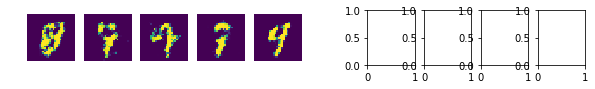

In [66]:
for epoch in range(total_epoch):
    for i in range(total_batch):
        
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run( [ train_D, loss_D ], feed_dict = { X: batch_xs, Z: noise } )
        _, loss_val_G = sess.run( [ train_G, loss_G ], feed_dict = { Z: noise } )
        
        print('Epoch : ', '%04d' % epoch, 'D loss : {',loss_val_D,'}', 'G loss : {',loss_val_G,'}')
        
        if( epoch == 0 or ( epoch + 1 ) % 10 == 0 ):
            sample_size=10
            noise = get_noise(sample_size , n_noise)
            samples = sess.run(G,feed_dict={Z:noise})
            
            fig, ax = plt.subplots(1,sample_size,figsize=(sample_size,1))
            
            for i in range(sample_size):
                ax[i].set_axis_off()
                ax[i].imshow(np.reshape(samples[i],(28,28)))
                
            plt.savefig('sample{}.png'.format(str(epoch).zfill(3)),bbox_inches='tight')
            plt.close(fig)